Nina Odoux

# **NOTEBOOK 2**

# Este cuaderno se enfocara en data splitting y EDA analisis del data set 

1. VERIFICAR BALANCE 
2. SPLIT TRAIN/TEST
3. CATEGORICAL AND CONTINUOUS
4. UNIVARIABLE ANALISIS 
5. CONCLUSION UNIVARIABLE
----------------------------------------------------------
* For each type CATEGORICAL AND CONTINUOUS analysis of:

6. OUTLIERS
7. MISSING VALUES 
8. CORRELATION 

In [5]:
#importacion de librerias :
import os
import pandas as pd 
import numpy as np   
import matplotlib.pyplot as plt 
import seaborn as sns      
from sklearn.model_selection import train_test_split
import time
import gc
import psutil
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


#importar funciones de mi archivo .py:
import sys
sys.path.append("../src")  
import eda_utils as eda

seed = 123
pd.set_option('display.max_columns', 123)
pd.set_option('display.max_rows', 5000)


# Lectura de datos del preprocesado inicial

In [8]:
data = pd.read_csv("../data/preprocessed_data/01_preprocessed_data.csv")
data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         CASH LOANS        MALE           NO   
1           100003       0         CASH LOANS      FEMALE           NO   
2           100004       0    REVOLVING LOANS        MALE          YES   
3           100006       0         CASH LOANS      FEMALE           NO   
4           100007       0         CASH LOANS        MALE           NO   
...            ...     ...                ...         ...          ...   
307506      456251       0         CASH LOANS        MALE           NO   
307507      456252       0         CASH LOANS      FEMALE           NO   
307508      456253       0         CASH LOANS      FEMALE           NO   
307509      456254       1         CASH LOANS      FEMALE           NO   
307510      456255       0         CASH LOANS      FEMALE           NO   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                  YES             0          202500.0    406597.5   
1                   NO             0          270000.0   1293502.5   
2                  YES             0           67500.0    135000.0   
3                  YES             0          135000.0    312682.5   
4                  YES             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506              NO             0          157500.0    254700.0   
307507             YES             0           72000.0    269550.0   
307508             YES             0          153000.0    677664.0   
307509             YES             0          171000.0    370107.0   
307510              NO             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   UNACCOMPANIED               WORKING   
1           35698.5        1129500.0          FAMILY         STATE SERVANT   
2            6750.0         135000.0   UNACCOMPANIED               WORKING   
3           29686.5         297000.0   UNACCOMPANIED               WORKING   
4           21865.5         513000.0   UNACCOMPANIED               WORKING   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   UNACCOMPANIED               WORKING   
307507      12001.5         225000.0   UNACCOMPANIED             PENSIONER   
307508      29979.0         585000.0   UNACCOMPANIED               WORKING   
307509      20205.0         319500.0   UNACCOMPANIED  COMMERCIAL ASSOCIATE   
307510      49117.5         675000.0   UNACCOMPANIED  COMMERCIAL ASSOCIATE   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       SECONDARY / SECONDARY SPECIAL  SINGLE / NOT MARRIED   
1                    HIGHER EDUCATION               MARRIED   
2       SECONDARY / SECONDARY SPECIAL  SINGLE / NOT MARRIED   
3       SECONDARY / SECONDARY SPECIAL        CIVIL MARRIAGE   
4       SECONDARY / SECONDARY SPECIAL  SINGLE / NOT MARRIED   
...                               ...                   ...   
307506  SECONDARY / SECONDARY SPECIAL             SEPARATED   
307507  SECONDARY / SECONDARY SPECIAL                 WIDOW   
307508               HIGHER EDUCATION             SEPARATED   
307509  SECONDARY / SECONDARY SPECIAL               MARRIED   
307510               HIGHER EDUCATION               MARRIED   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       HOUSE / APARTMENT                    0.018801       -9461   
1       HOUSE / APARTMENT                    0.003541      -16765   
2       HOUSE / APARTMENT                    0.010032      -19046   
3       HOUSE / APARTMENT                    0.008019      -19005   
4       HOUSE / APARTMENT                    0.028663      -19932   
...                   ...                         ...         ...   
307506       WITH PARENTS                    0.032561       -9327   
307507  HOUSE / APARTMENT       

# VERIFICAR BALANCE 

Los datos no parecen seguir un orden específico que impacte la repartición durante el proceso de división.
Sin embargo, se observa un desequilibrio en las proporciones de las clases de TARGET que debe ser tratado.
Para abordar el desequilibrio de clases, podríamos considerar métodos como el re-sampling, el uso de pesos de clase o realizar un muestreo estratificado para asegurar una representación equilibrada de cada clase durante el entrenamiento del modelo para que se mantenga una estructura balanceada, y que lo que se hace en el TRAIN no sea tan diferente de los datos que tendremos en el TEST, hay que cuidar con el SPLIT para que se haga con reflexion.


## STRATIFICATION

Asegura que la distribución de clases de la variable objetivo se mantenga tanto en el TRAIN como en el TEST. 
Esto es importante cuando se trabajan con clases desequilibradas, ya que previene que el conjunto de TEST tenga una distribución desigual de las clases en comparación con el conjunto de datos original.

# SEPARACION TRAIN Y TEST 
porque permite evaluar cómo de bien el modelo generalizara a datos no vistos previamente y se adapta a nuevos datos desconocidos 

In [15]:
#features seran (X), que son independientes y target variable sera (y): dependiente en teoria de las variables de X :

#removar nuestra variable objetivo del conjunto X porque es la que es dependiente:
X = data.drop('TARGET', axis=1)  

#asignar y como variable objetivo TARGET:
y = data['TARGET']

#stratified train-test split (80% train, 20% test), enfocado en una stratificacion de la variable TARGET como lo hemos especificado con los
#riesgos de tener reparticiones desbalanceadas
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=seed
)


data_test = pd.concat([X_test, y_test],axis=1)
data_train = pd.concat([X_train, y_train],axis=1)

# verificacion de la distribucion de las clases en los diferentes conjuntos para comprobar que se han distribuidas bien: 
print("Original class distribution:")
print(y.value_counts(normalize=True))  # Proporciones in original data
print("\nTrain class distribution:")
print(y_train.value_counts(normalize=True))  # Proporciones in train set
print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))  # Proporciones in test set


Original class distribution:
0    0.919271
1    0.080729
Name: TARGET, dtype: float64

Train class distribution:
0    0.919271
1    0.080729
Name: TARGET, dtype: float64

Test class distribution:
0    0.919272
1    0.080728
Name: TARGET, dtype: float64


### Stratification permitio que las distribuciones de las clases conserven el mismo patron como lo del dataset de origen

* Eran alrededor del 92% para class 0 y un 8% para class 1

## Visualización descriptiva de los datos

*  valores nulos por filas
*  por columnas

### Por columnas (variable)

In [20]:
#cqlcular el % de missing por columna con mi archivo /py, pero con data_train:
missing_col = eda.check_missing_values(data_train)

# crear un DataFrame con las columnas ordenadas por % de missing en orden DESC:
#porque es interesante saber que columnas tienen un mayor % de missing para tratarles, y cuidar con el tratamiento si es de larga proporcion:
missing_col_sorted = missing_col.sort_values(ascending=False)

#reset el index
missing_col_sorted = missing_col_sorted.reset_index()
print(missing_col_sorted)

% of NAN per column:
 CODE_GENDER                      0.001219
AMT_ANNUITY                      0.004471
AMT_GOODS_PRICE                  0.085770
NAME_TYPE_SUITE                  0.407710
OWN_CAR_AGE                     65.985253
OCCUPATION_TYPE                 31.276219
CNT_FAM_MEMBERS                  0.000813
EXT_SOURCE_1                    56.310364
EXT_SOURCE_2                     0.209749
EXT_SOURCE_3                    19.907483
APARTMENTS_AVG                  50.715424
BASEMENTAREA_AVG                58.485903
YEARS_BEGINEXPLUATATION_AVG     48.752480
YEARS_BUILD_AVG                 66.479139
COMMONAREA_AVG                  69.847322
ELEVATORS_AVG                   53.250707
ENTRANCES_AVG                   50.298771
FLOORSMAX_AVG                   49.723993
FLOORSMIN_AVG                   67.831534
LANDAREA_AVG                    59.359452
LIVINGAPARTMENTS_AVG            68.351842
LIVINGAREA_AVG                  50.143085
NONLIVINGAPARTMENTS_AVG         69.427823
NONLIVINGARE

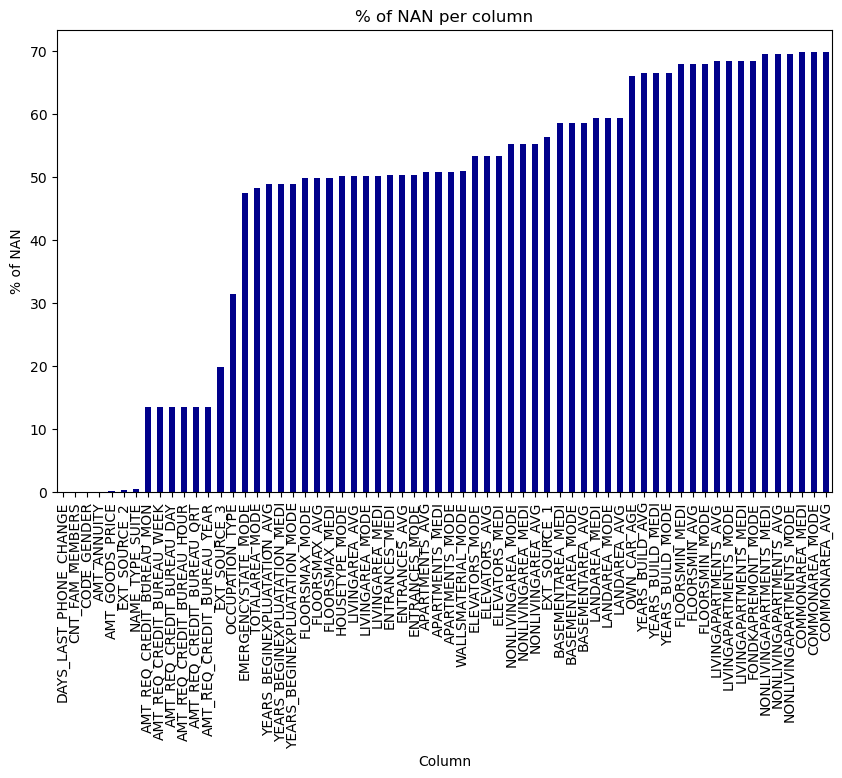

In [26]:
eda.plot_missing_values(data)
#una visualizacion mas intuitiva de los % de valores missing, escala adaptada (cuidad  no lo visualizé sobre 100%)

In [28]:
#Valores missing por fila y con variable objetivo para cada fila (con funcion de mi .py)

#para ver si hay alguna relacion que alguna variable con muchos missing resulta en una clase 1, es importante porque
#puede dar insights sobre si la ausencia de esta variable impacta direcatmente la TARGET :

missing_row_sorted = eda.check_missing_per_row(data_train)

#Visualizacion del dataframe :
missing_row_sorted


missing_percentage  TARGET
236260           50.000000       0
249616           50.000000       1
224619           49.152542       0
267335           49.152542       0
26398            49.152542       0
...                    ...     ...
33699             0.000000       0
239409            0.000000       0
221021            0.000000       0
167597            0.000000       0
183048            0.000000       0

[246008 rows x 2 columns]

# VISUALIZATION OF CONTINUOUS AND CATEGORICAL VARIABLES 

In [31]:
#llamo a la funcion de mi archivo: 
#con esta funcion, pusé en una lista las categoricas: categort, object, y numericos con menos de 20 valores unicos 

#y en una otra lista las variables continuas que son tipo float o int, con mas de 20 valores unicos 


categorical_vars, continuous_vars = eda.dame_variables_categoricas(data_train)

print("Variables categóricas:", categorical_vars)
print("----------------------------------------------------------------")
print("Variables continuas:", continuous_vars)

Variables categóricas: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMEN


Analyzing NAME_CONTRACT_TYPE


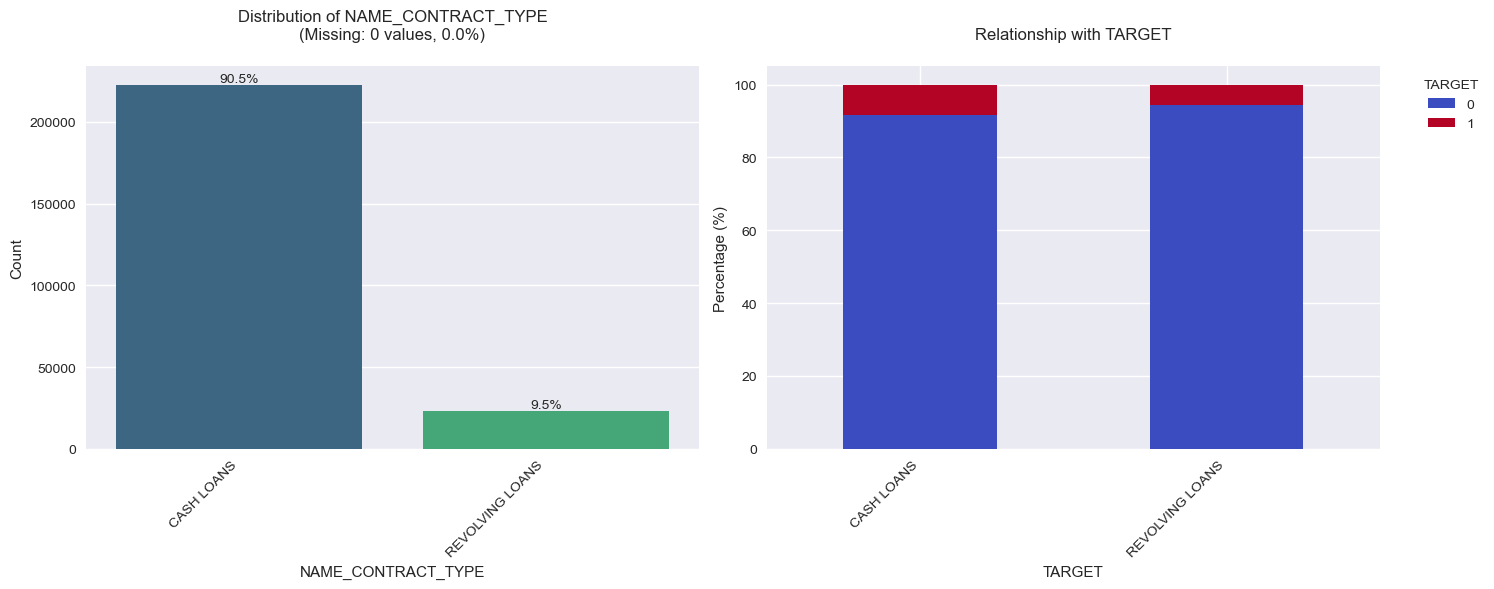


Analyzing CODE_GENDER


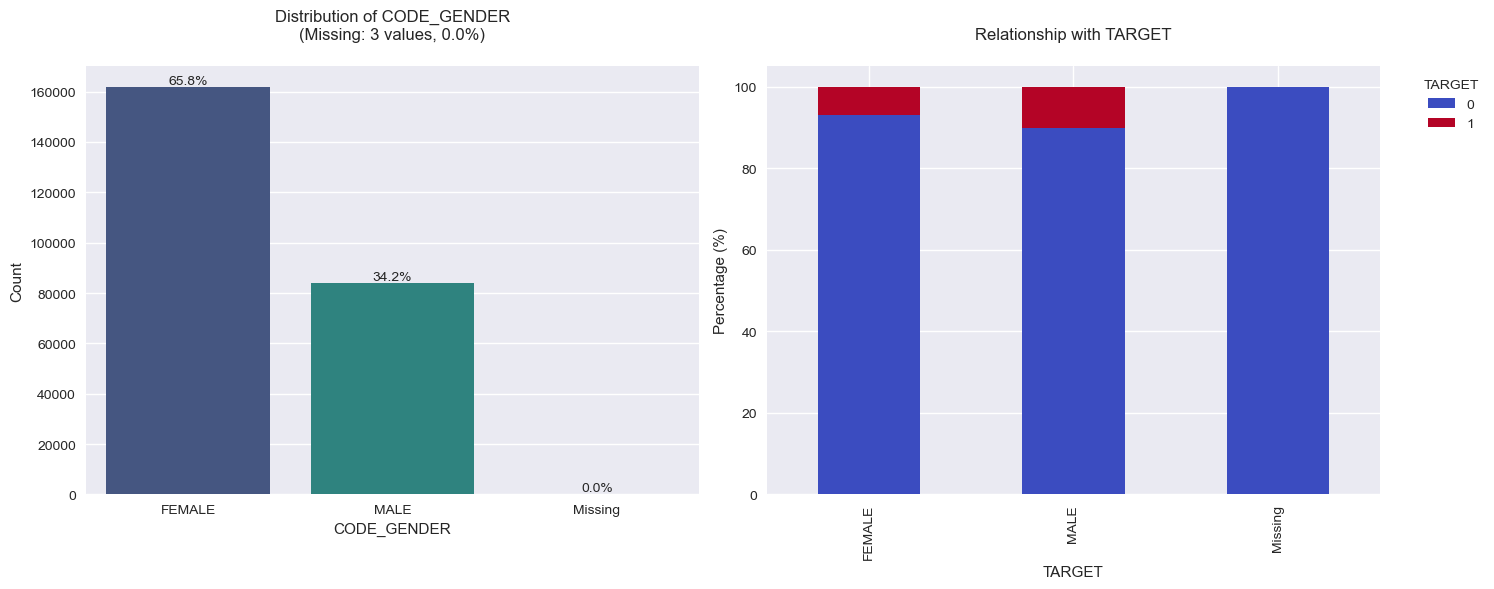


Analyzing FLAG_OWN_CAR


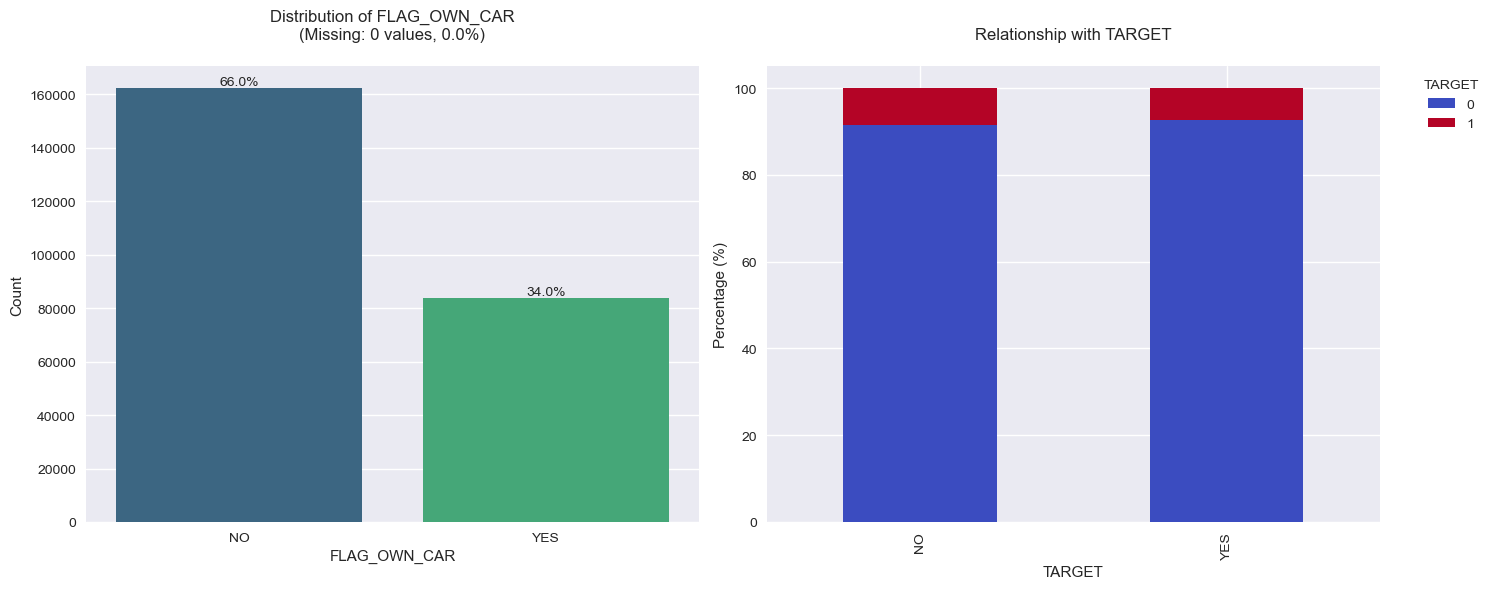


Analyzing FLAG_OWN_REALTY


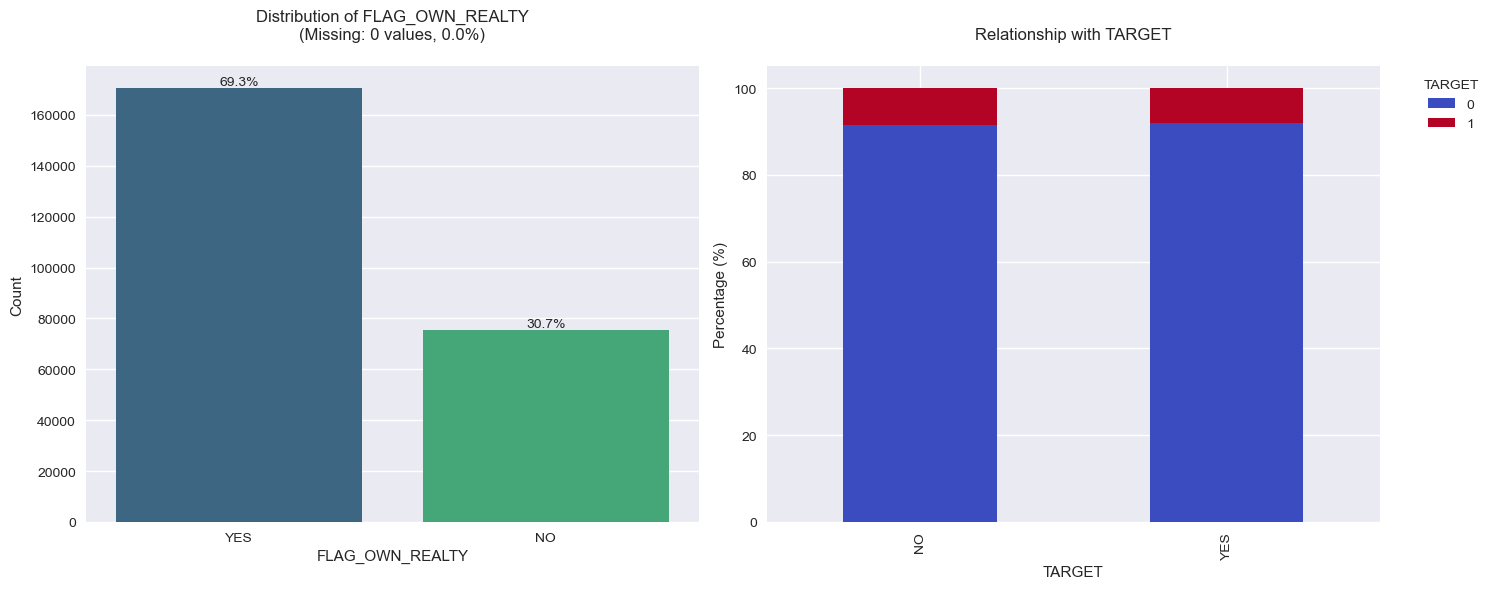


Analyzing CNT_CHILDREN


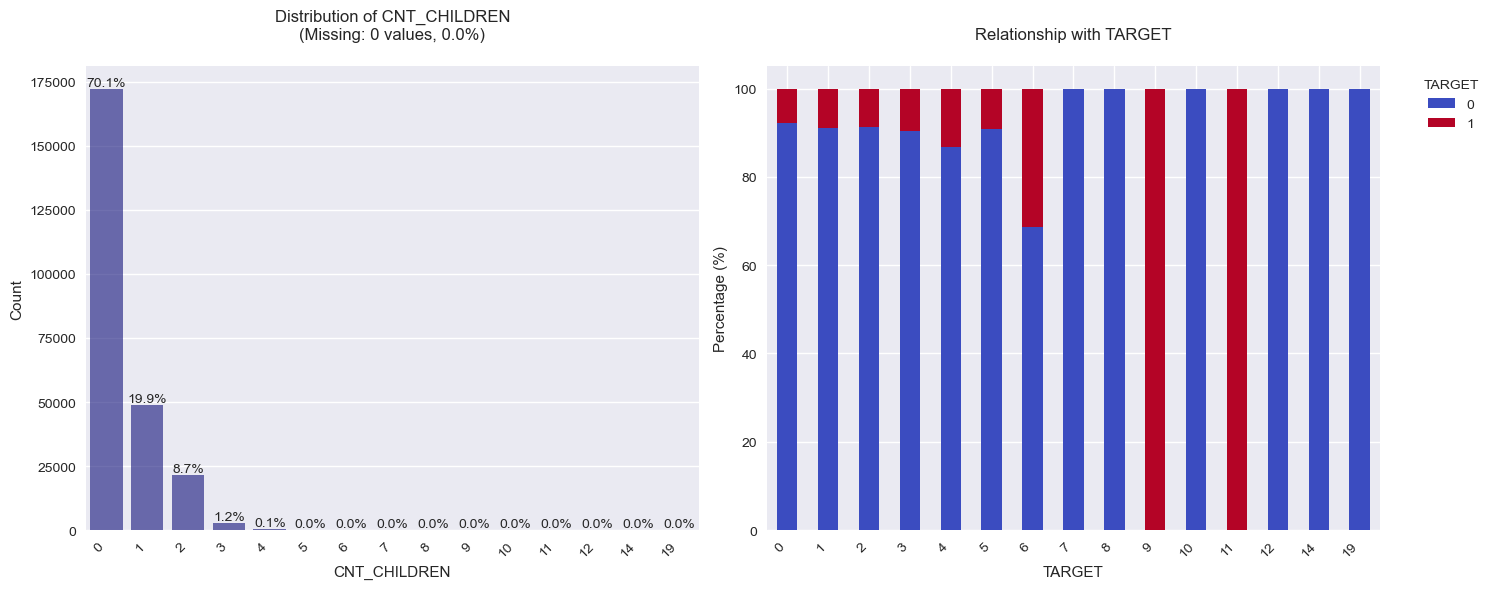


Analyzing NAME_TYPE_SUITE


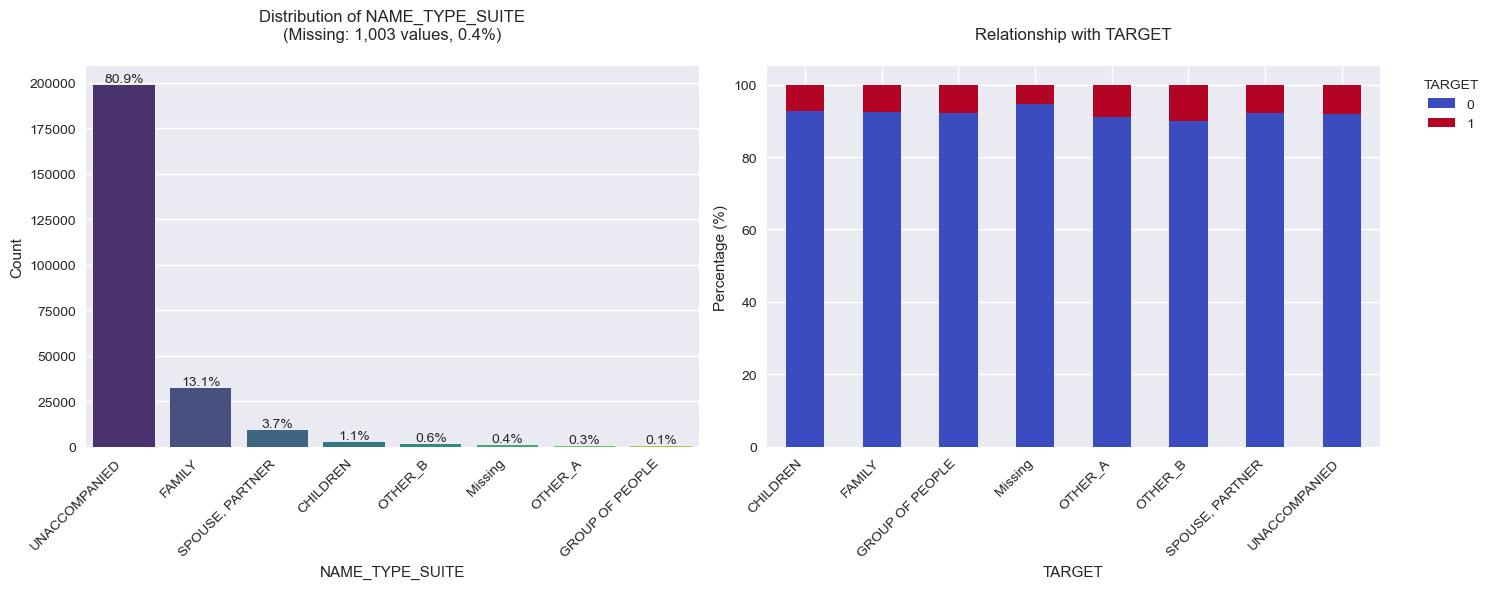


Analyzing NAME_INCOME_TYPE


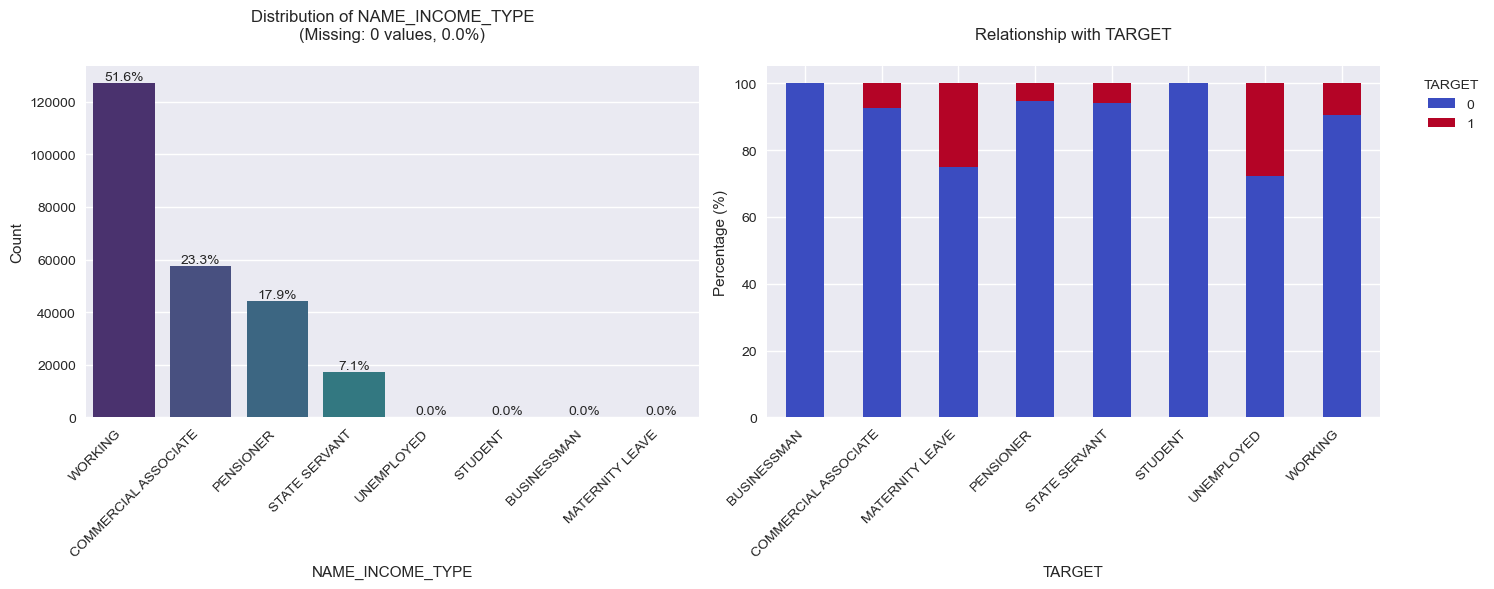


Analyzing NAME_EDUCATION_TYPE


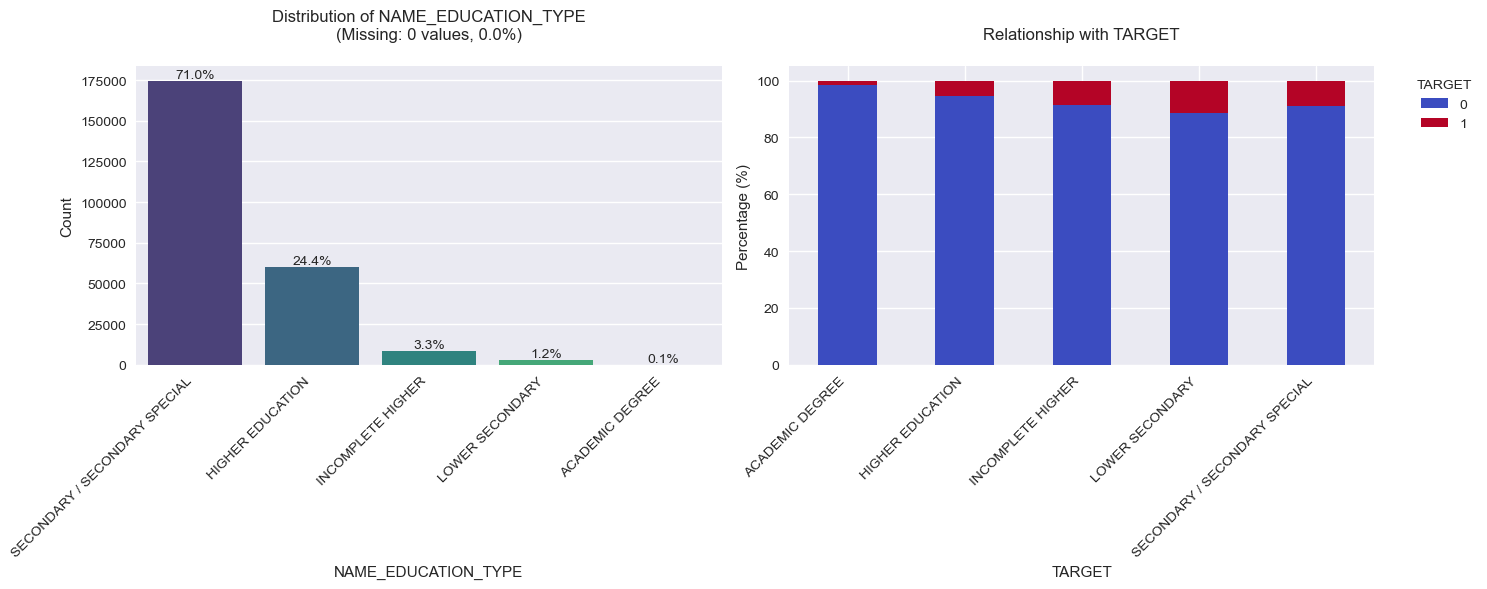


Analyzing NAME_FAMILY_STATUS


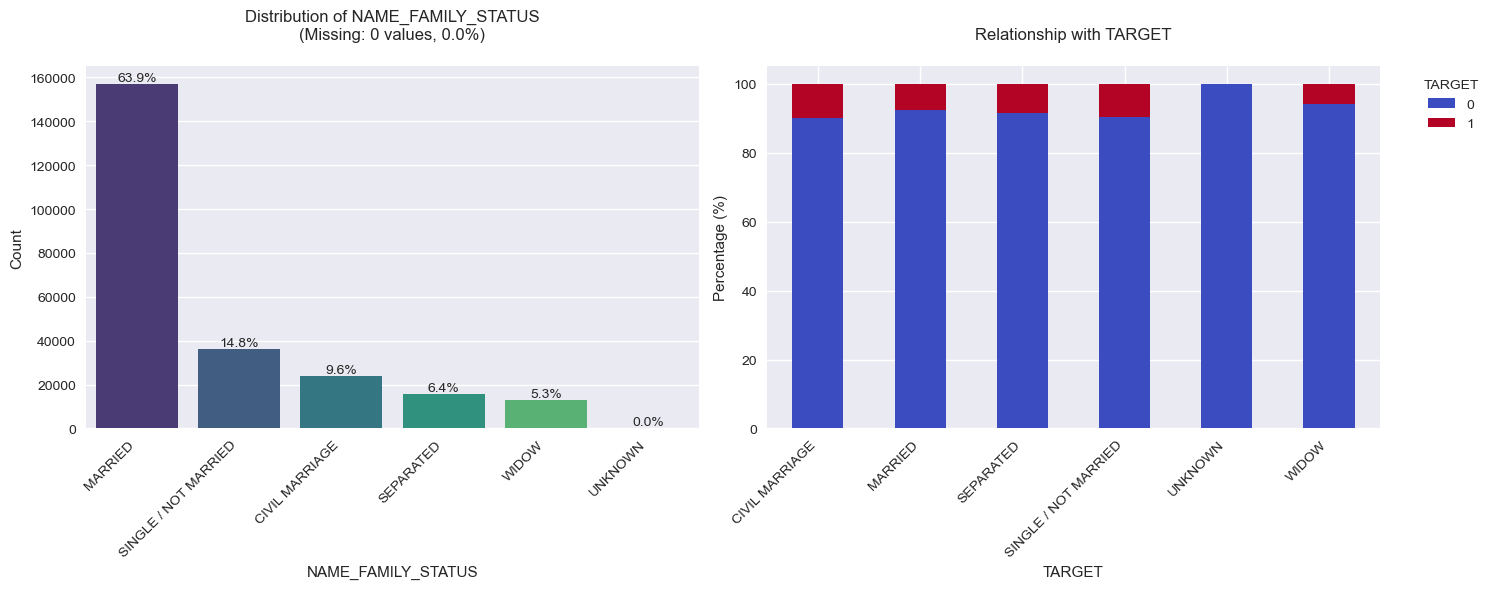


Analyzing NAME_HOUSING_TYPE


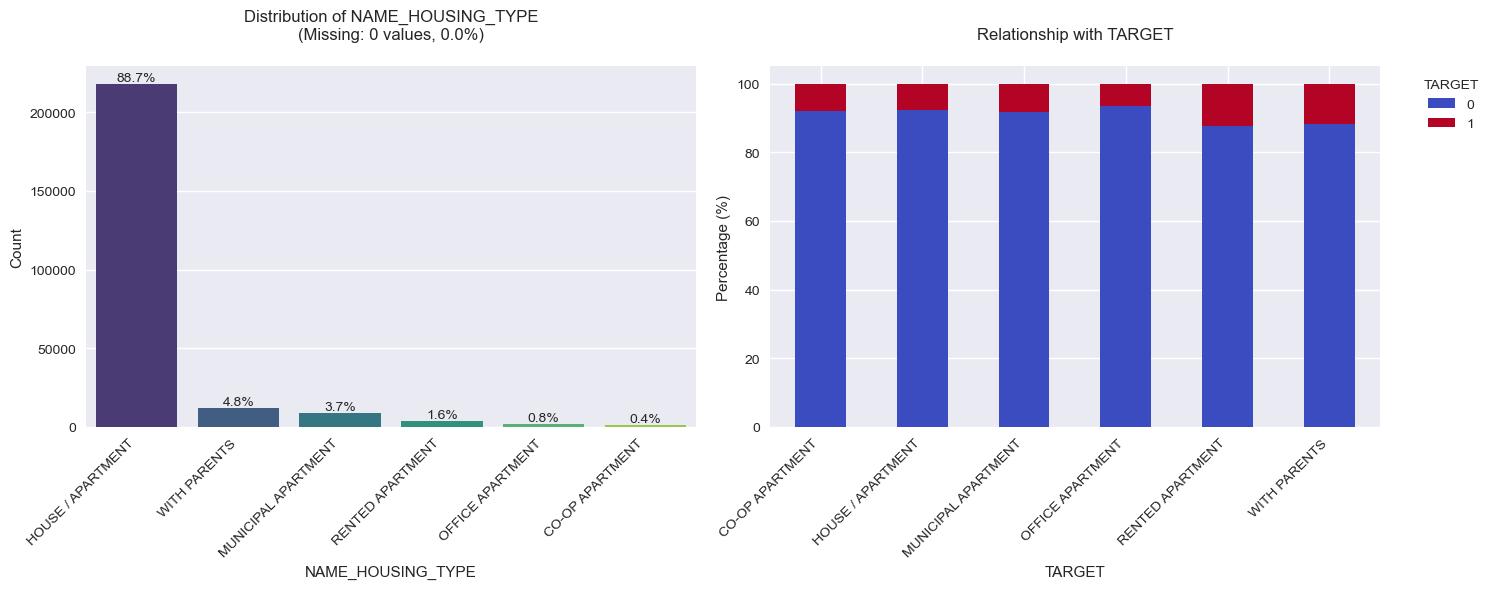


Analyzing FLAG_MOBIL


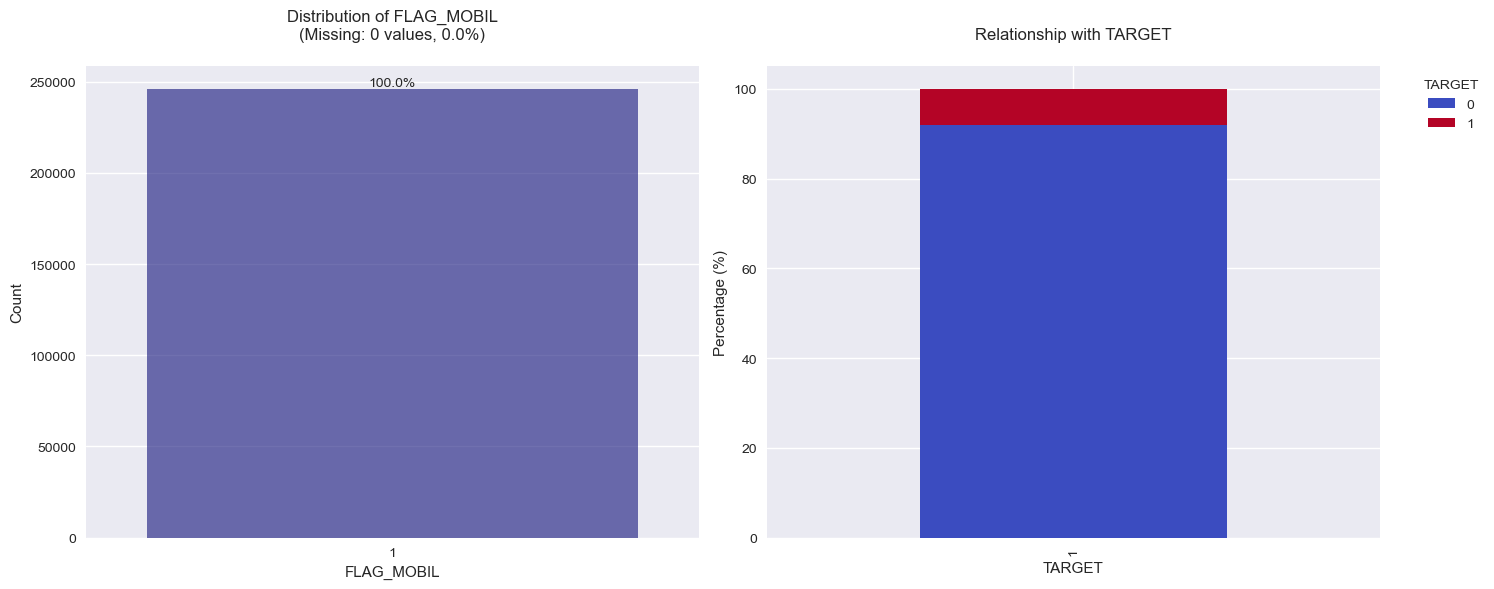


Analyzing FLAG_EMP_PHONE


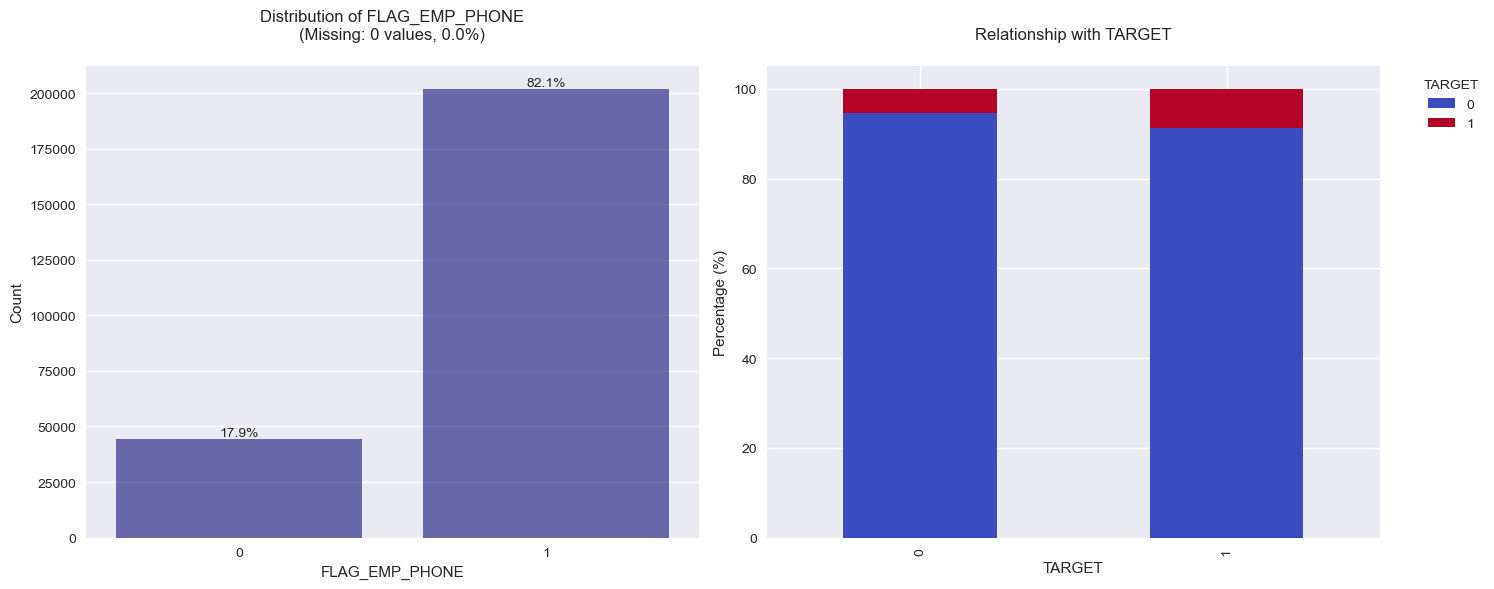


Analyzing FLAG_WORK_PHONE


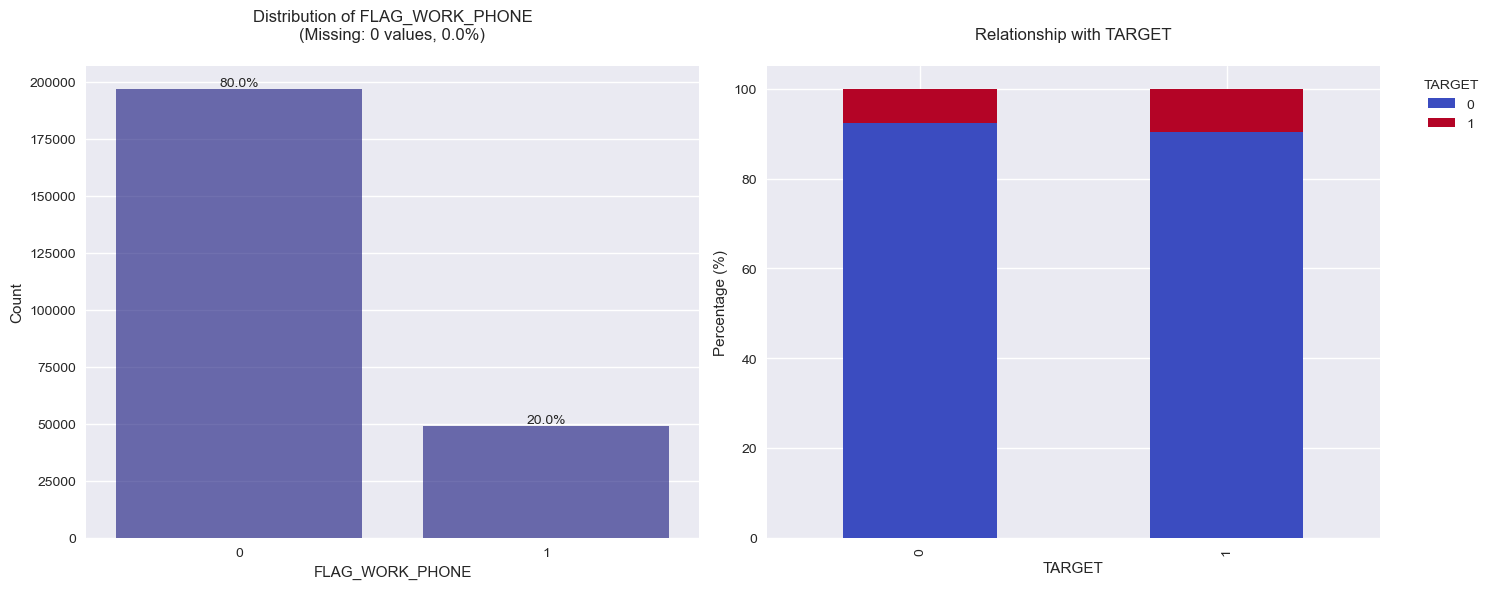


Analyzing FLAG_CONT_MOBILE


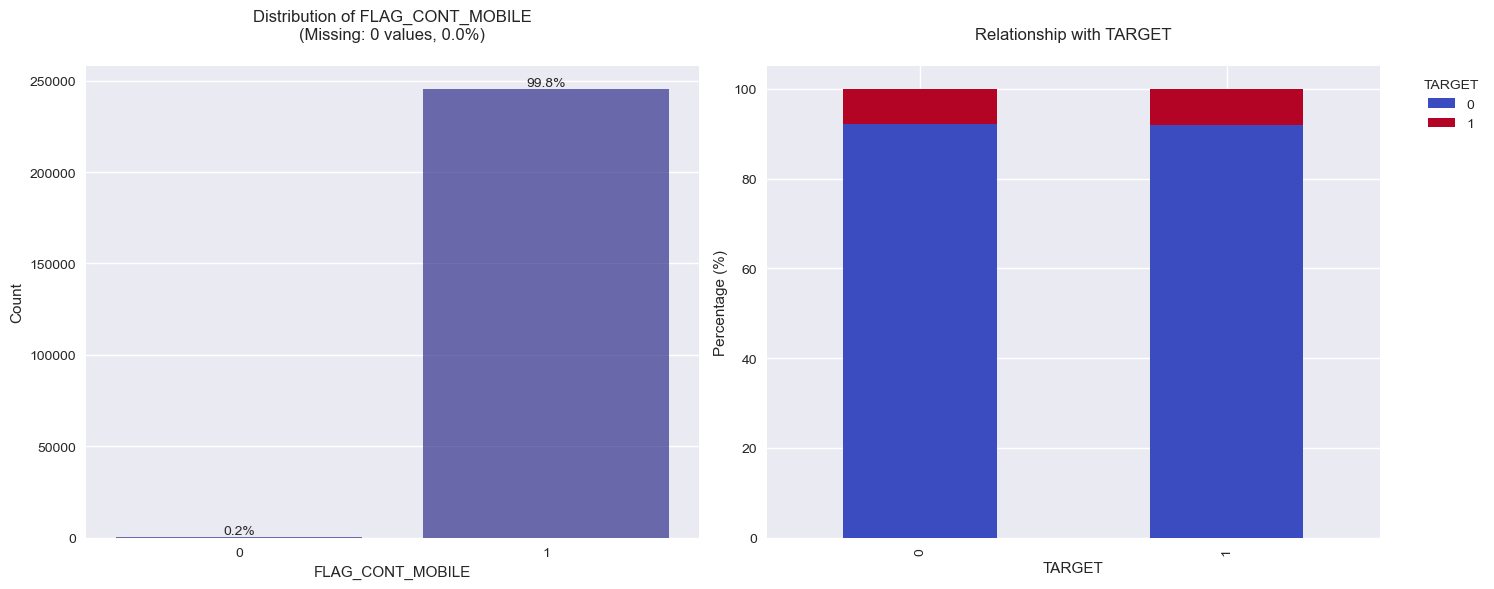


Analyzing FLAG_PHONE


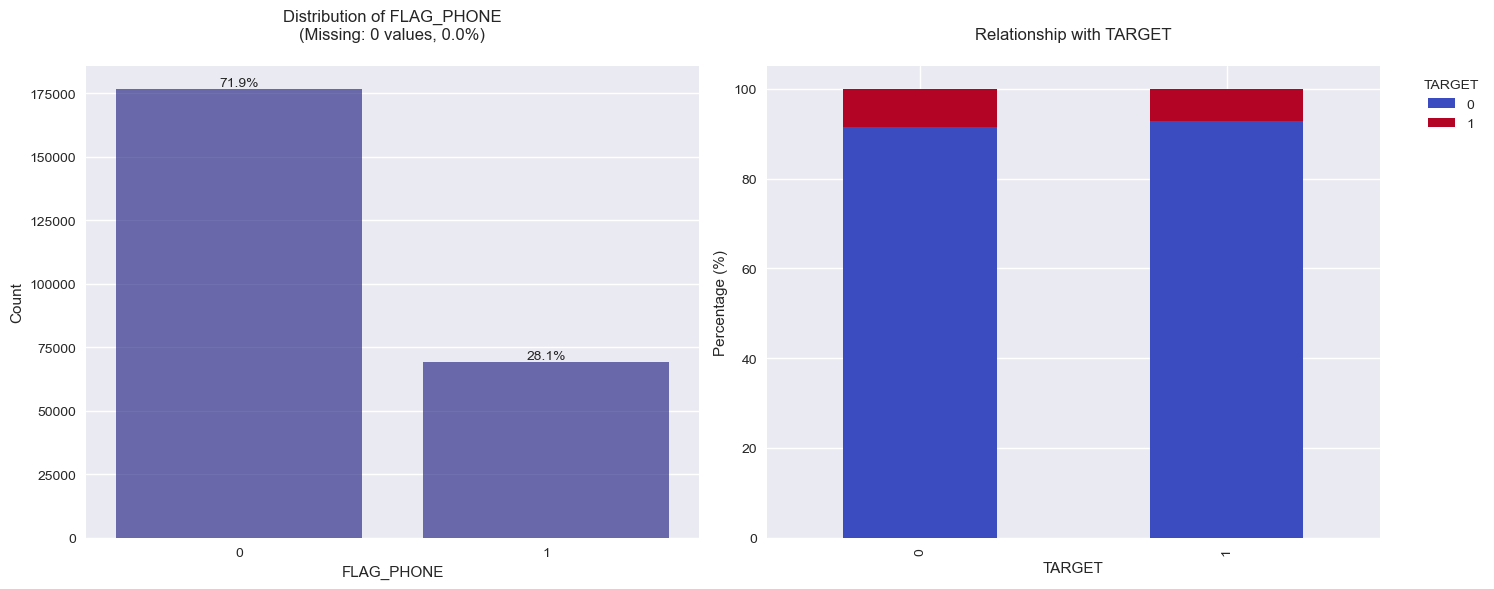


Analyzing FLAG_EMAIL


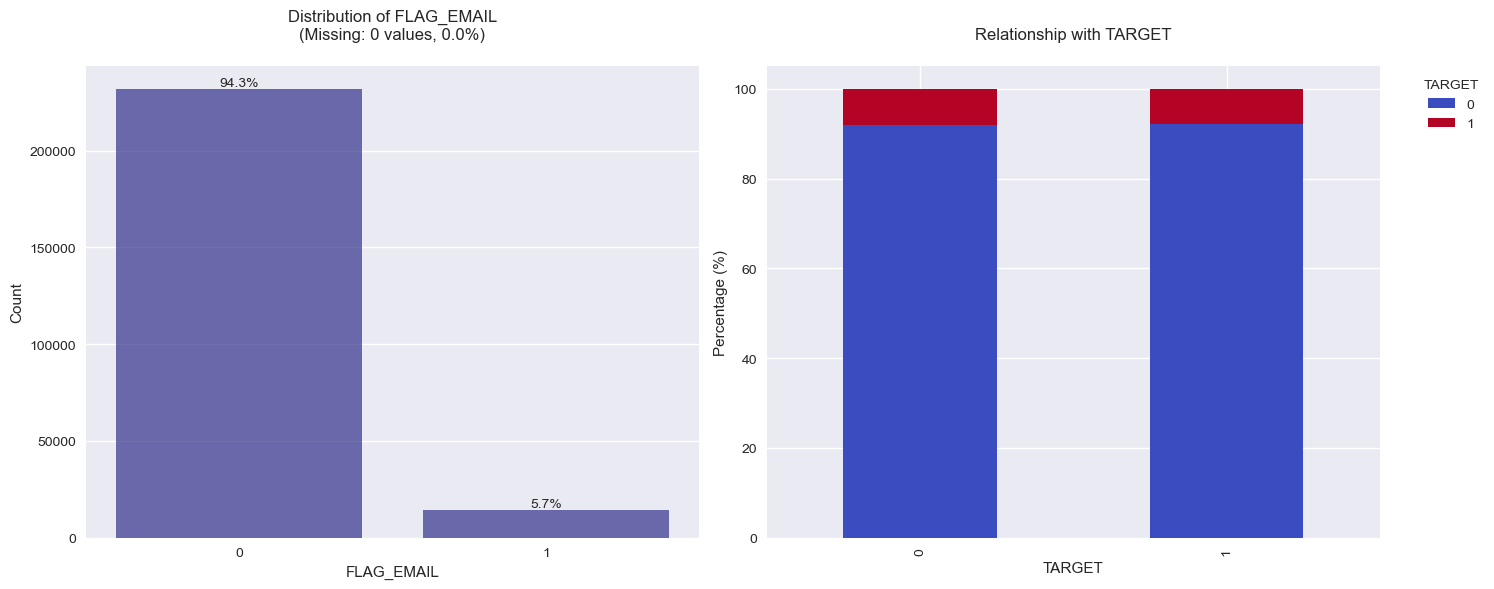


Analyzing OCCUPATION_TYPE


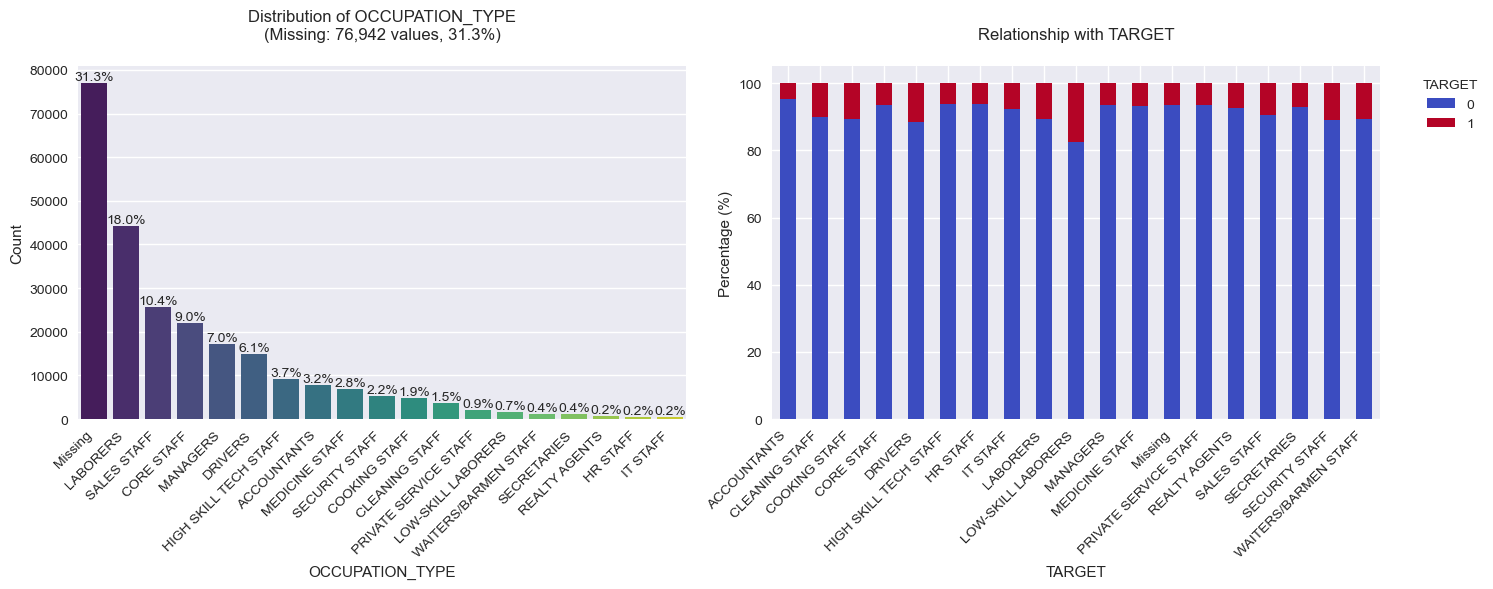


Analyzing CNT_FAM_MEMBERS


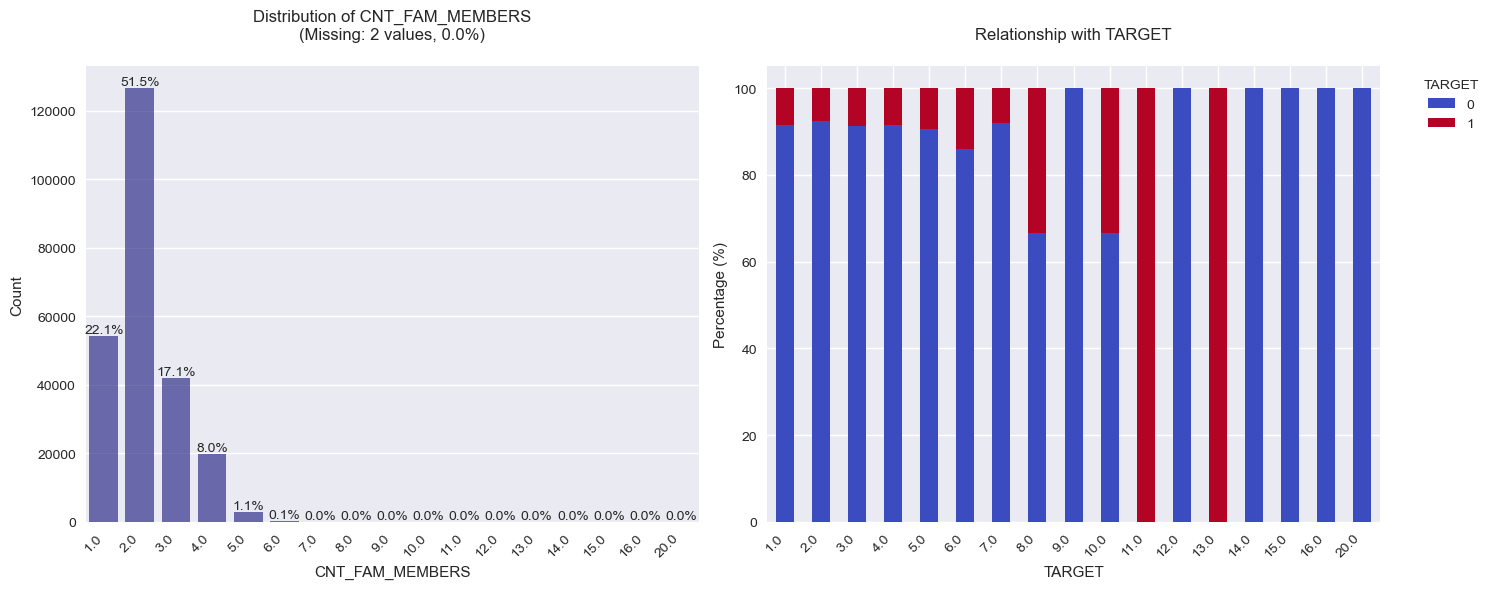


Analyzing REGION_RATING_CLIENT


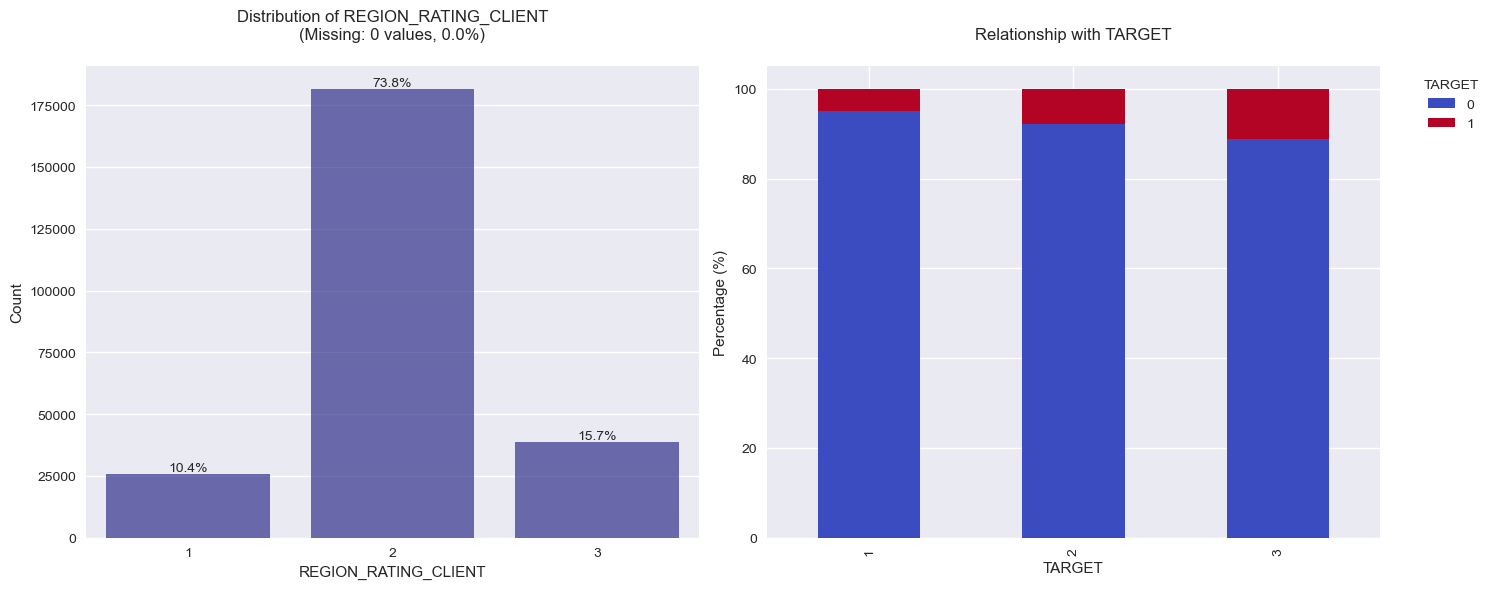


Analyzing REGION_RATING_CLIENT_W_CITY


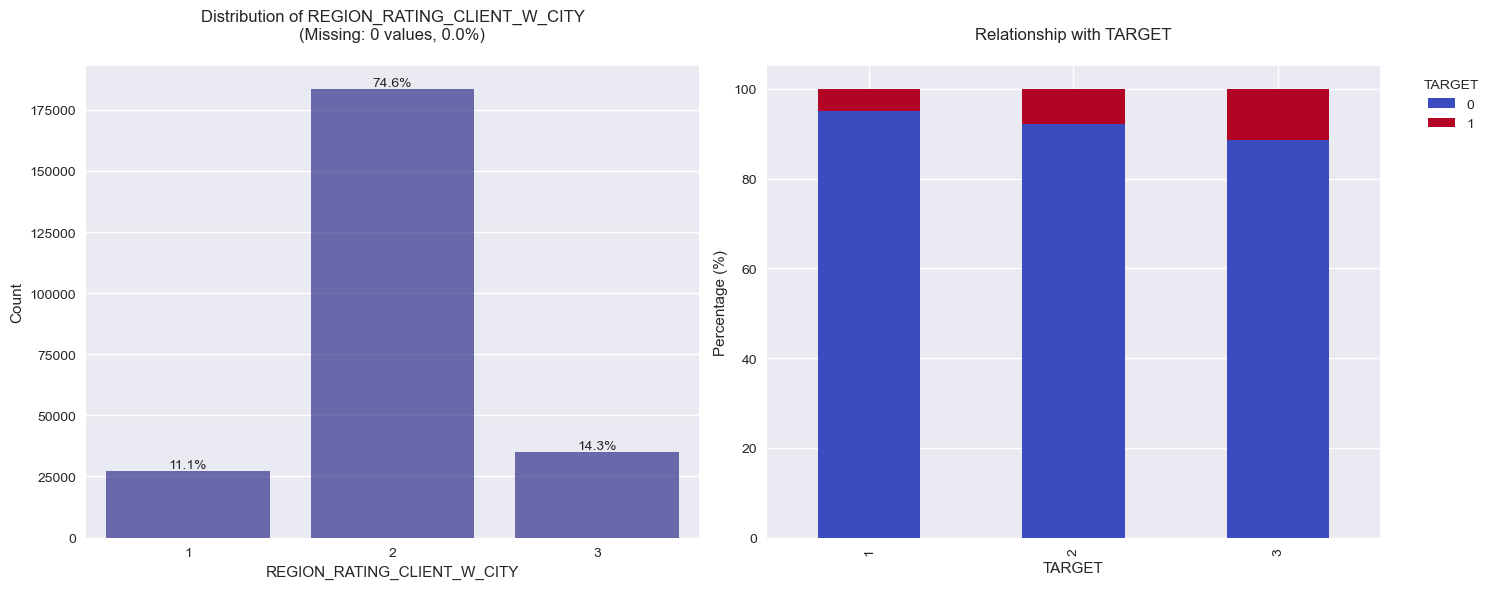


Analyzing WEEKDAY_APPR_PROCESS_START


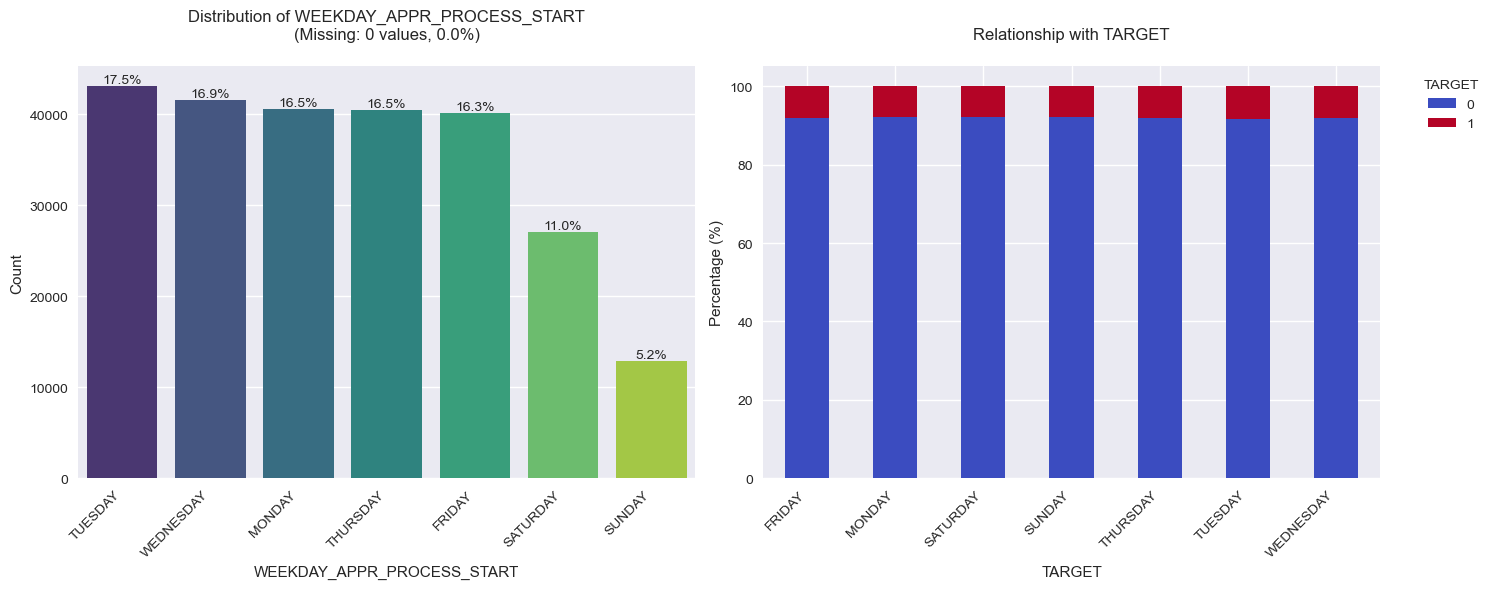


Analyzing REG_REGION_NOT_LIVE_REGION


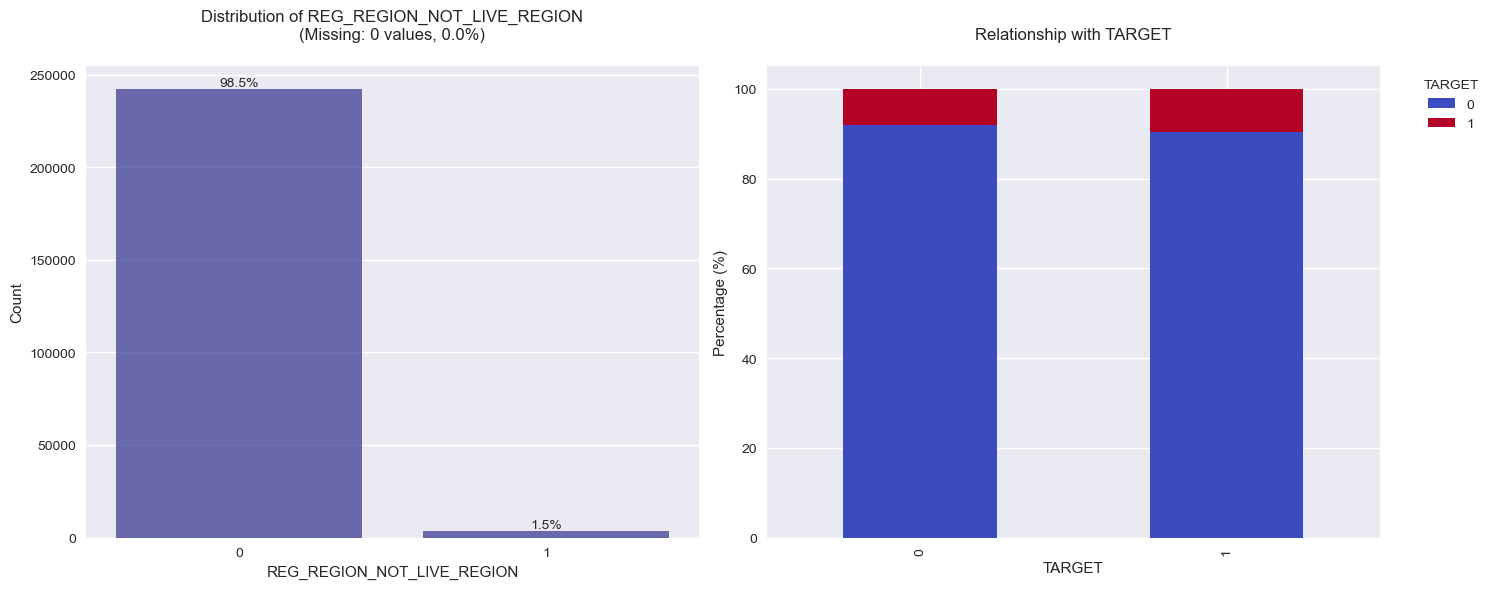


Analyzing REG_REGION_NOT_WORK_REGION


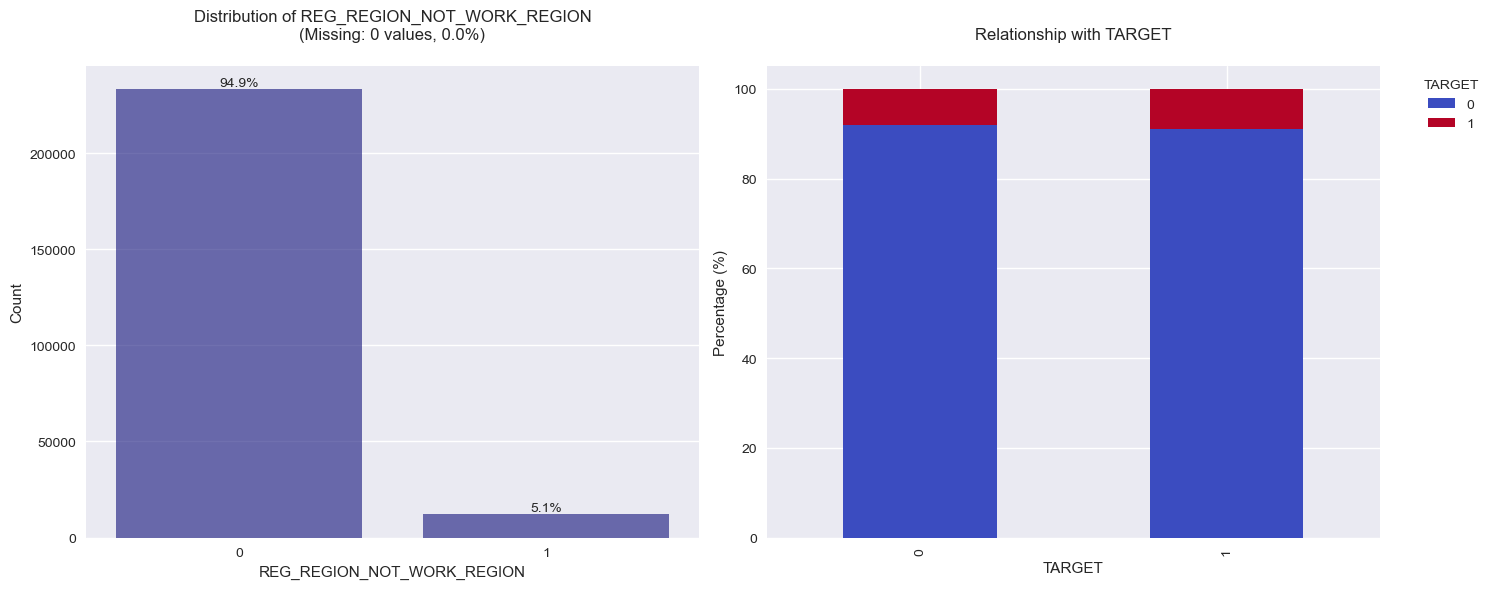


Analyzing LIVE_REGION_NOT_WORK_REGION


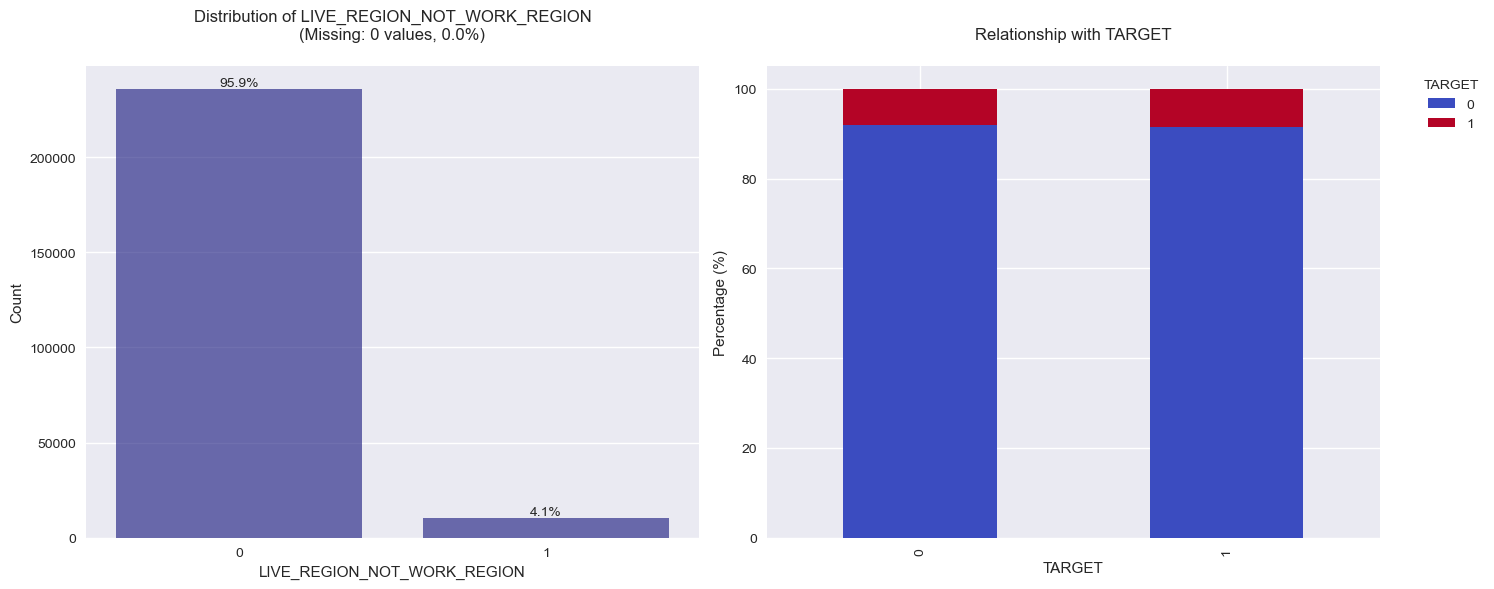


Analyzing REG_CITY_NOT_LIVE_CITY


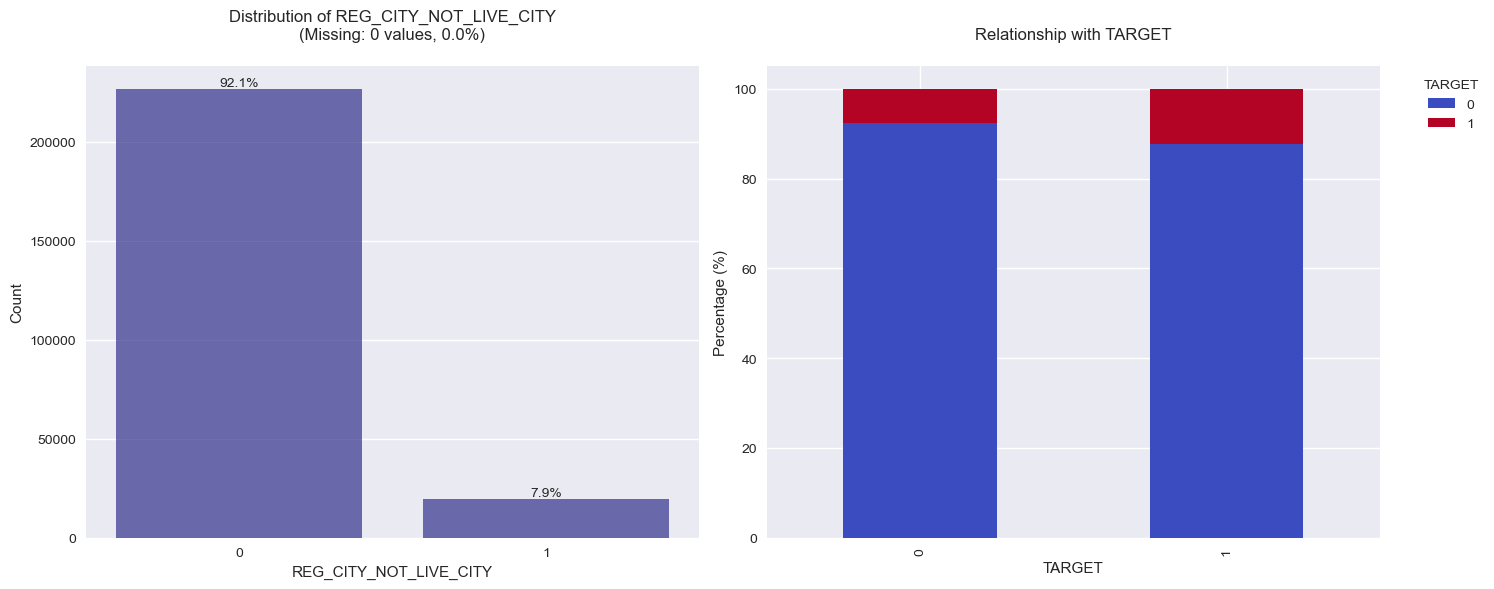


Analyzing REG_CITY_NOT_WORK_CITY


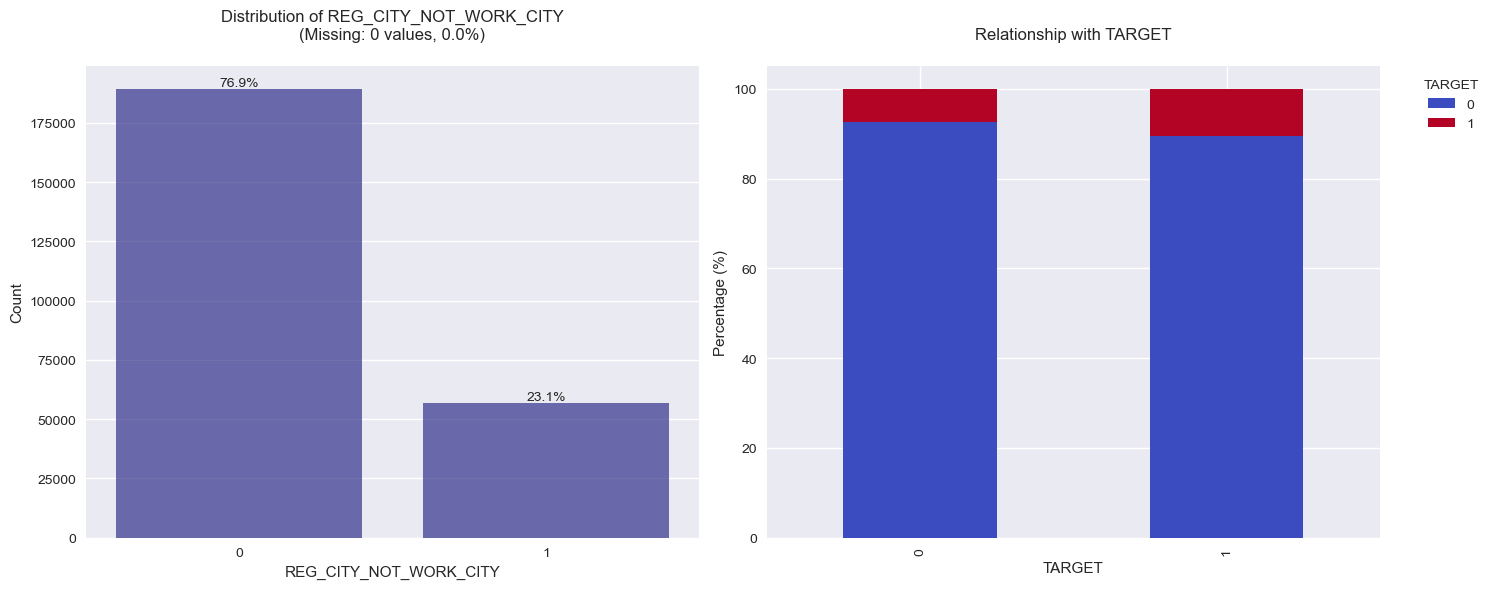


Analyzing LIVE_CITY_NOT_WORK_CITY


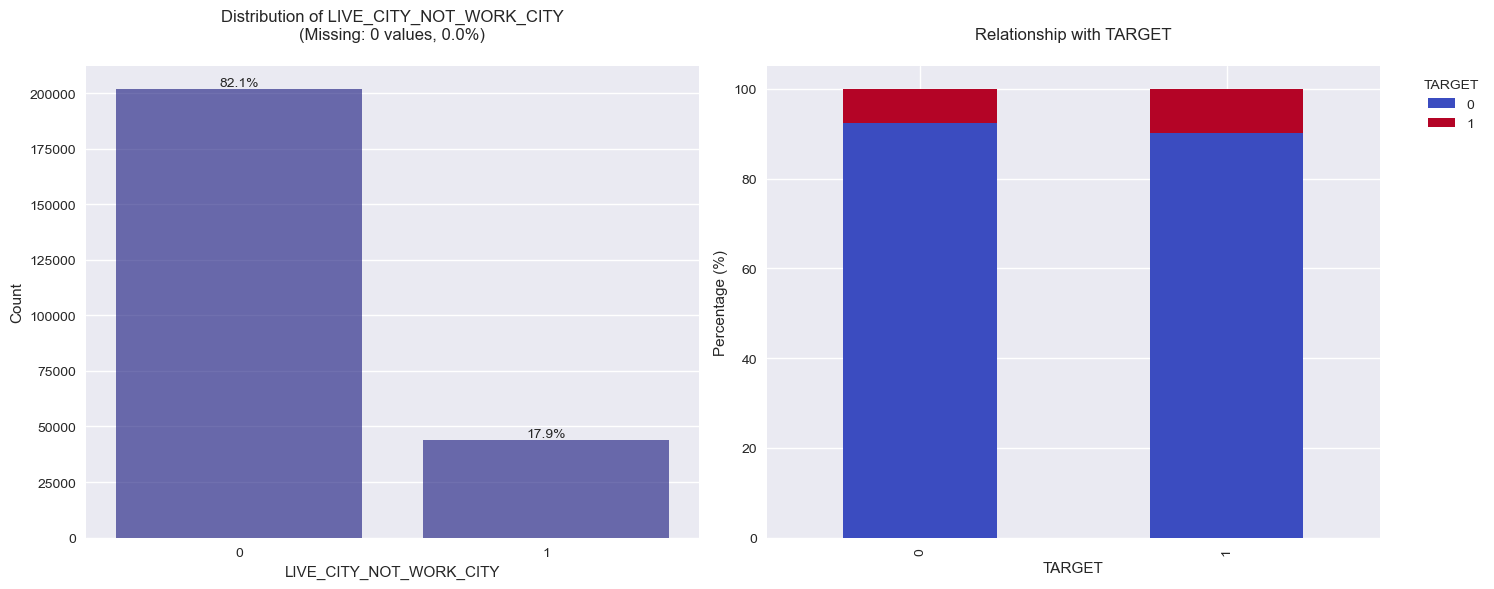


Analyzing ORGANIZATION_TYPE


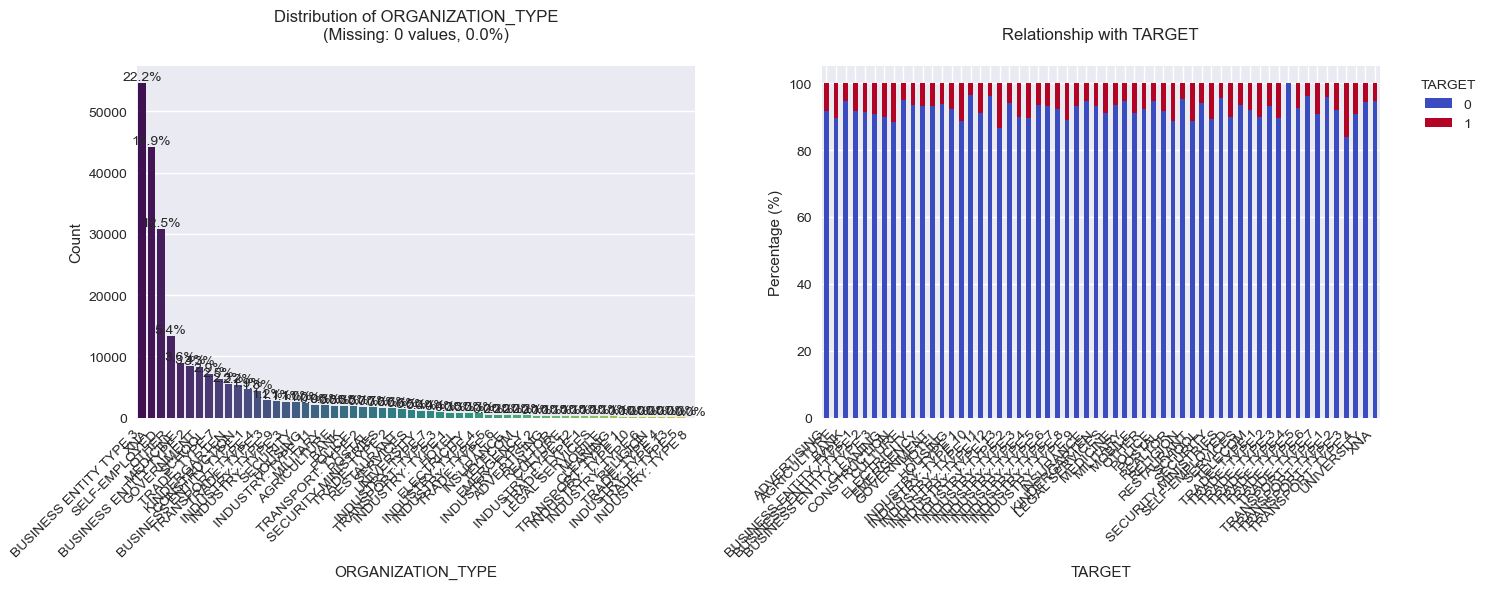


Analyzing FONDKAPREMONT_MODE


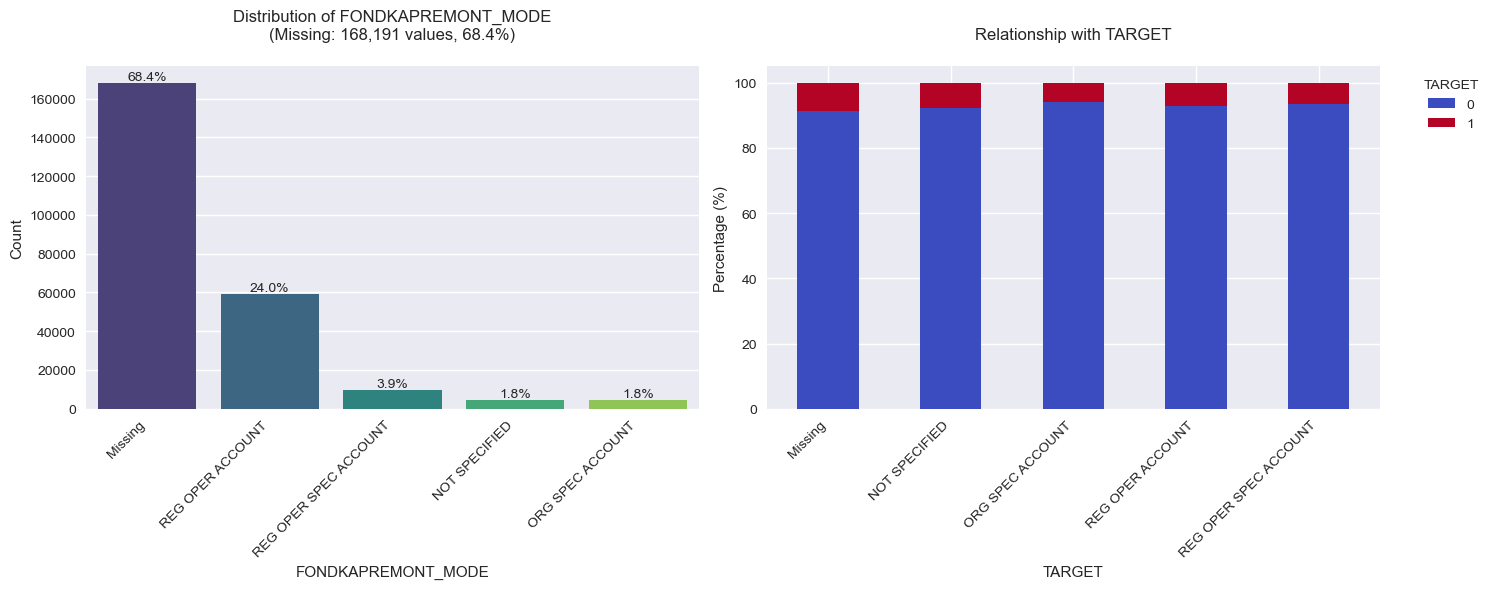


Analyzing HOUSETYPE_MODE


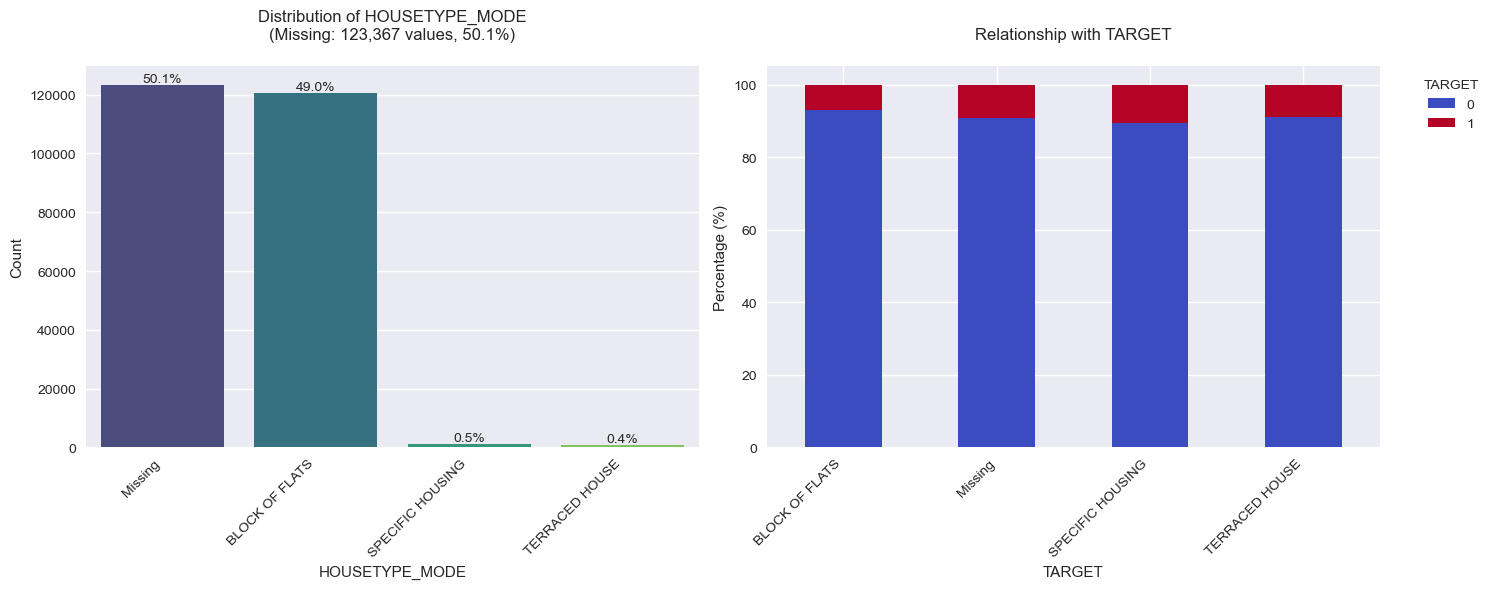


Analyzing WALLSMATERIAL_MODE


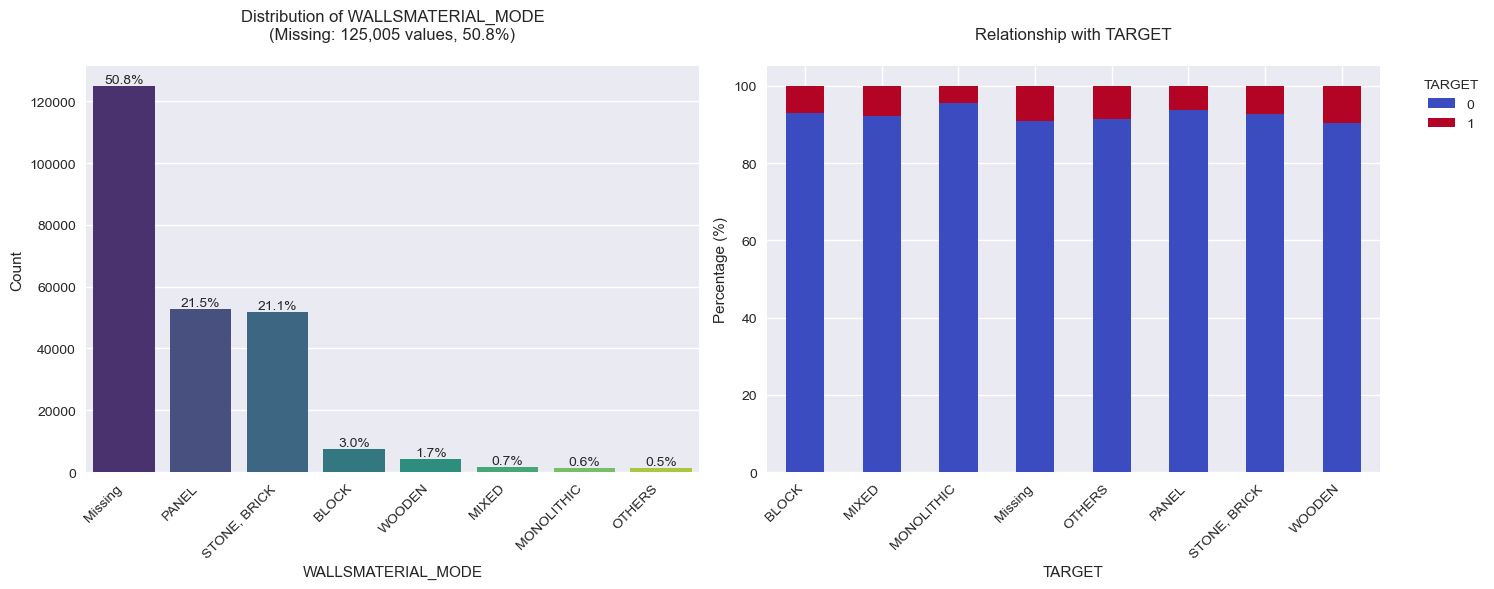


Analyzing EMERGENCYSTATE_MODE


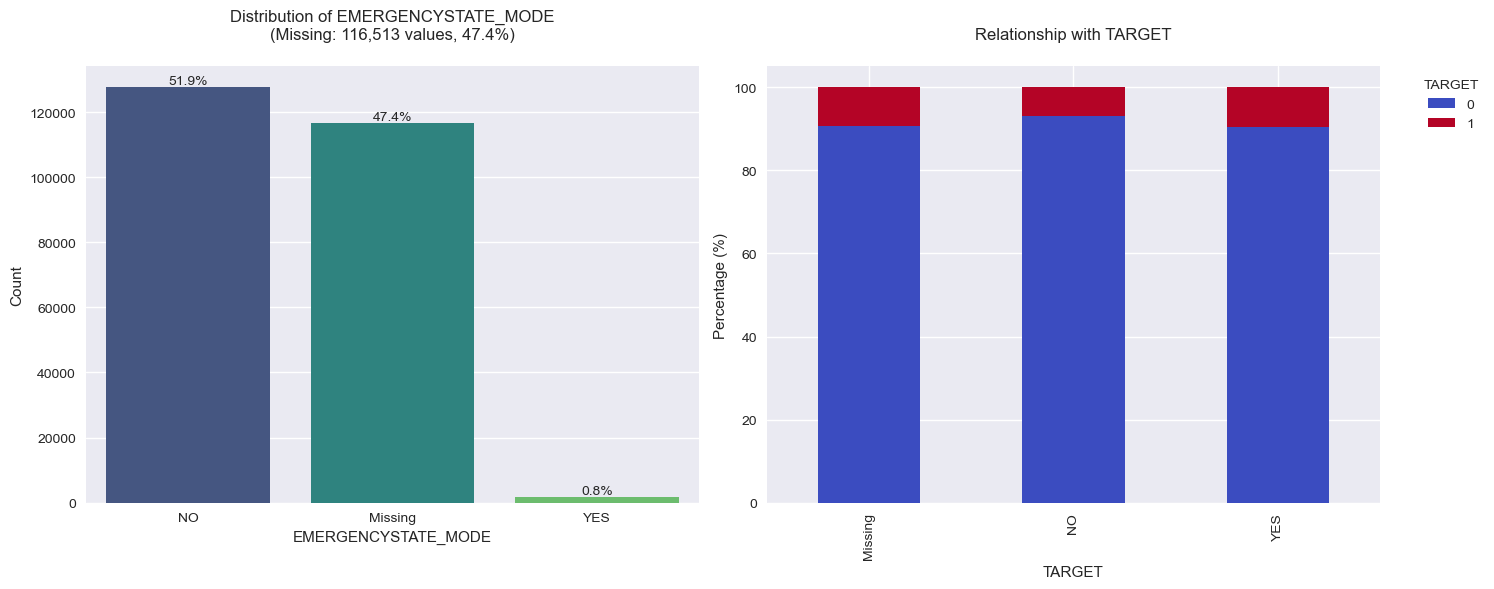


Analyzing FLAG_DOCUMENT_2


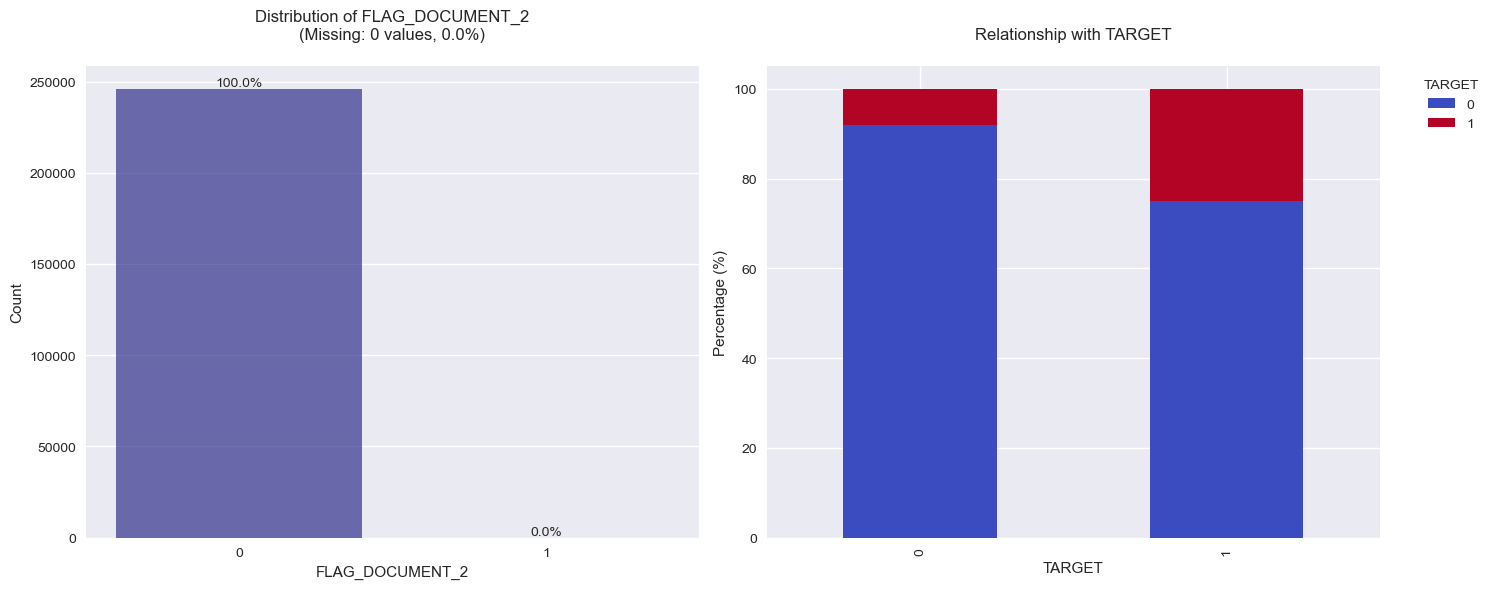


Analyzing FLAG_DOCUMENT_3


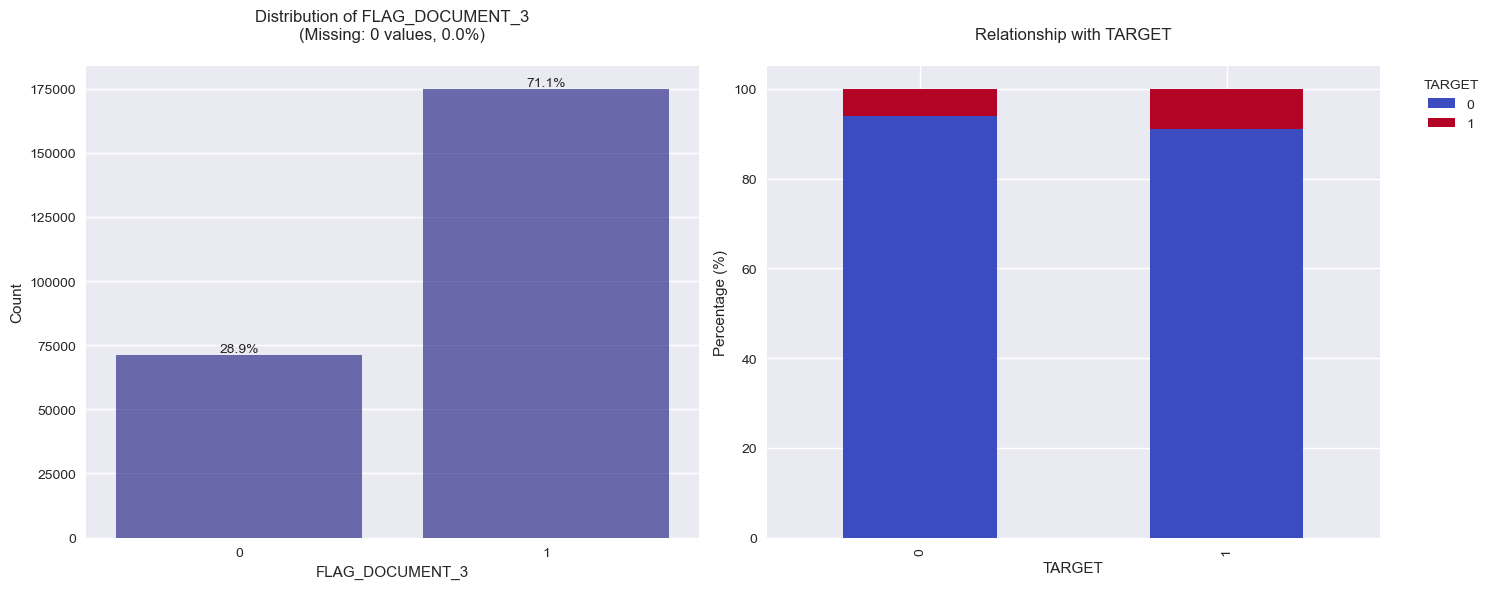


Analyzing FLAG_DOCUMENT_4


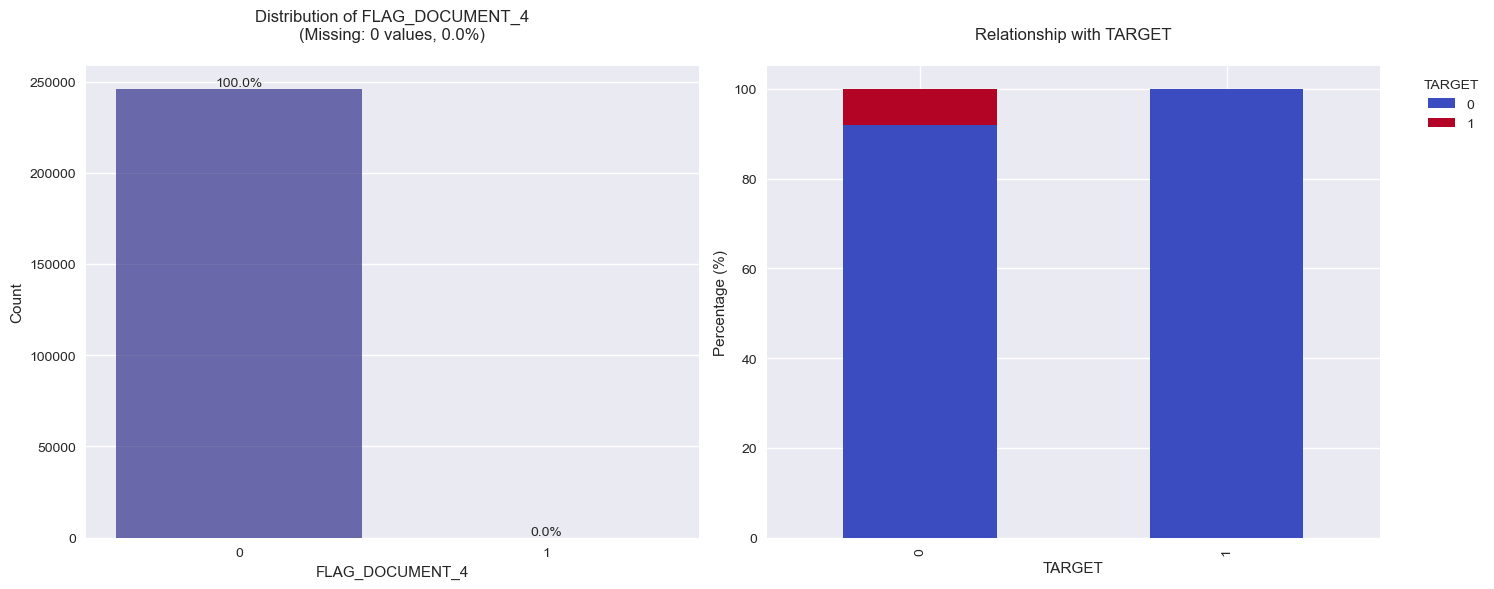


Analyzing FLAG_DOCUMENT_5


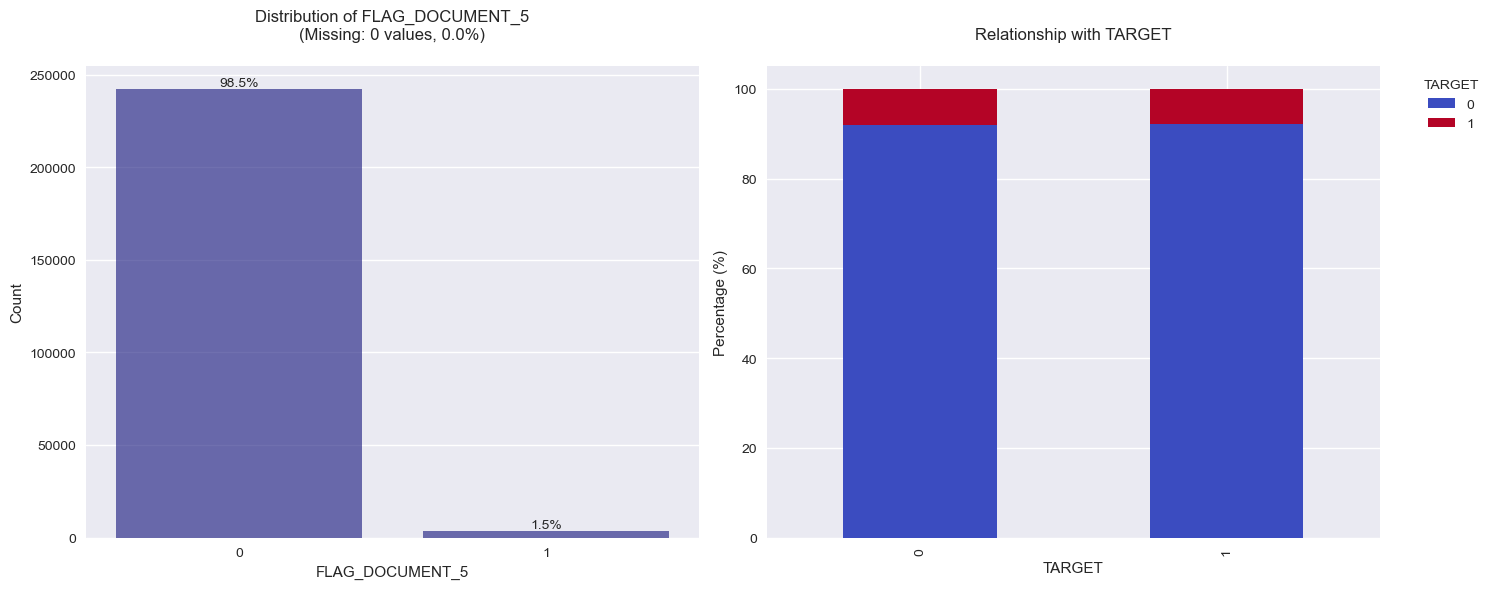


Analyzing FLAG_DOCUMENT_6


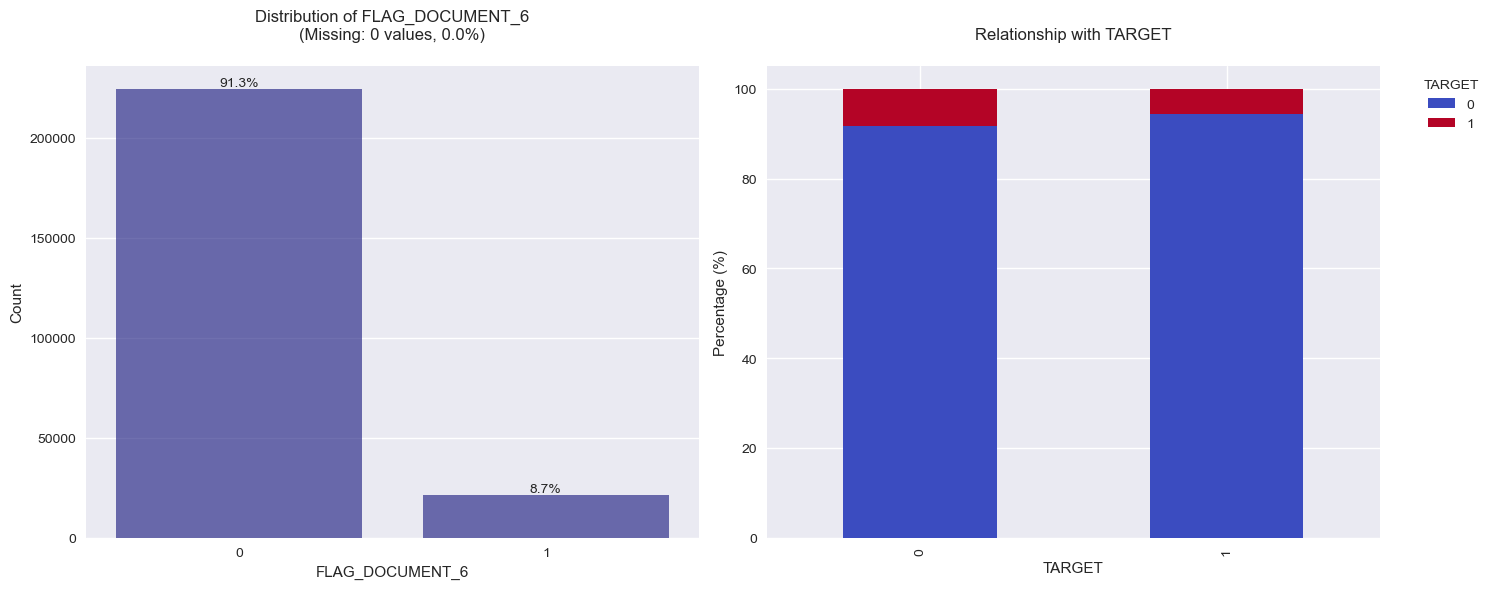


Analyzing FLAG_DOCUMENT_7


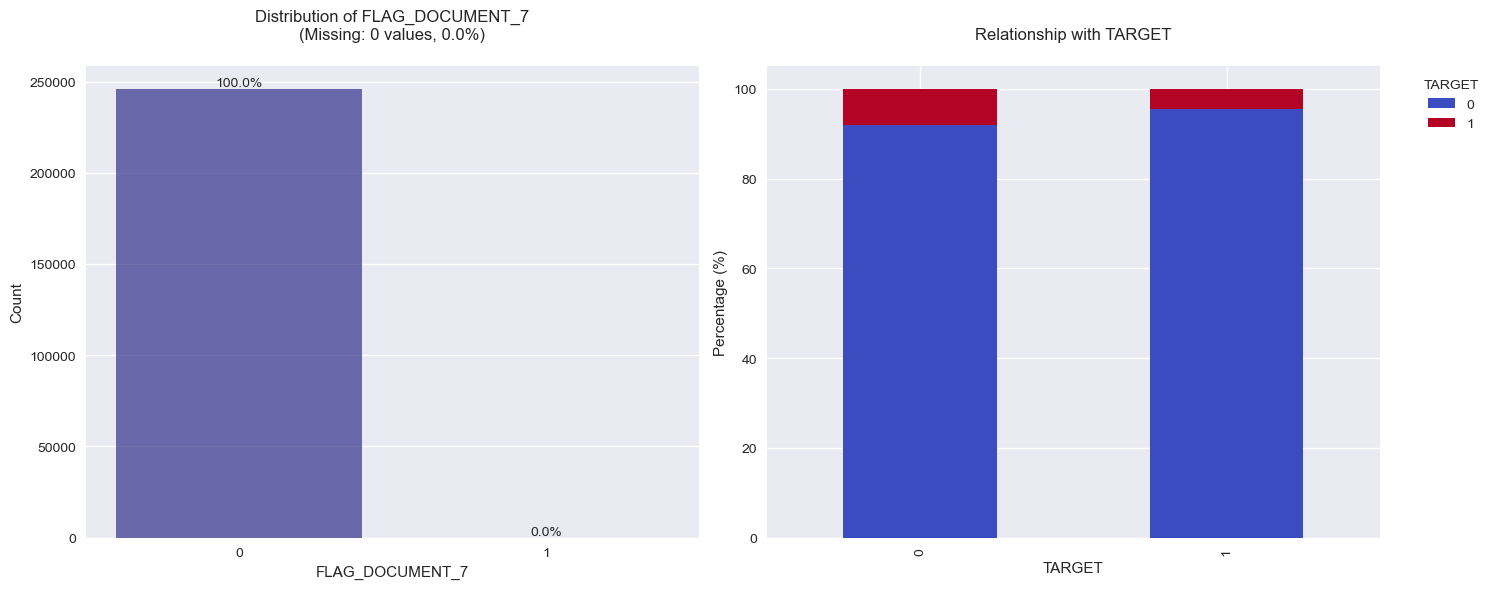


Analyzing FLAG_DOCUMENT_8


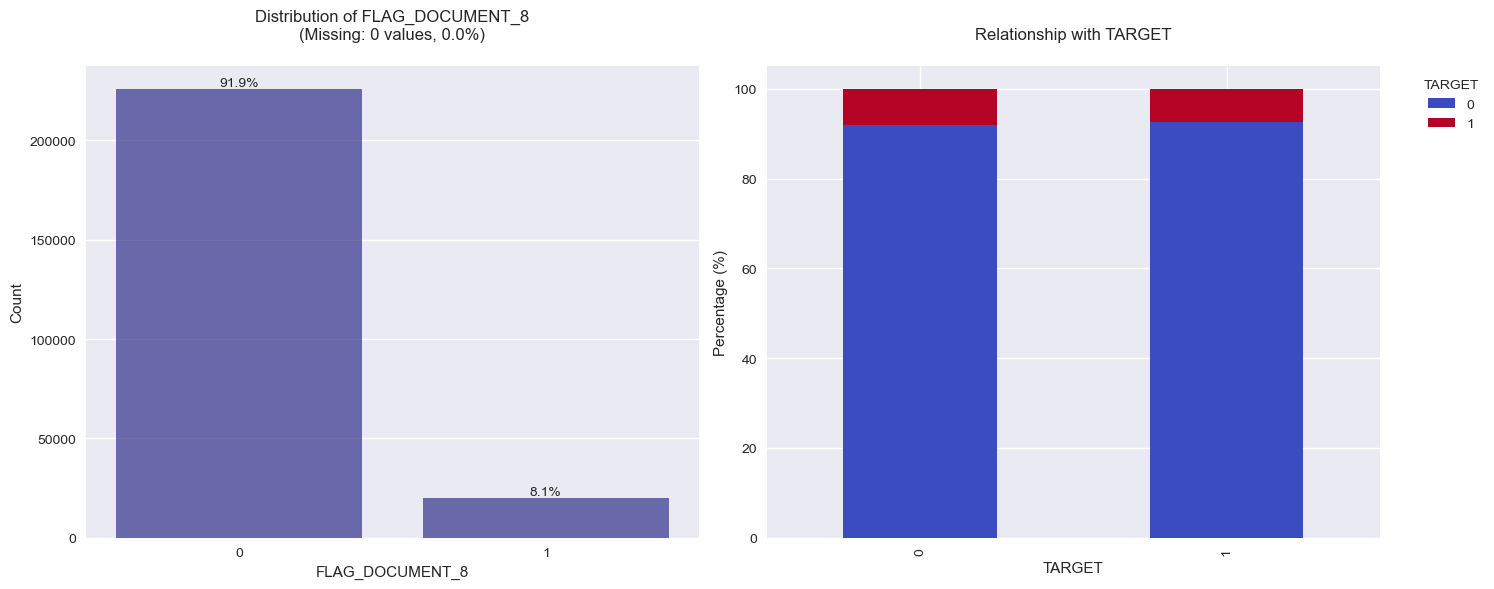


Analyzing FLAG_DOCUMENT_9


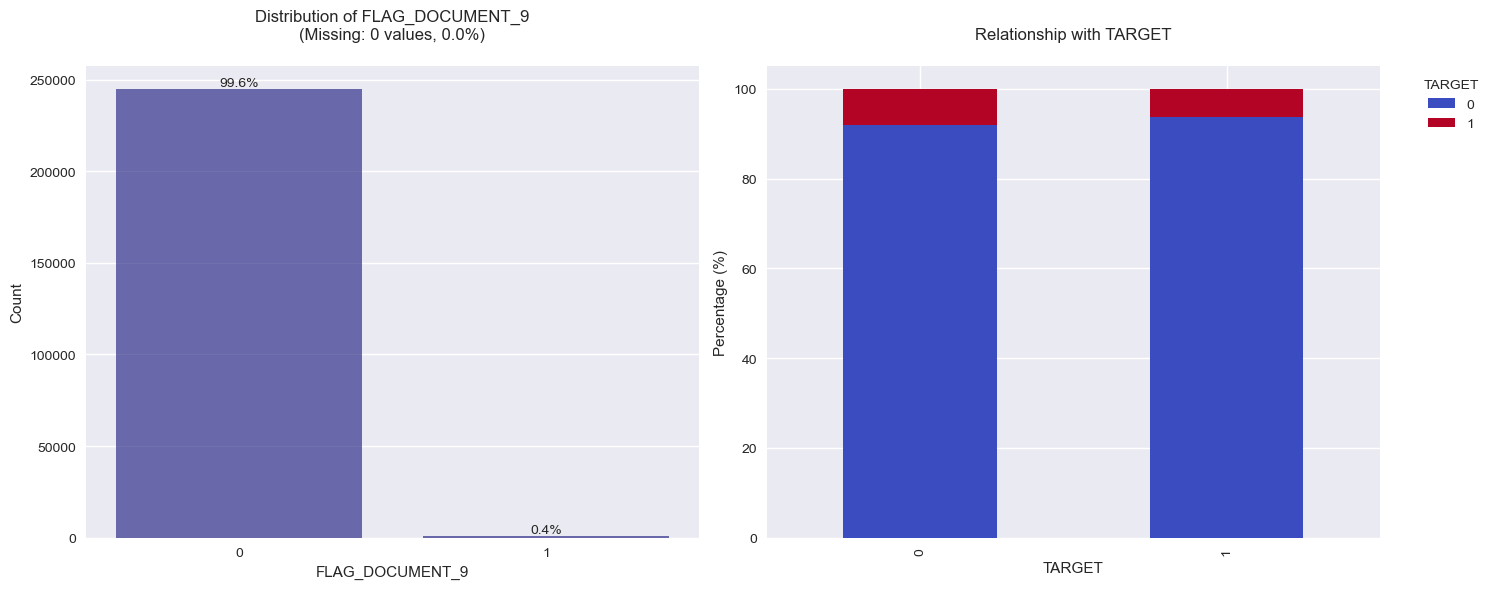


Analyzing FLAG_DOCUMENT_10


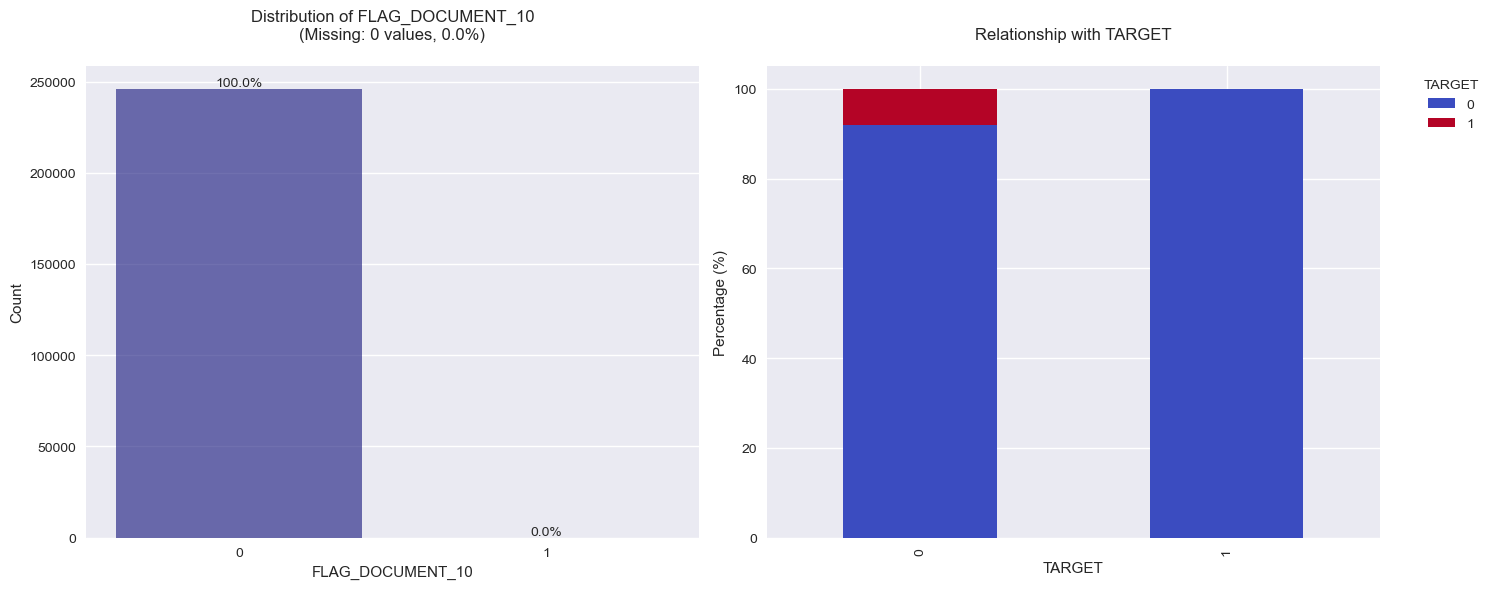


Analyzing FLAG_DOCUMENT_11


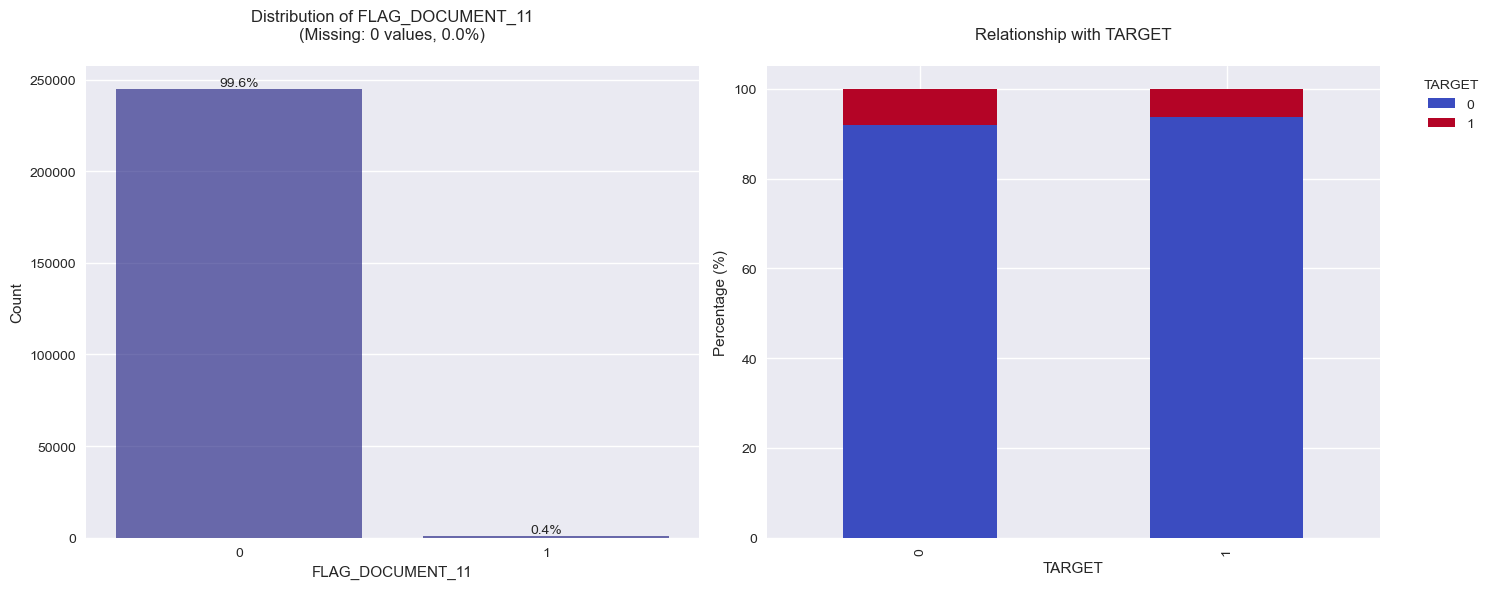


Analyzing FLAG_DOCUMENT_12


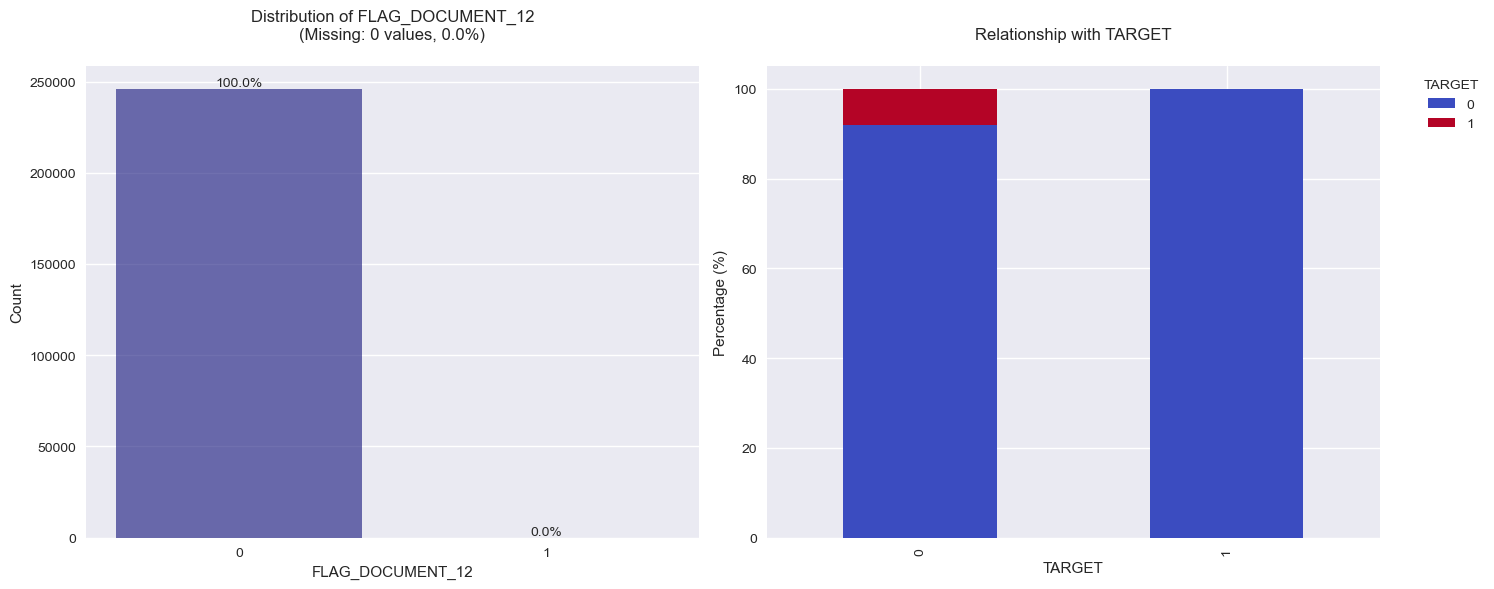


Analyzing FLAG_DOCUMENT_13


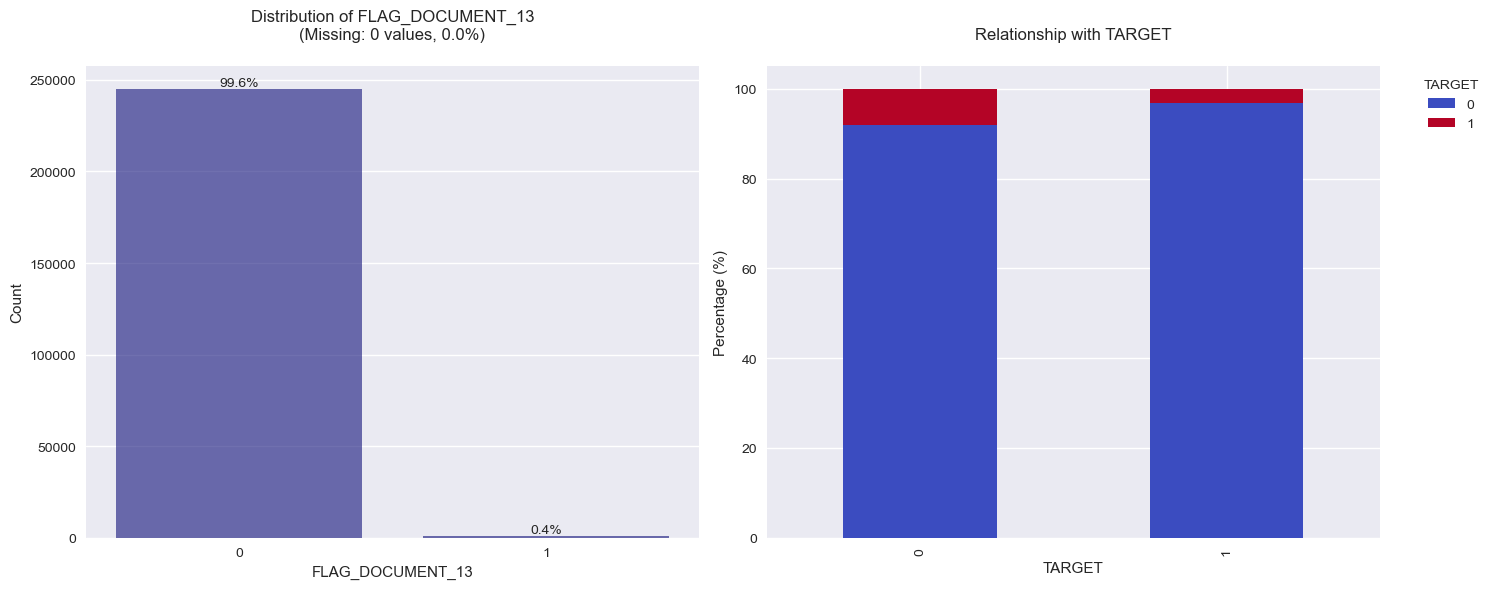


Analyzing FLAG_DOCUMENT_14


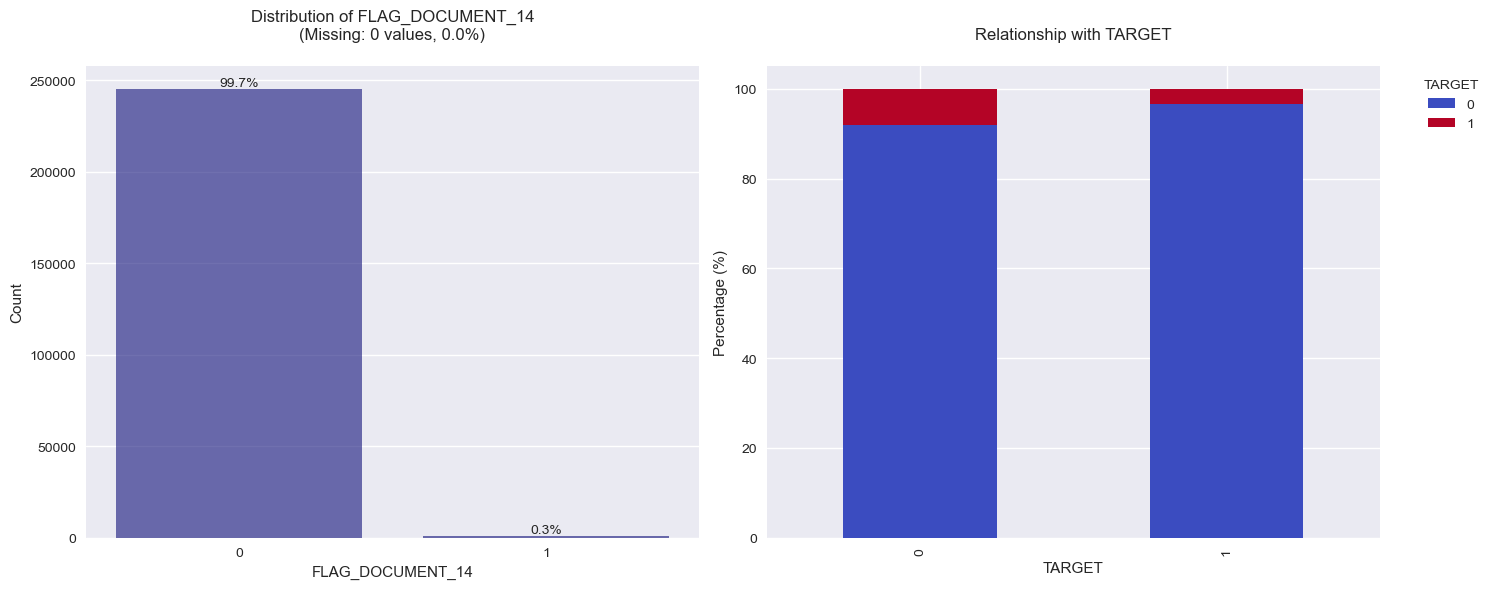


Analyzing FLAG_DOCUMENT_15


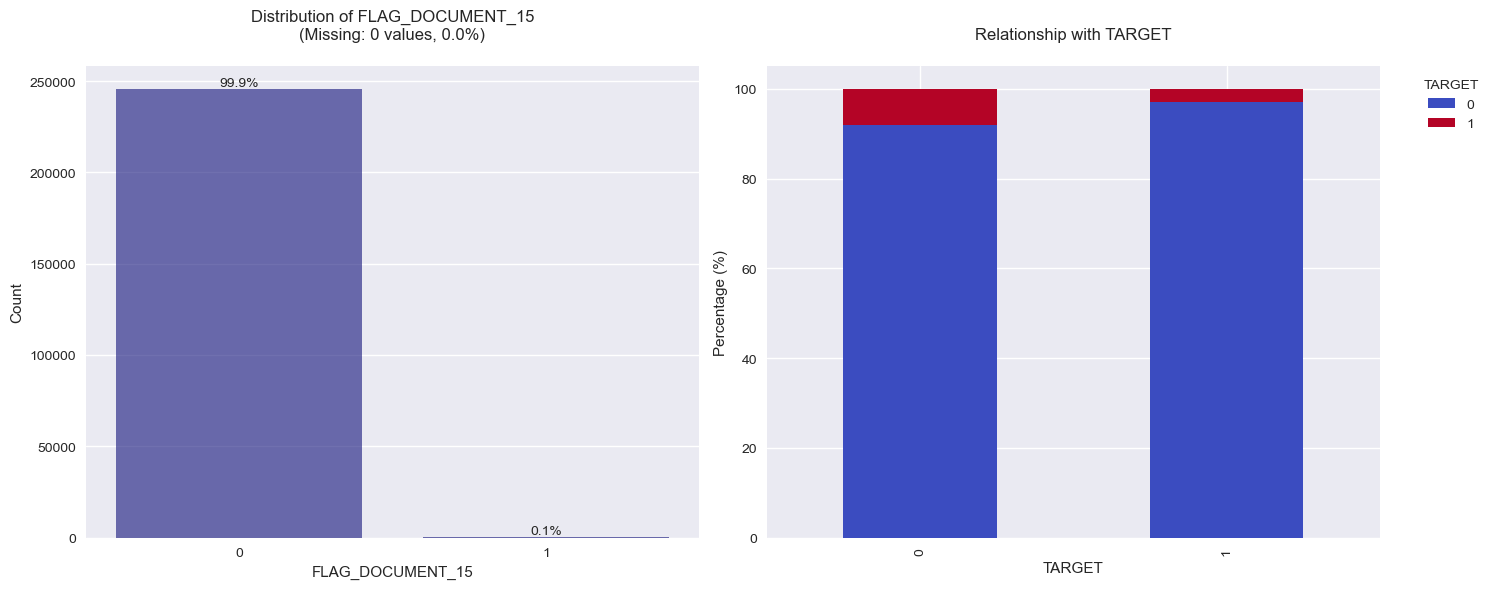


Analyzing FLAG_DOCUMENT_16


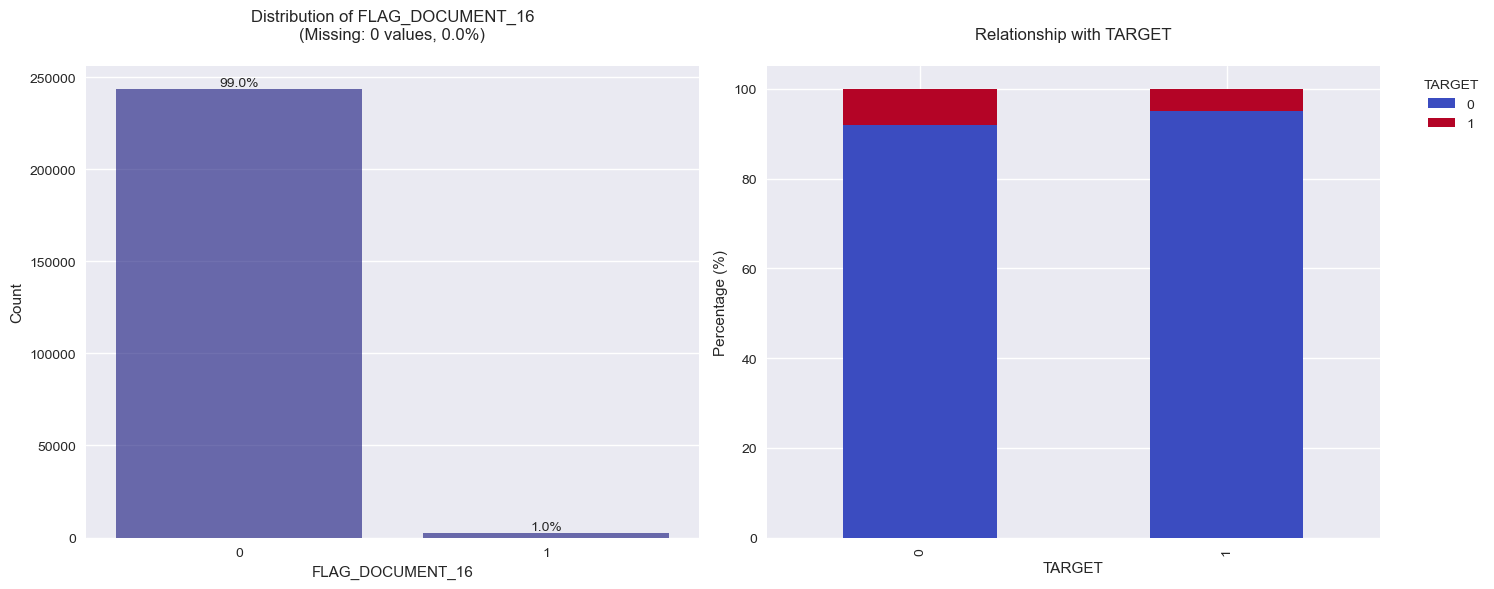


Analyzing FLAG_DOCUMENT_17


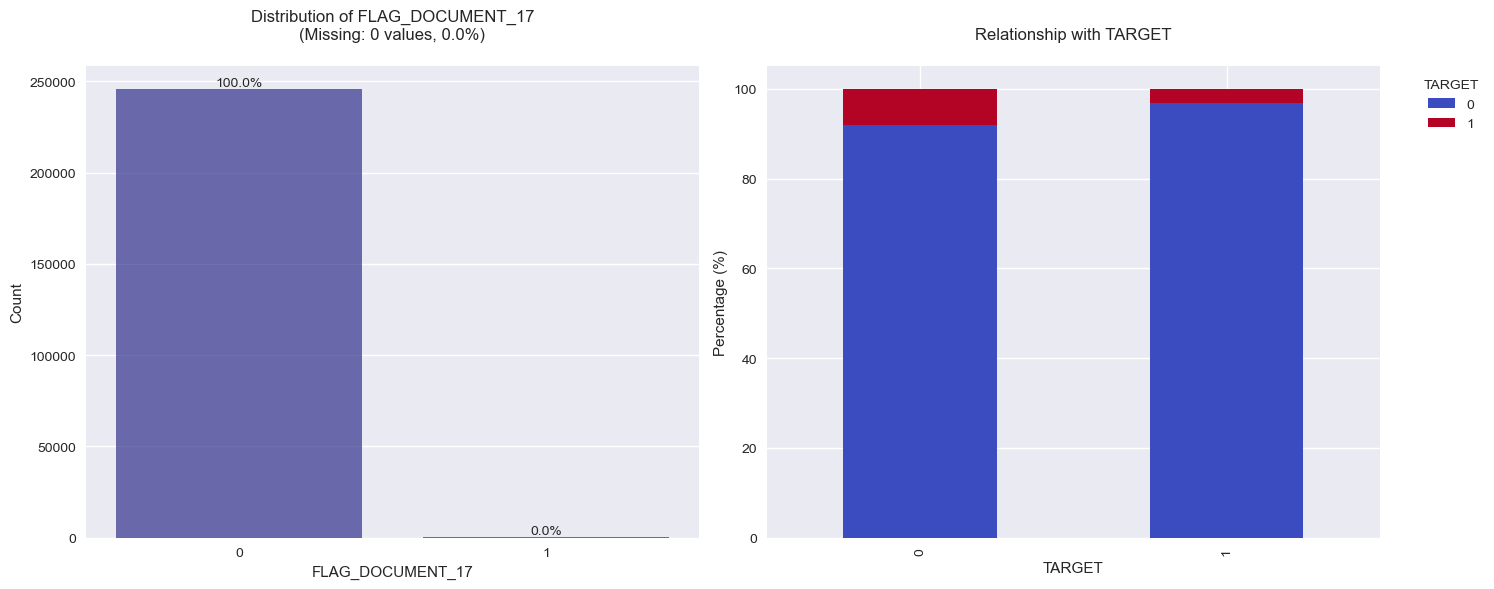


Analyzing FLAG_DOCUMENT_18


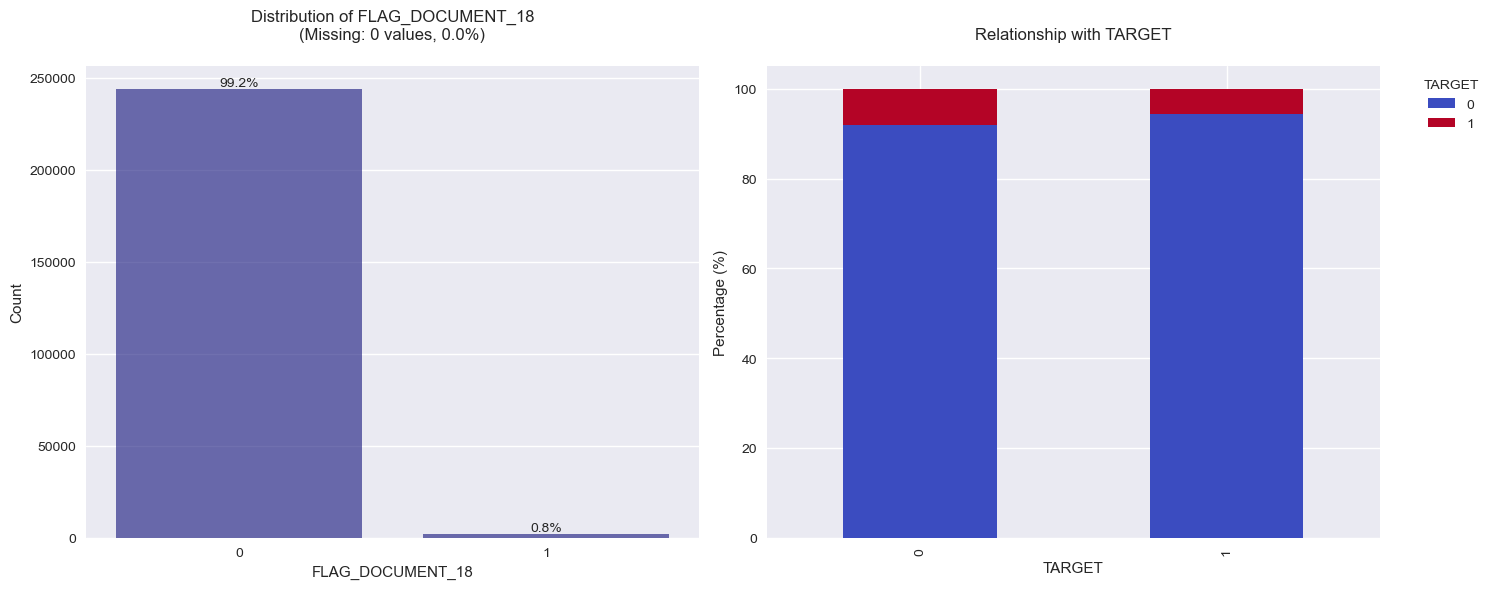


Analyzing FLAG_DOCUMENT_19


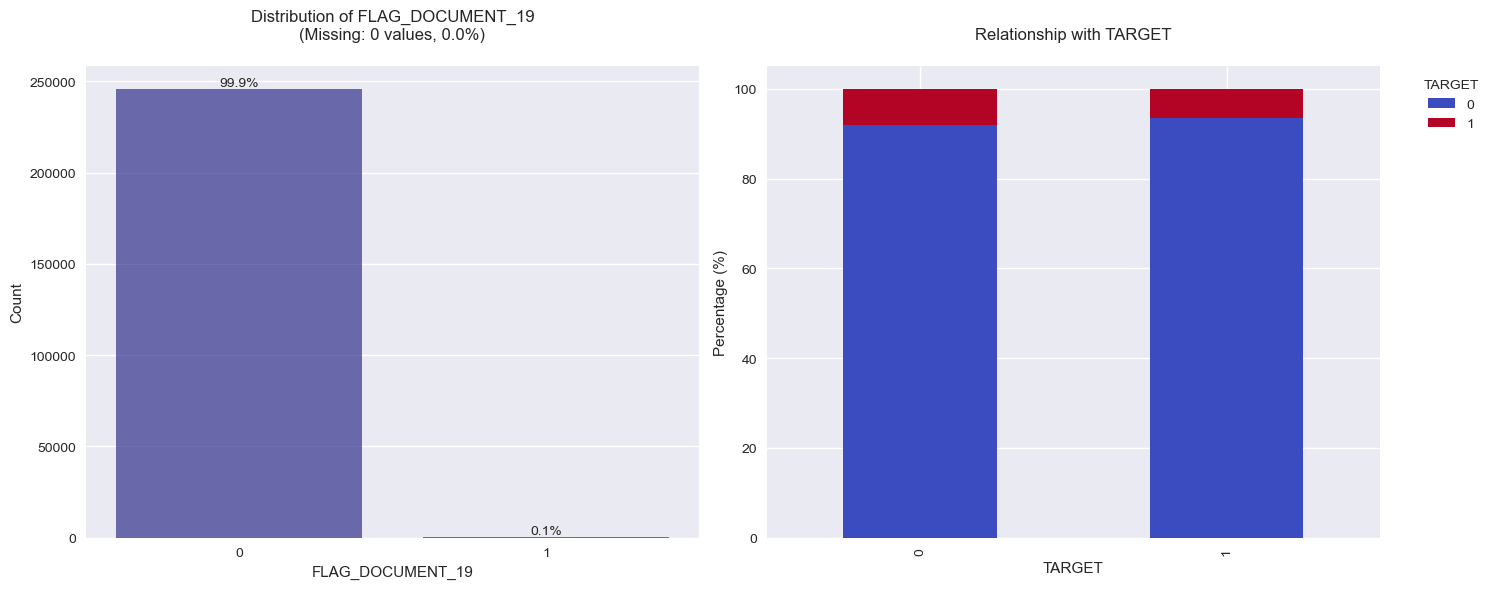


Analyzing FLAG_DOCUMENT_20


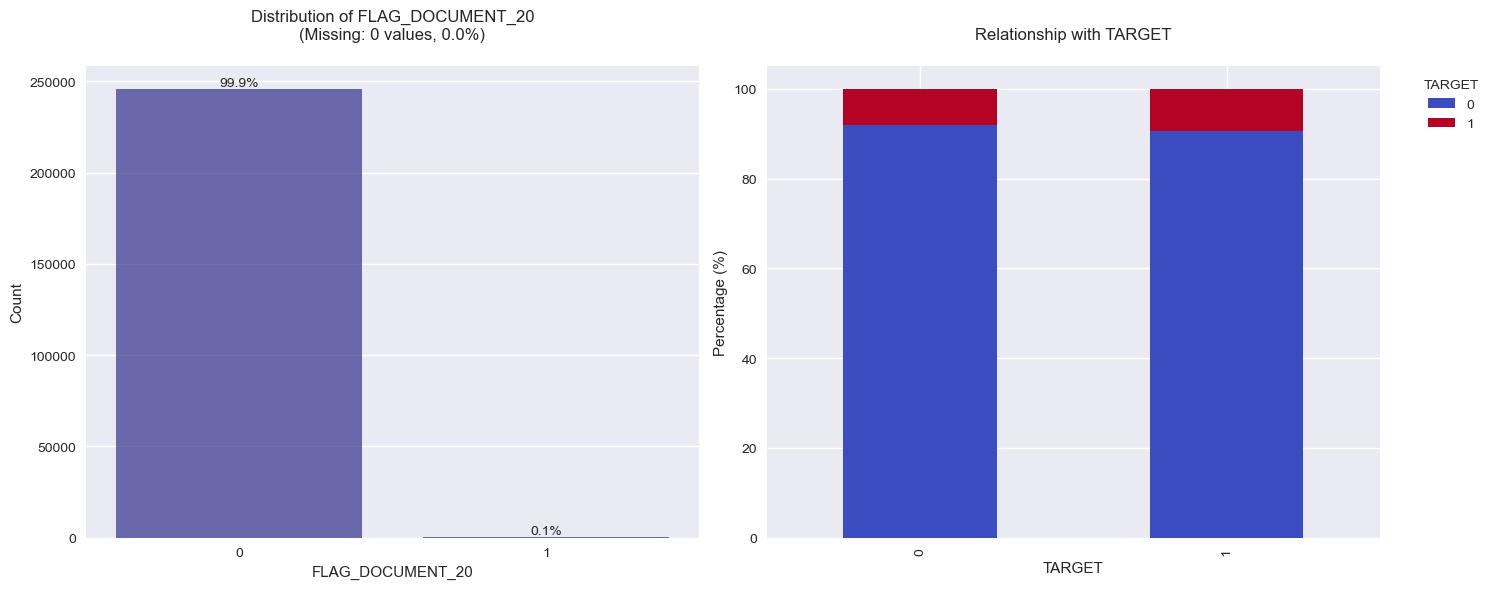


Analyzing FLAG_DOCUMENT_21


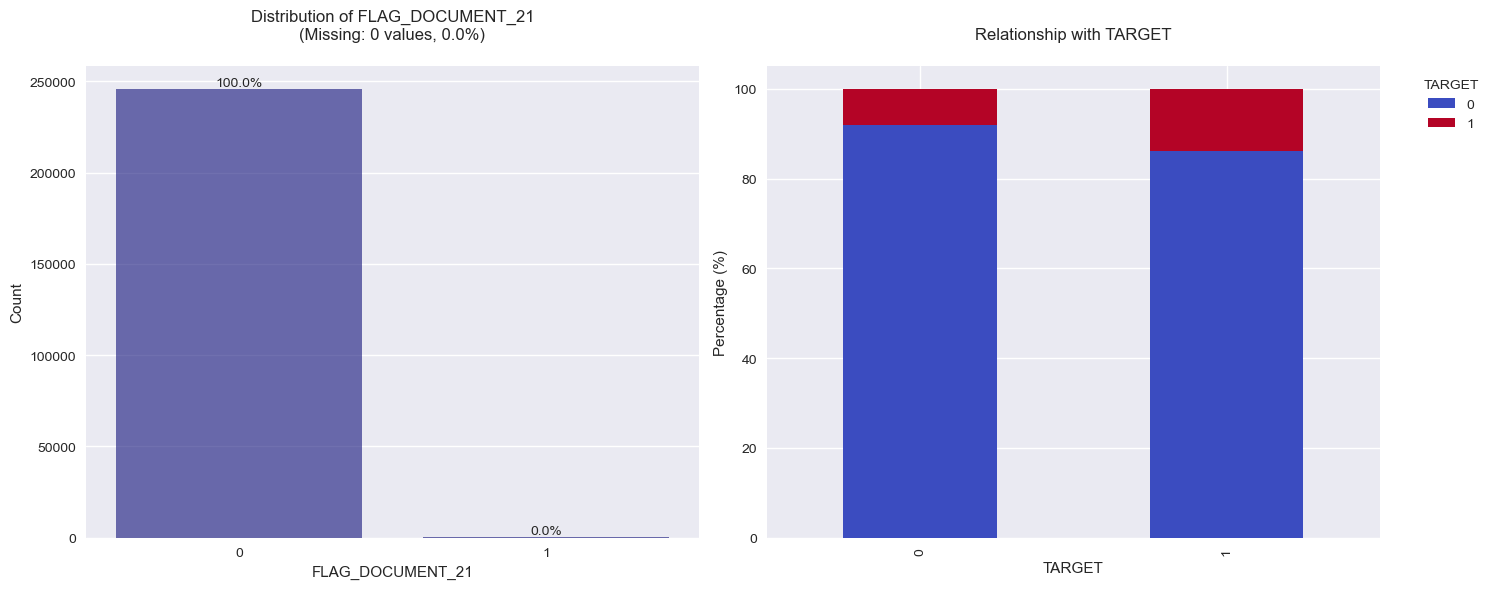


Analyzing AMT_REQ_CREDIT_BUREAU_HOUR


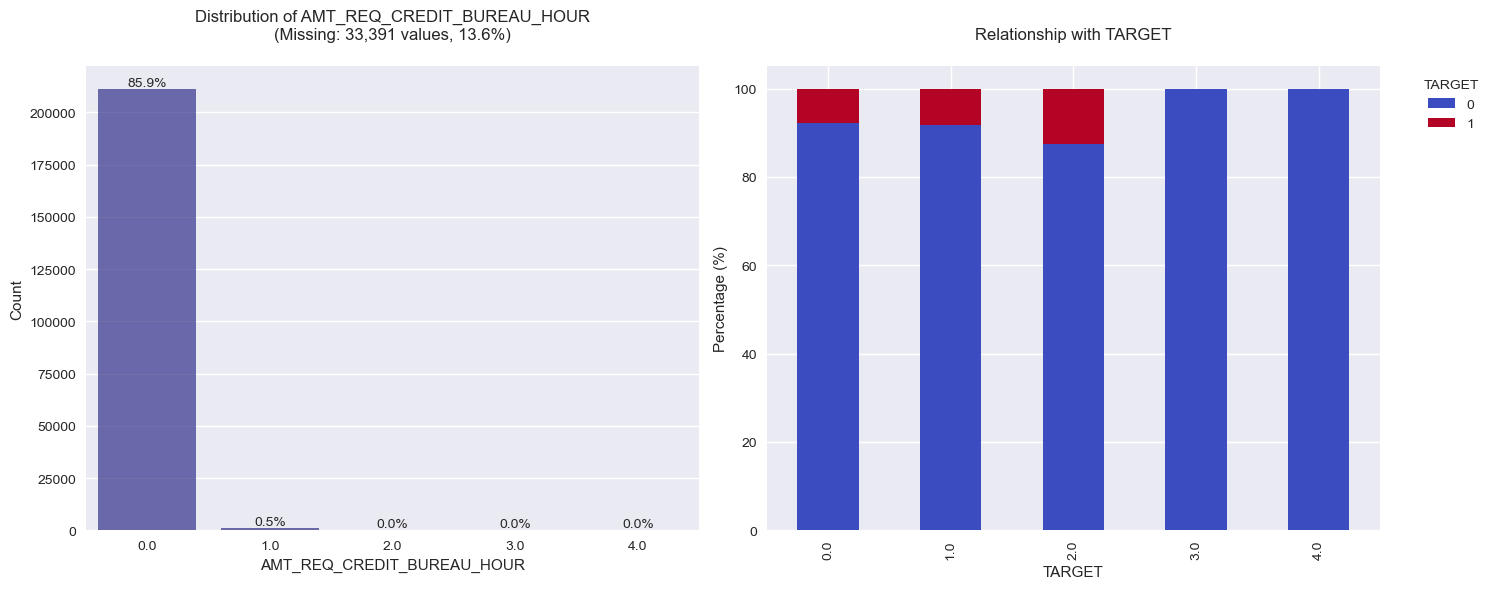


Analyzing AMT_REQ_CREDIT_BUREAU_DAY


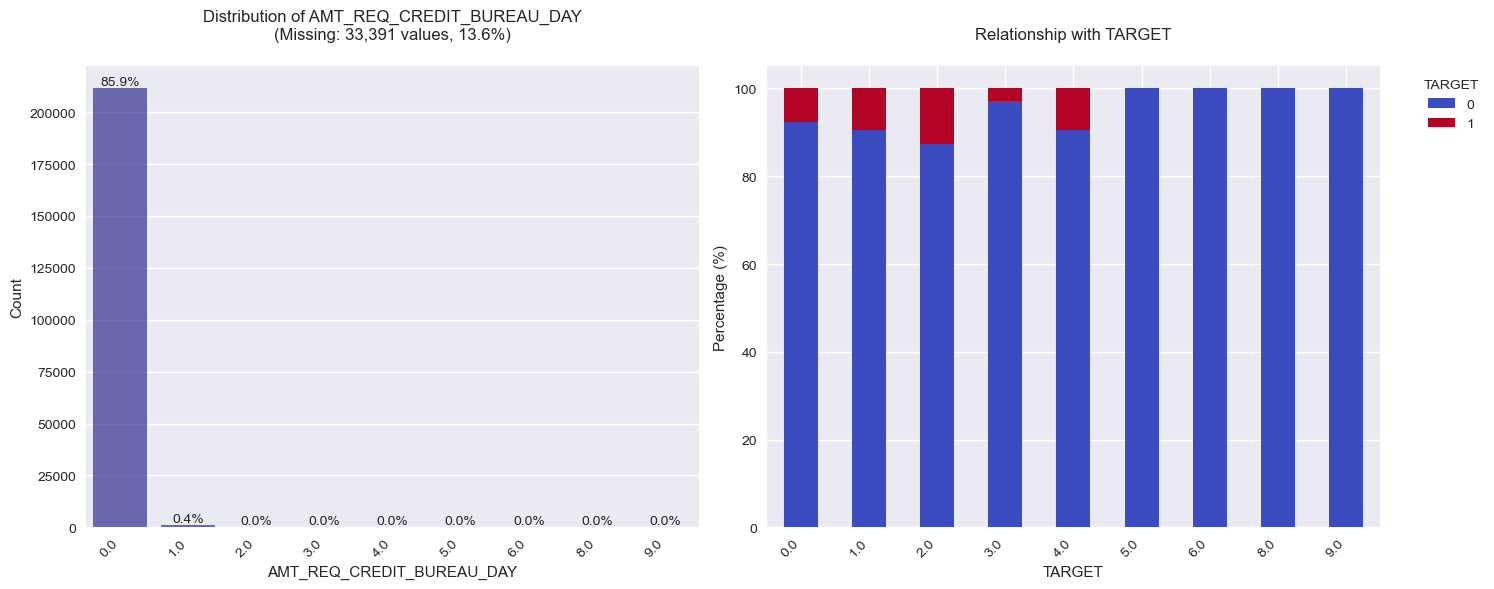


Analyzing AMT_REQ_CREDIT_BUREAU_WEEK


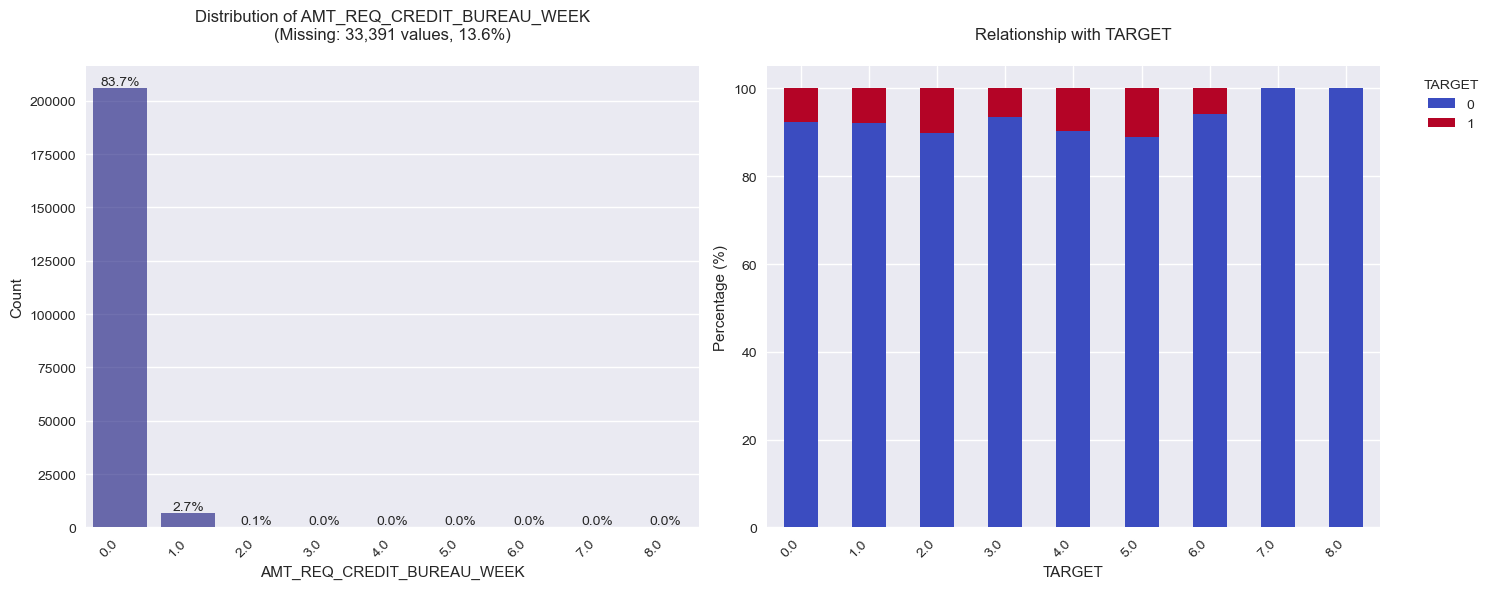


Analyzing AMT_REQ_CREDIT_BUREAU_QRT


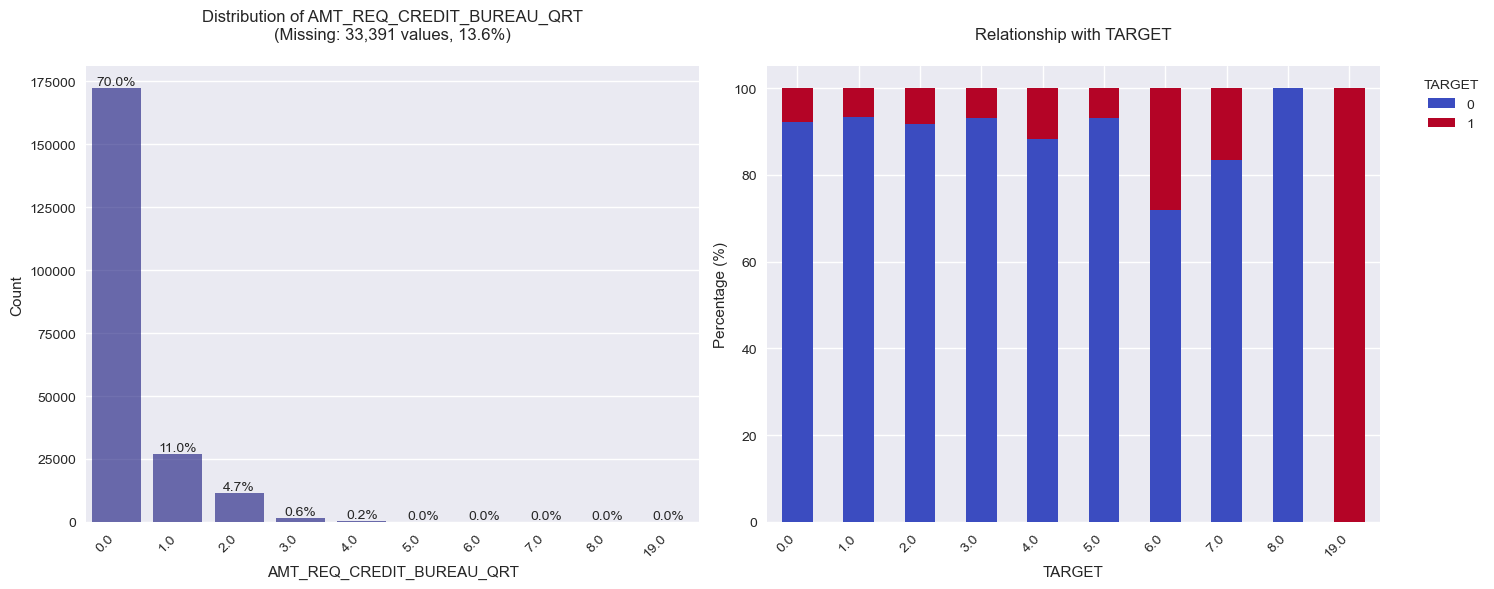


Analyzing TARGET


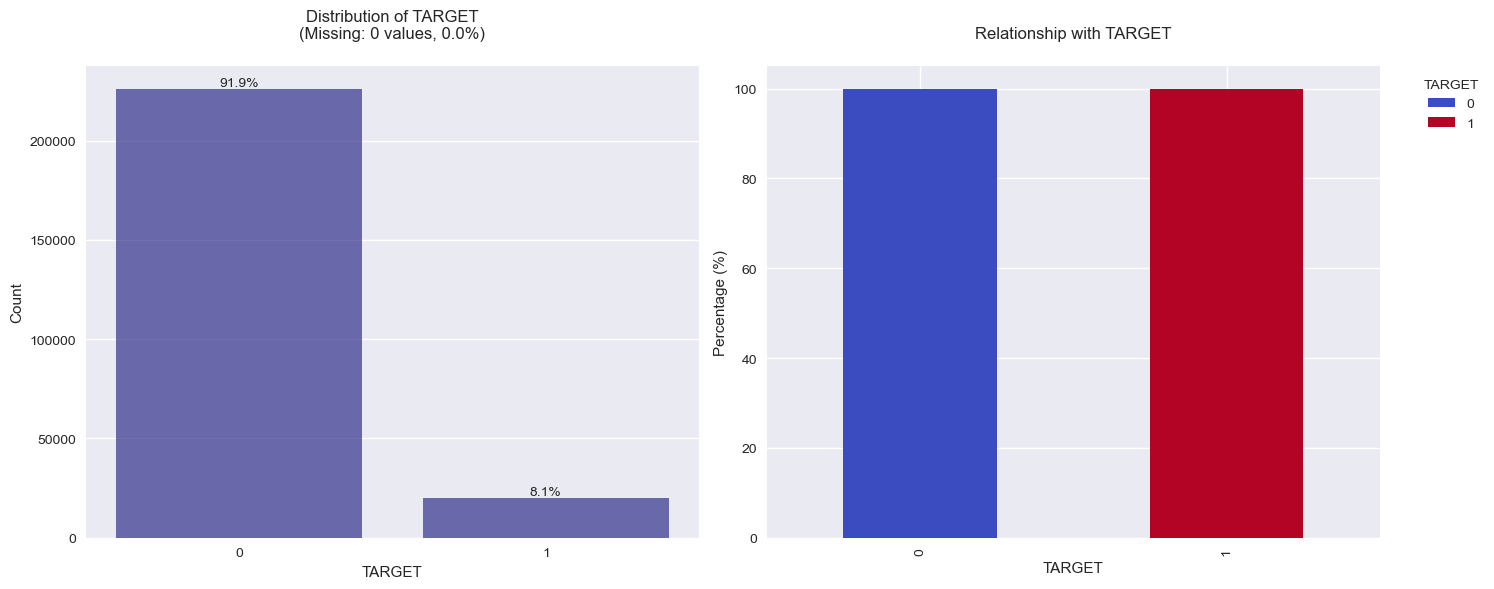

In [33]:
#creo carpeta de imagenes dedicada a la EDA adentro de 'images' del proyecto para tener la visualizacion aparte:
os.makedirs('../images/02_notebook_images', exist_ok=True)

#llamo mi funcion para visualizar las categoricas, y respeto a la variable TARGET:
#la funcion se adapta a cada variable para poder luego en un bucle tratar visualizar el numero maximo de categoricas con una vizualizacion adaptada 
#y rapida
eda.plot_all_variables(data_train, categorical_vars, 'TARGET')

Iniciando análisis de 61 características continuas

Procesando lote 1 de 21


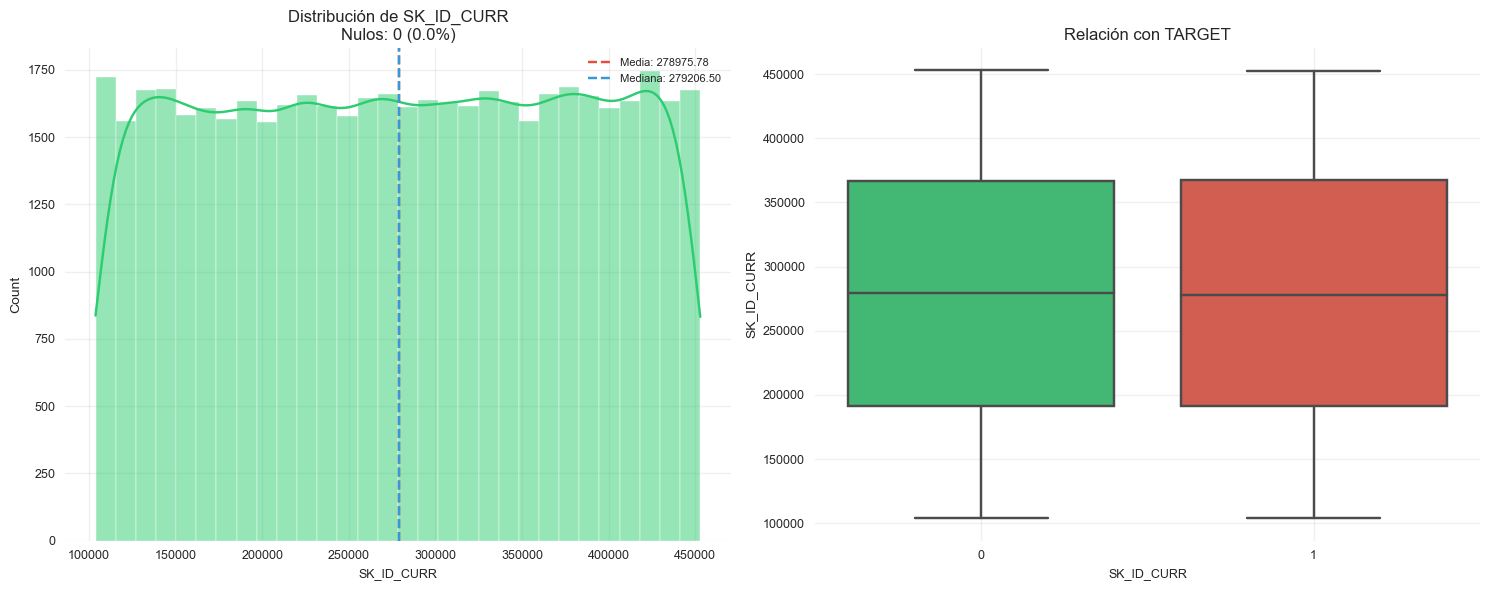

Gráfico de 'SK_ID_CURR' guardado exitosamente en '..\images\02_notebook_images'.


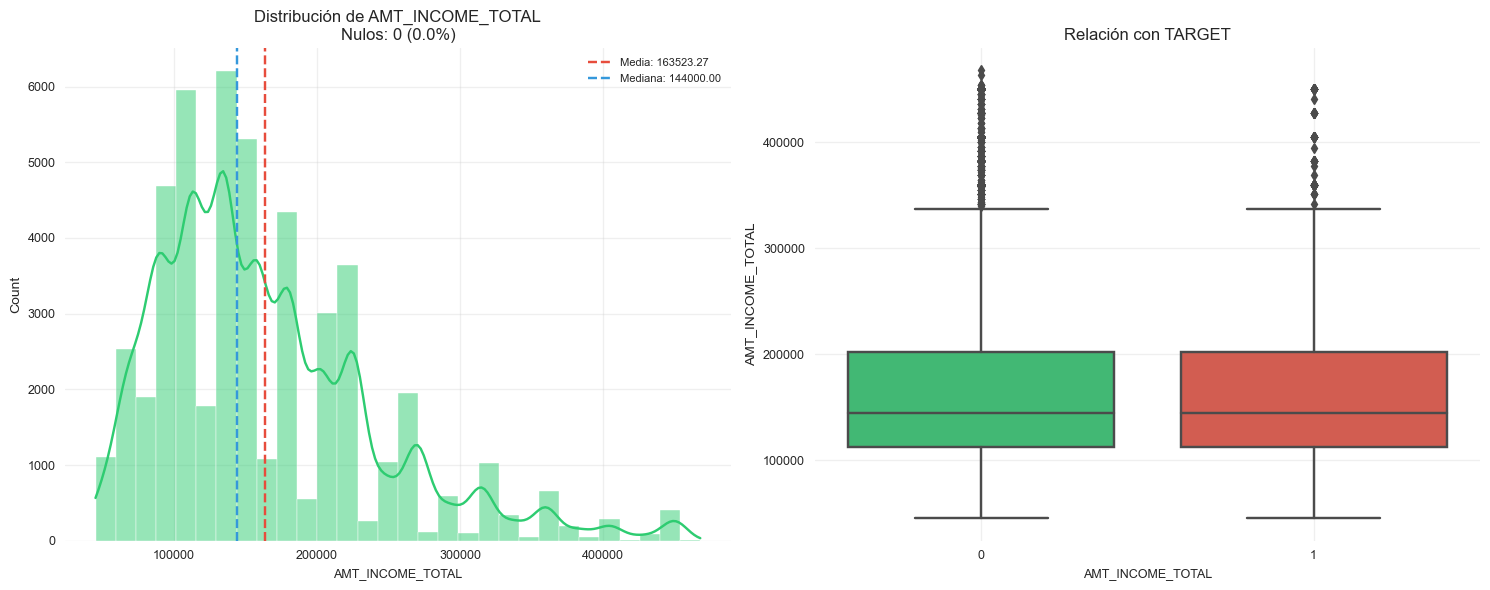

Gráfico de 'AMT_INCOME_TOTAL' guardado exitosamente en '..\images\02_notebook_images'.


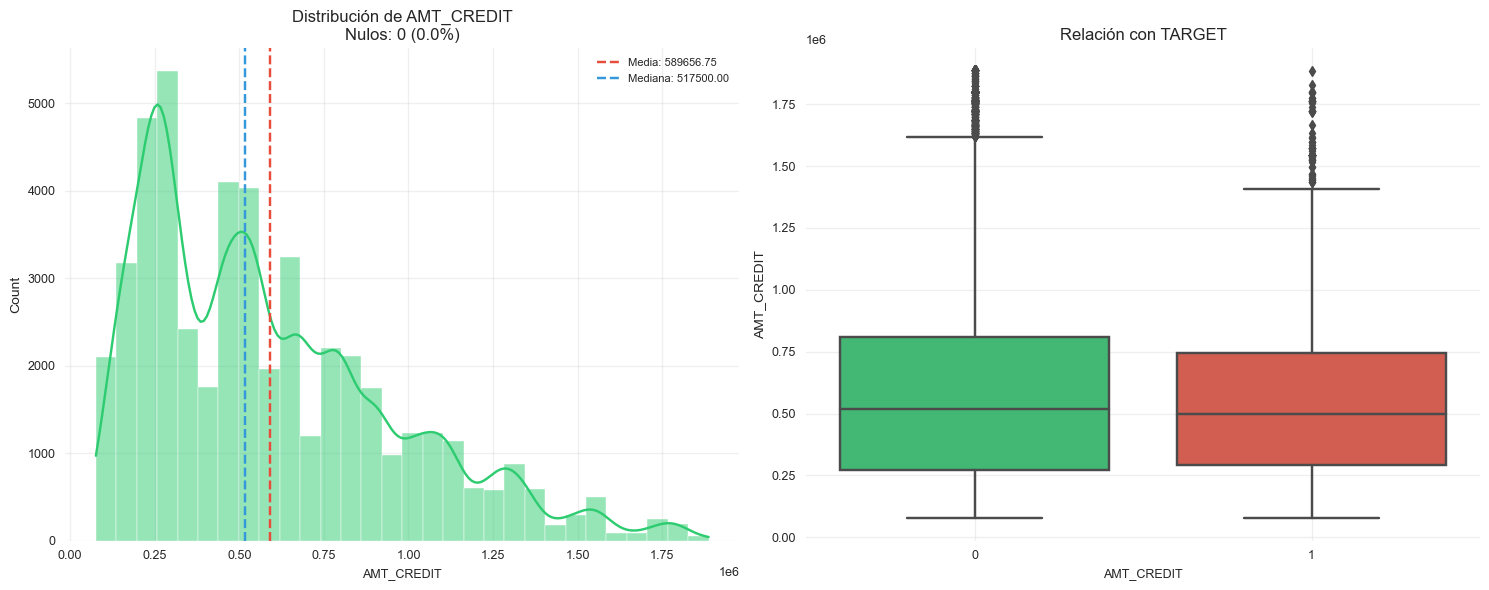

Gráfico de 'AMT_CREDIT' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 2 de 21


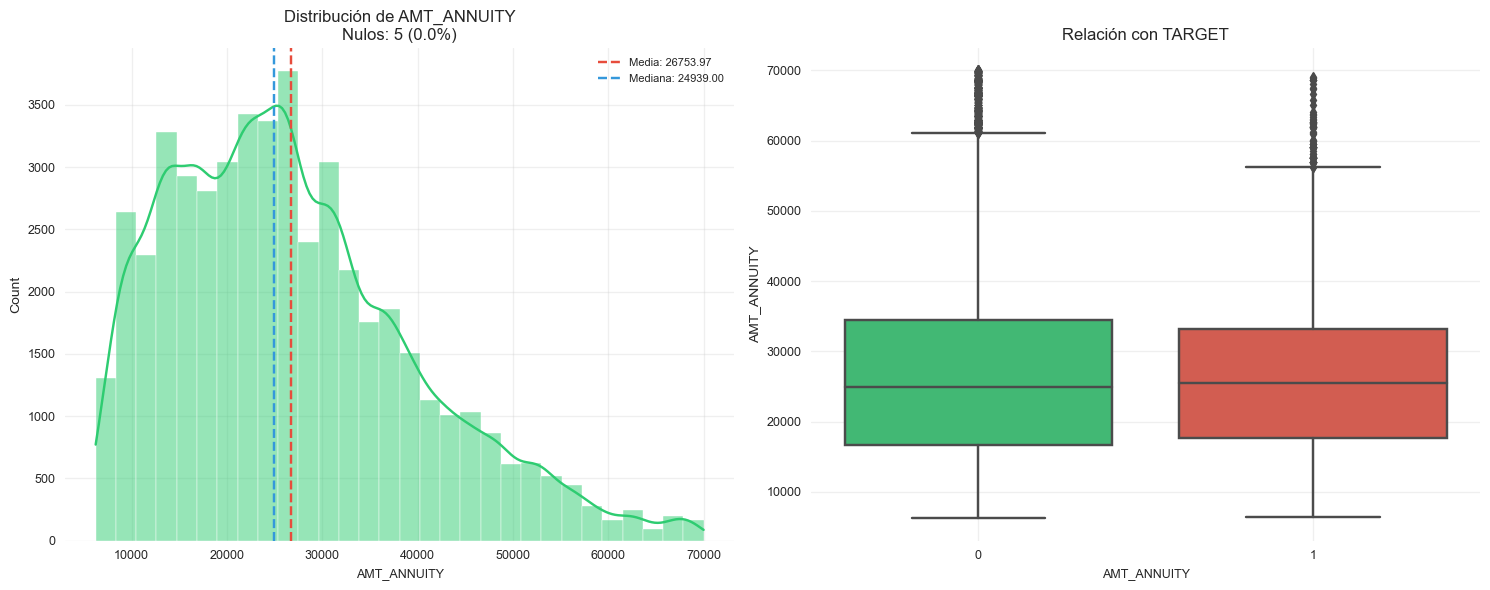

Gráfico de 'AMT_ANNUITY' guardado exitosamente en '..\images\02_notebook_images'.


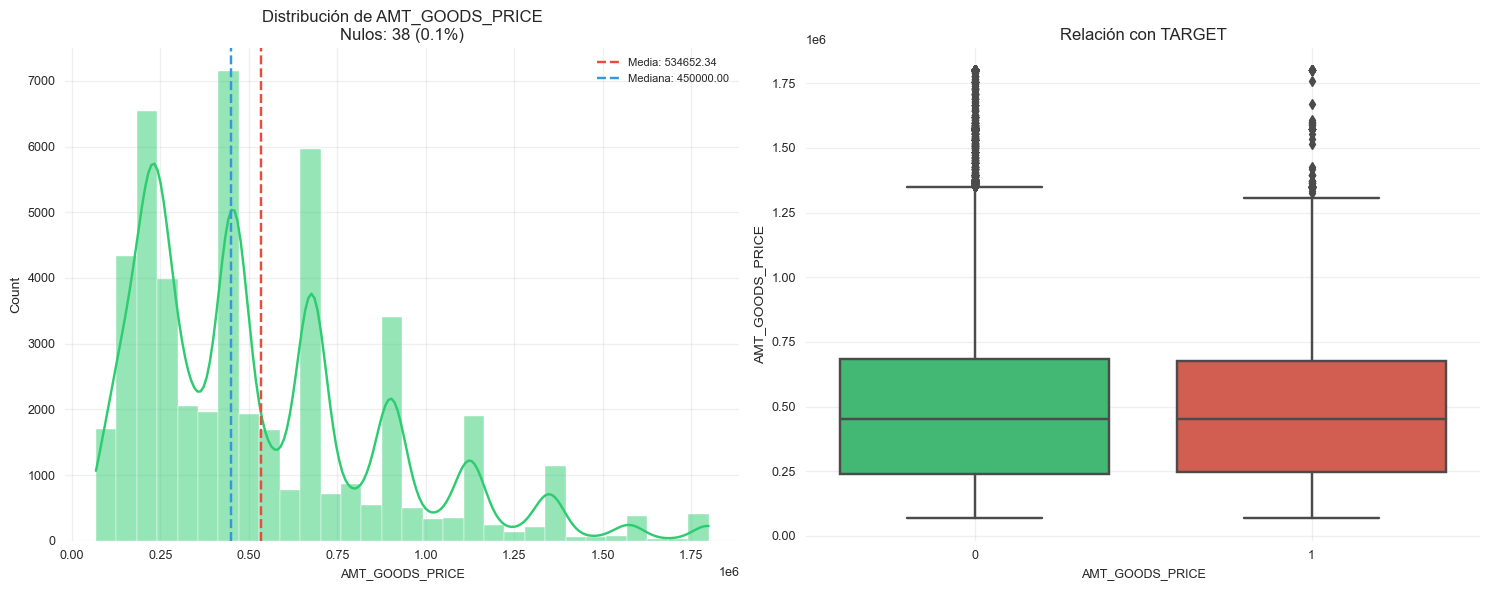

Gráfico de 'AMT_GOODS_PRICE' guardado exitosamente en '..\images\02_notebook_images'.


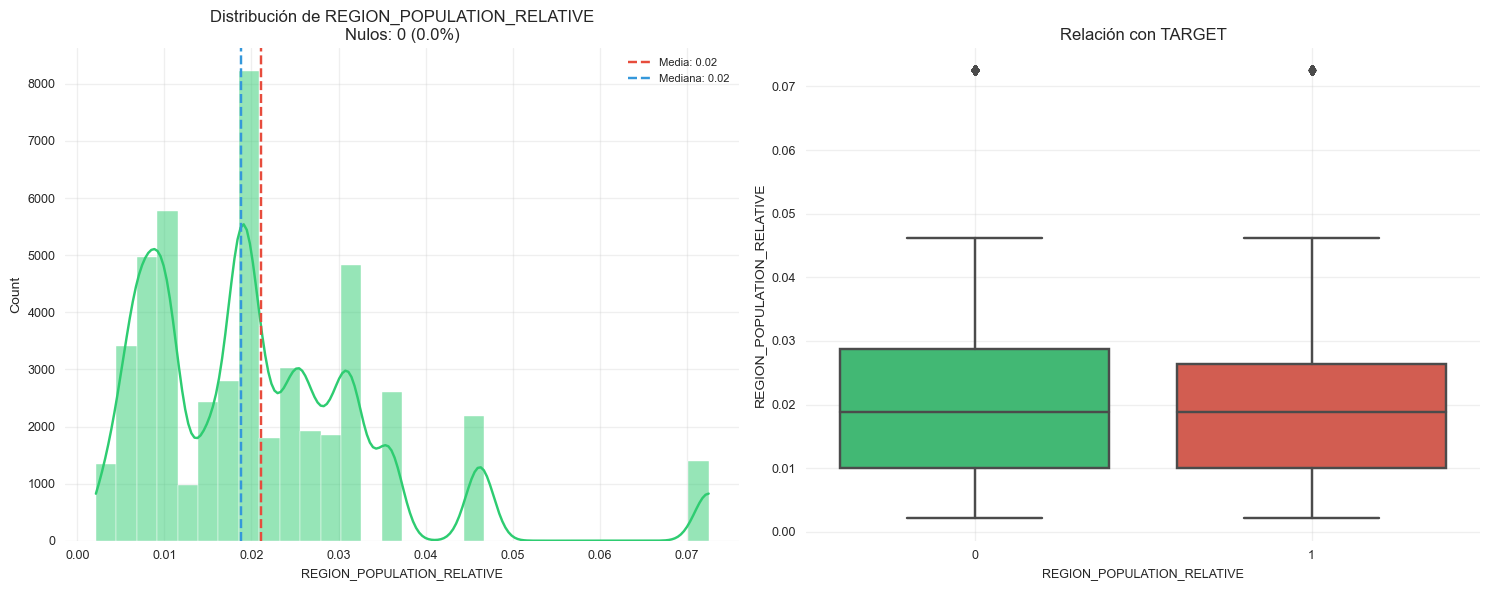

Gráfico de 'REGION_POPULATION_RELATIVE' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 3 de 21


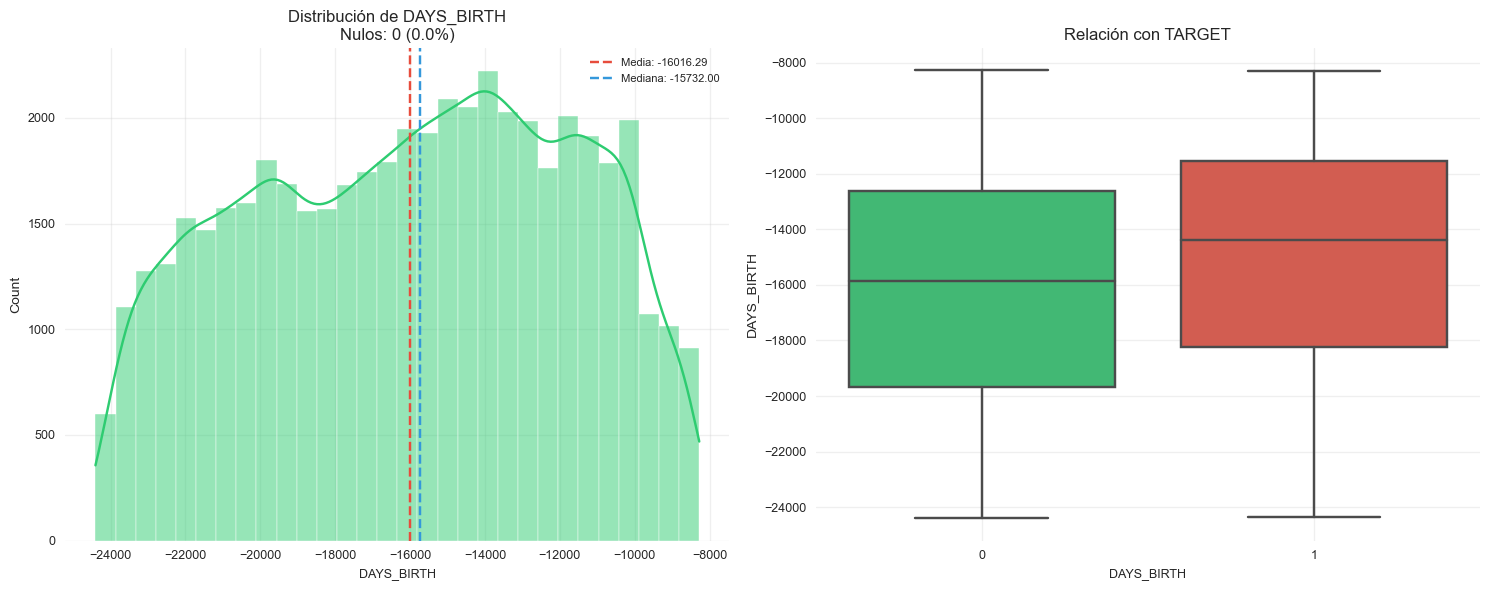

Gráfico de 'DAYS_BIRTH' guardado exitosamente en '..\images\02_notebook_images'.


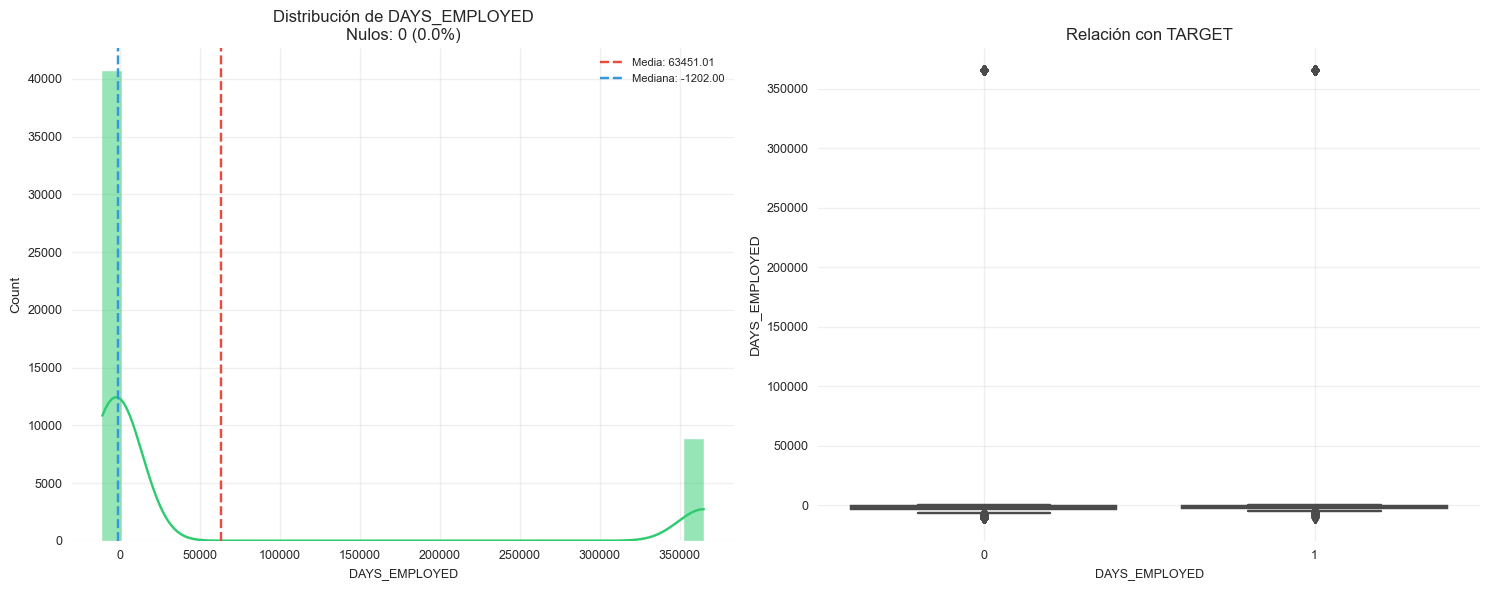

Gráfico de 'DAYS_EMPLOYED' guardado exitosamente en '..\images\02_notebook_images'.


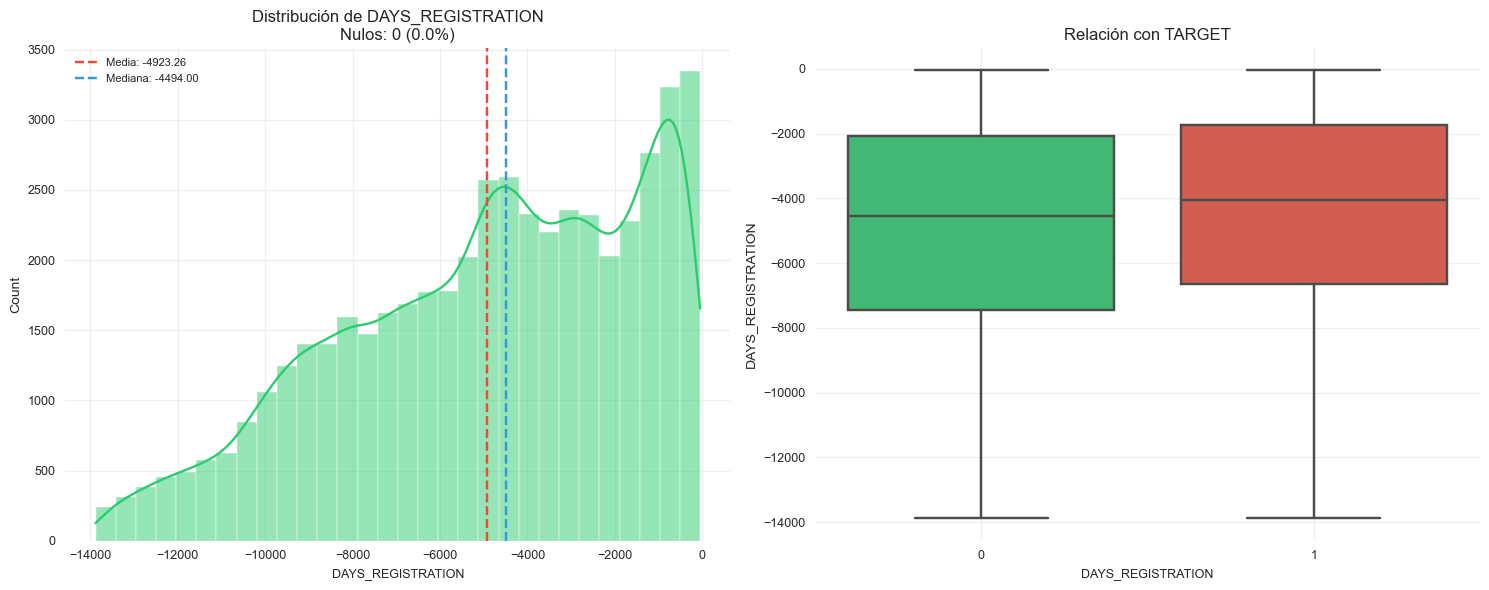

Gráfico de 'DAYS_REGISTRATION' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 4 de 21


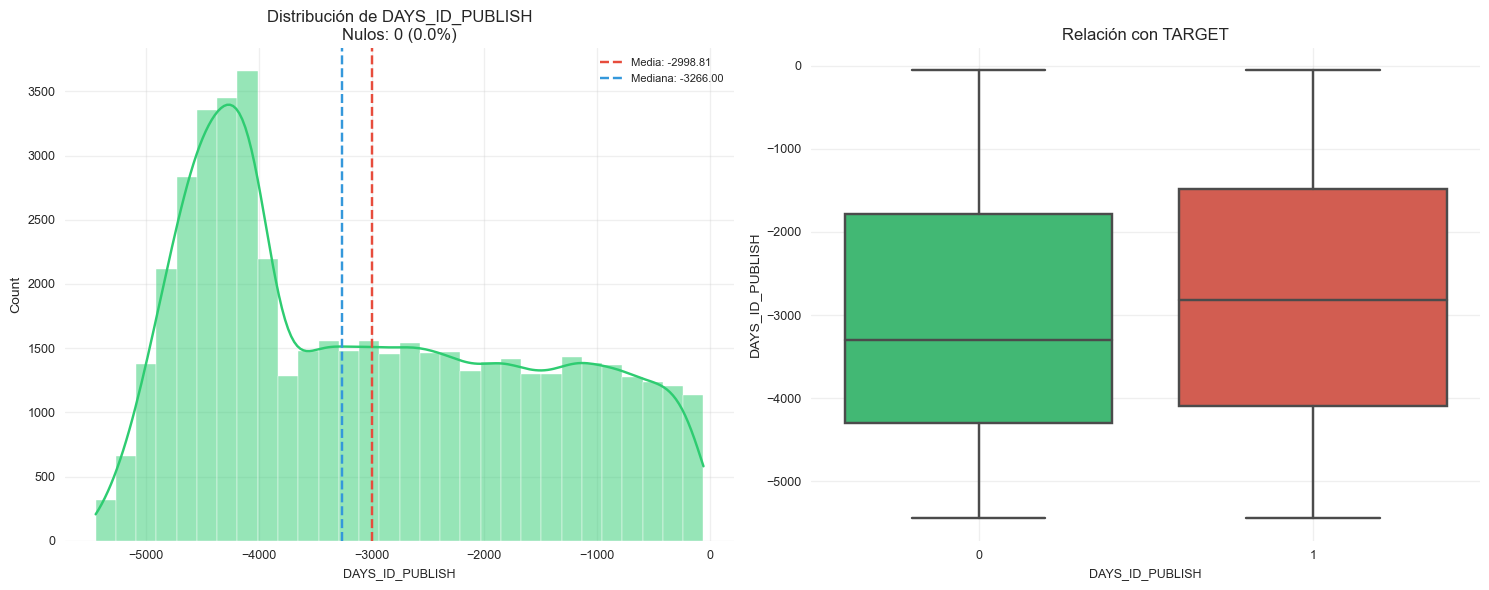

Gráfico de 'DAYS_ID_PUBLISH' guardado exitosamente en '..\images\02_notebook_images'.


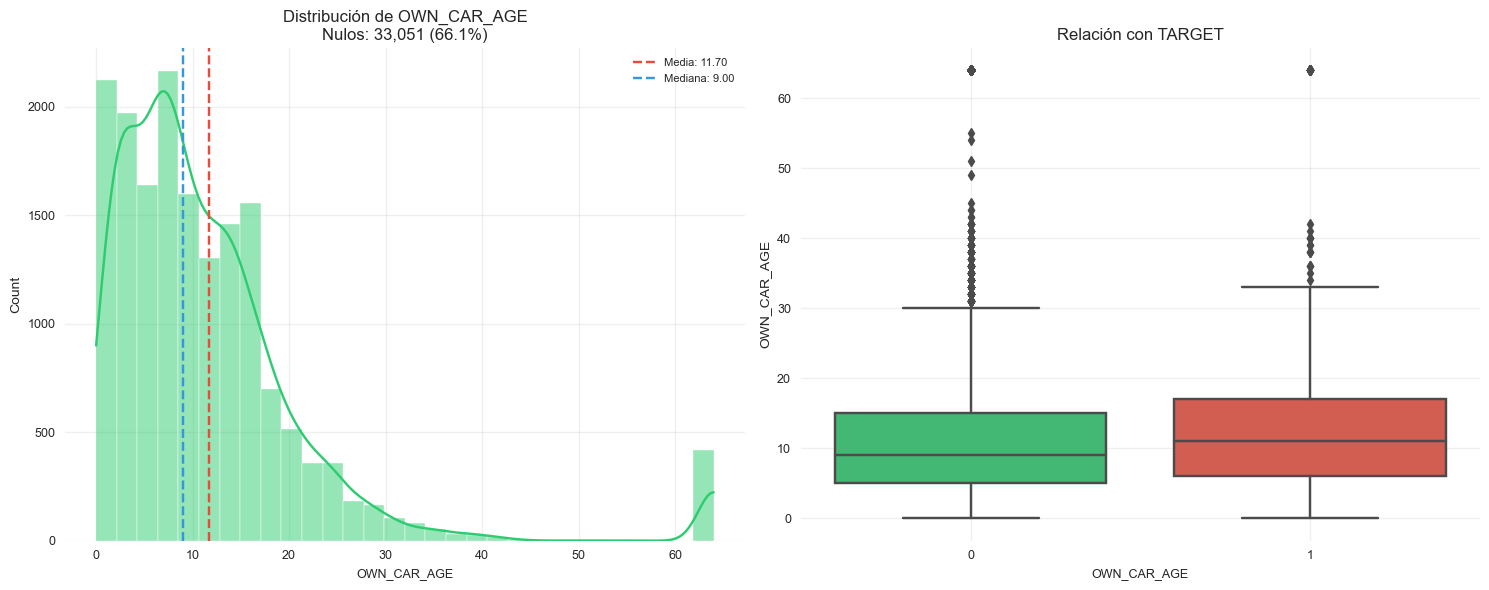

Gráfico de 'OWN_CAR_AGE' guardado exitosamente en '..\images\02_notebook_images'.


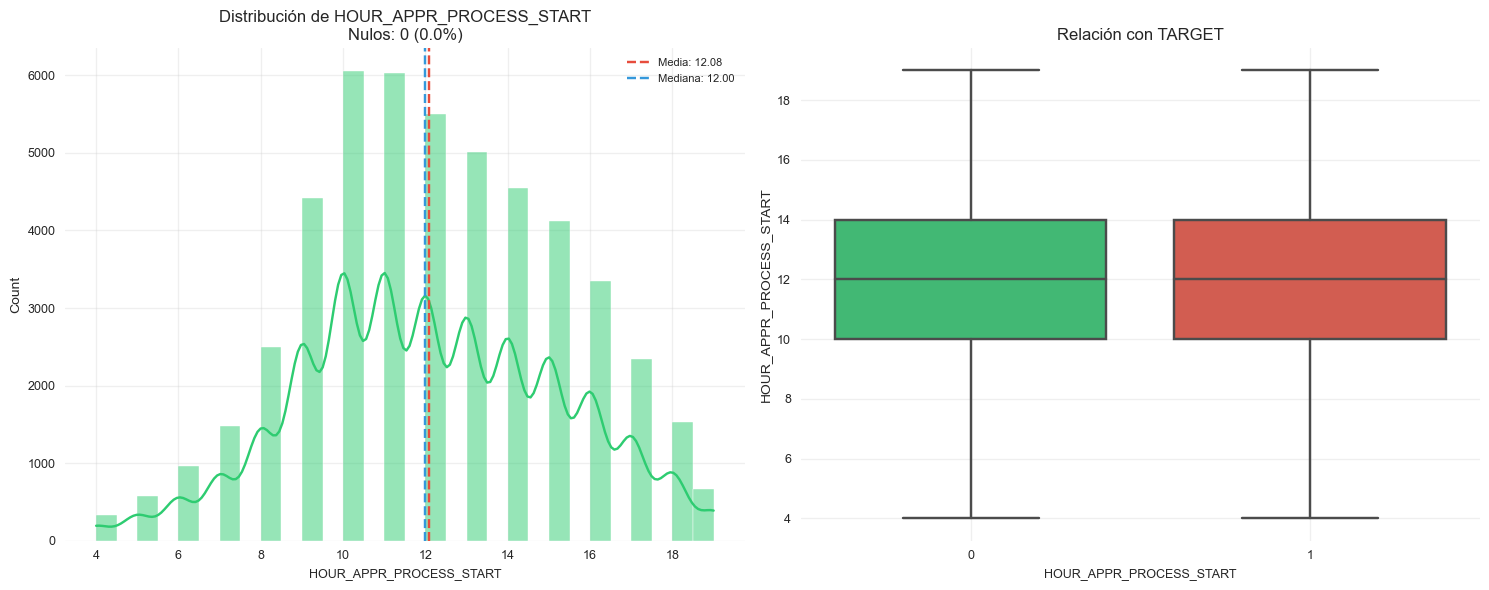

Gráfico de 'HOUR_APPR_PROCESS_START' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 5 de 21


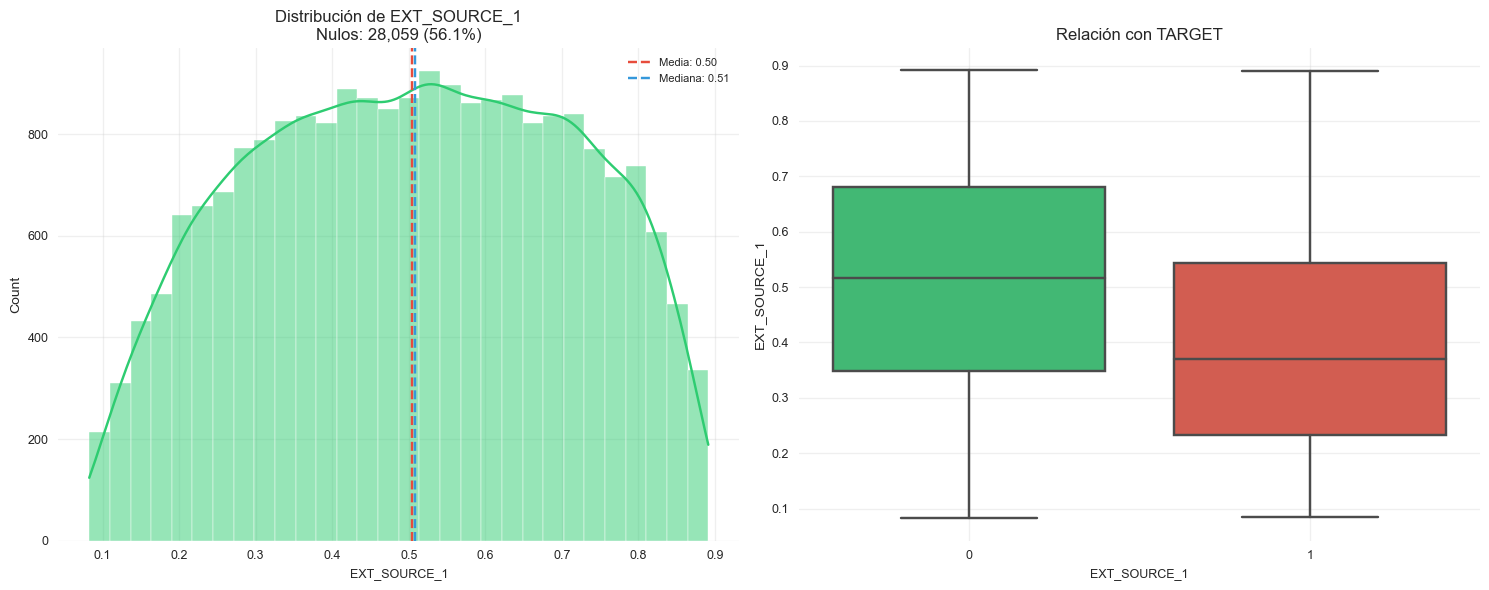

Gráfico de 'EXT_SOURCE_1' guardado exitosamente en '..\images\02_notebook_images'.


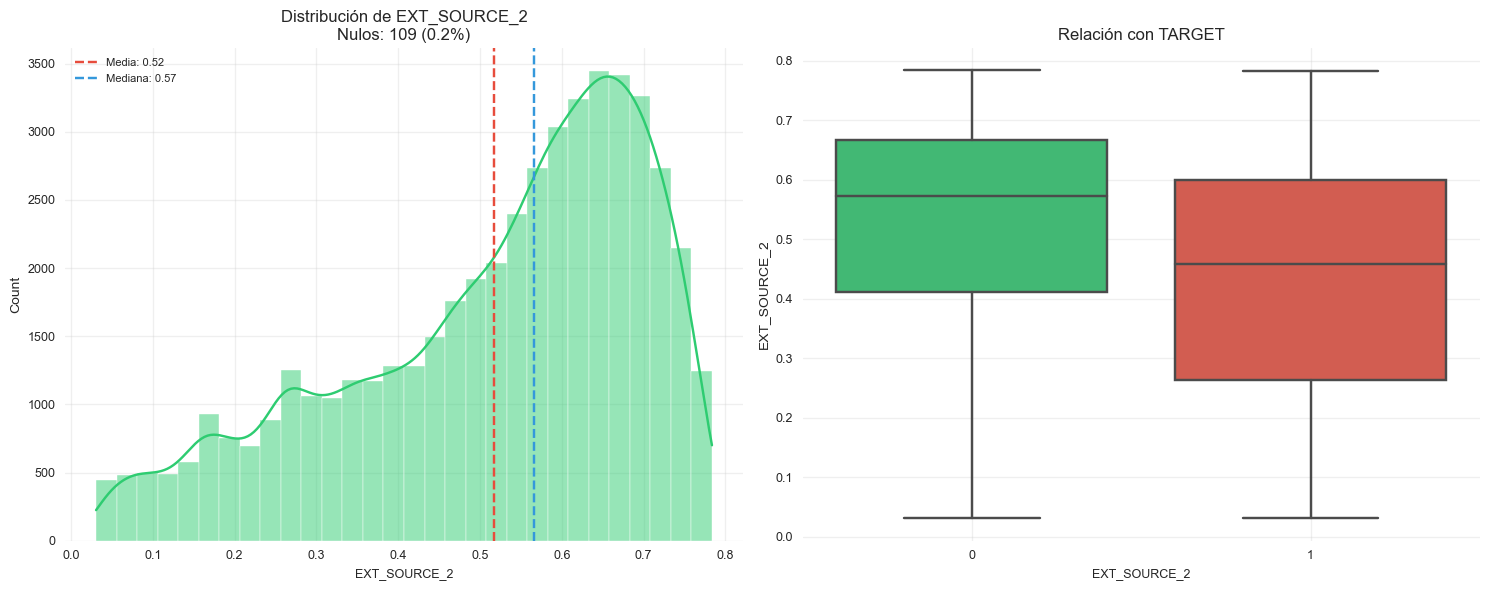

Gráfico de 'EXT_SOURCE_2' guardado exitosamente en '..\images\02_notebook_images'.


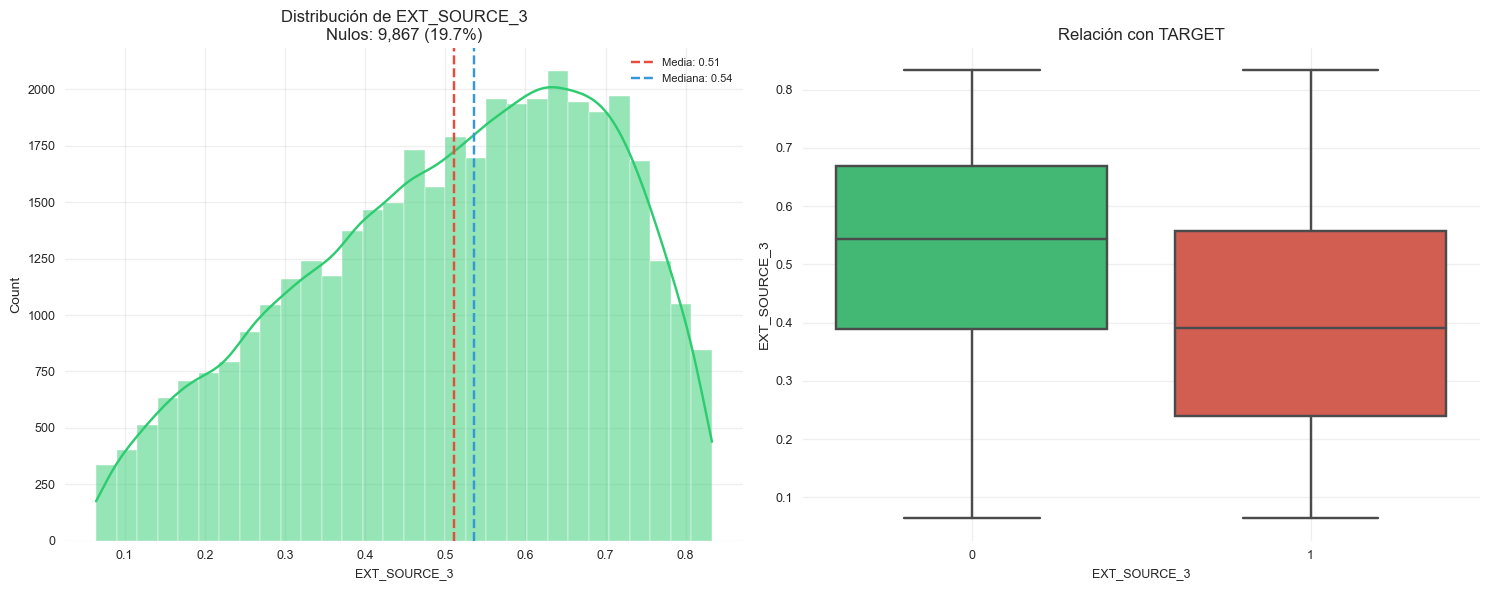

Gráfico de 'EXT_SOURCE_3' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 6 de 21


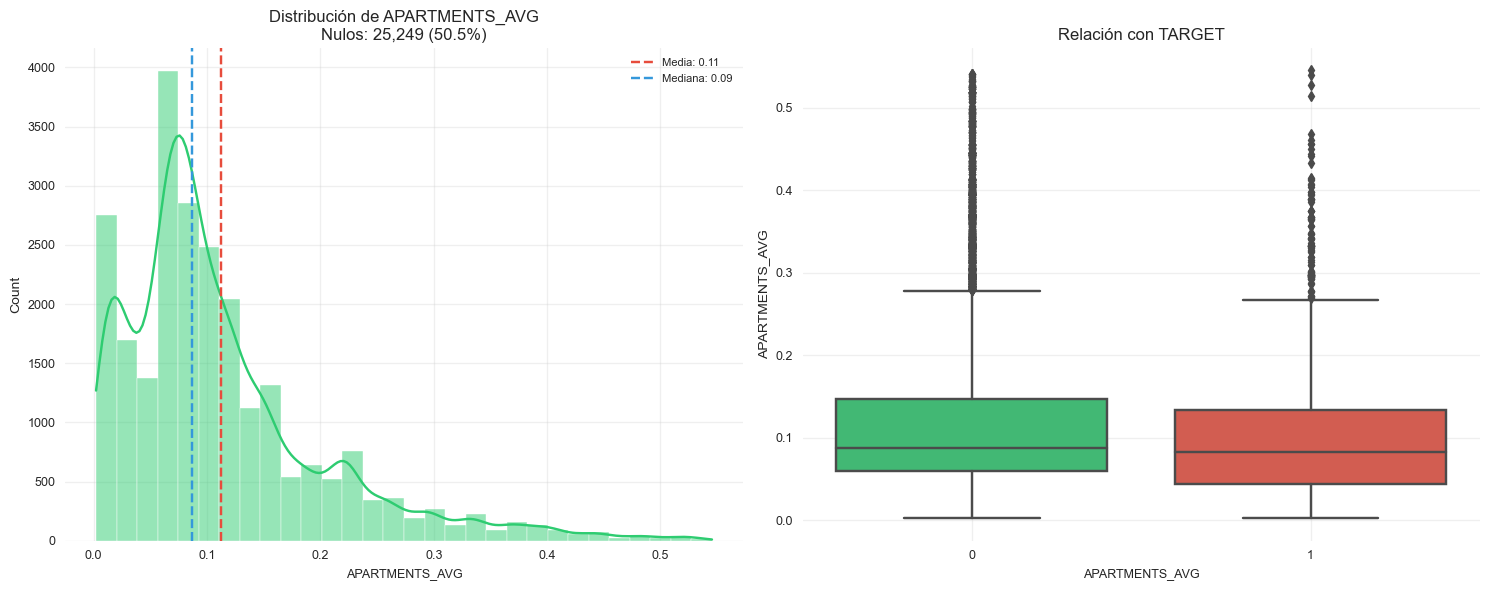

Gráfico de 'APARTMENTS_AVG' guardado exitosamente en '..\images\02_notebook_images'.


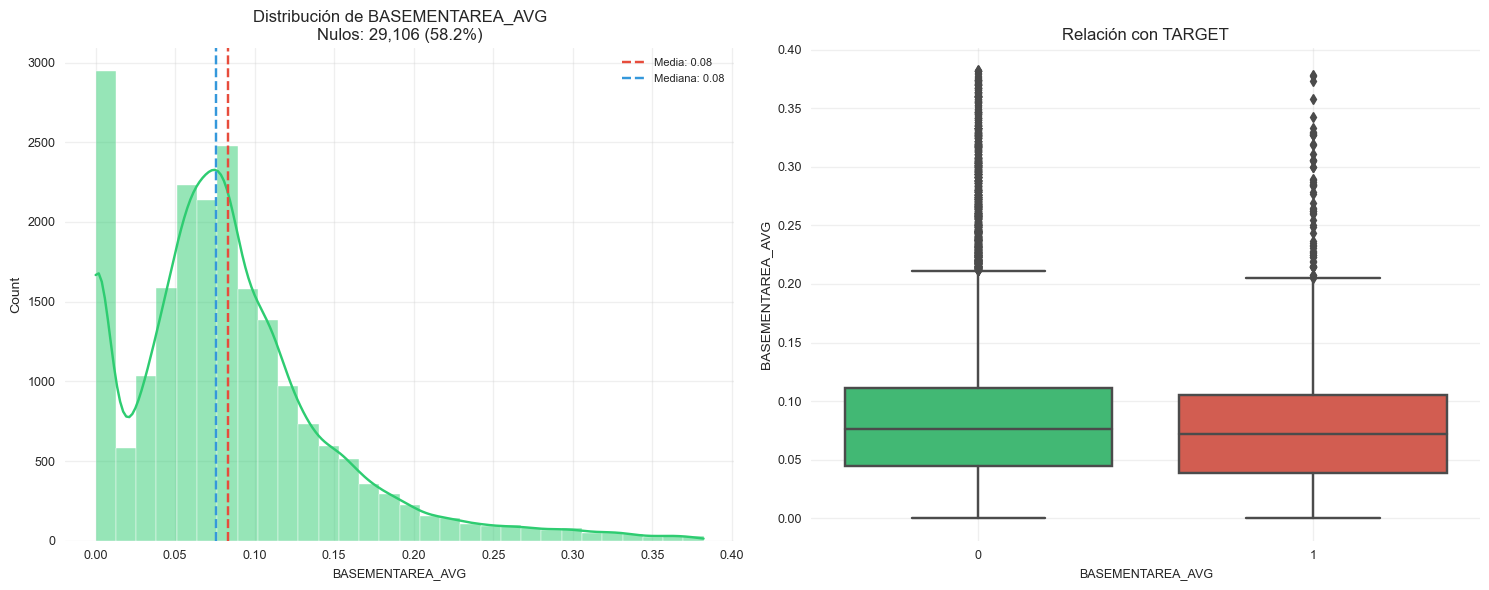

Gráfico de 'BASEMENTAREA_AVG' guardado exitosamente en '..\images\02_notebook_images'.


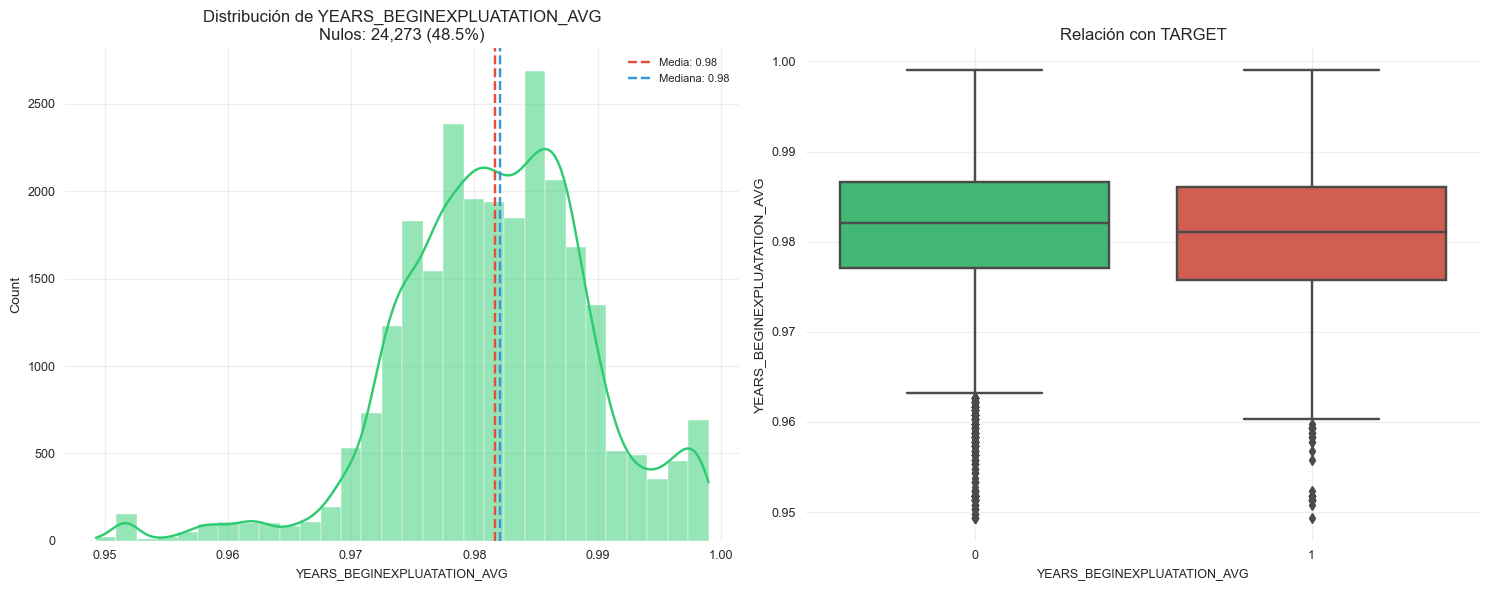

Gráfico de 'YEARS_BEGINEXPLUATATION_AVG' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 7 de 21


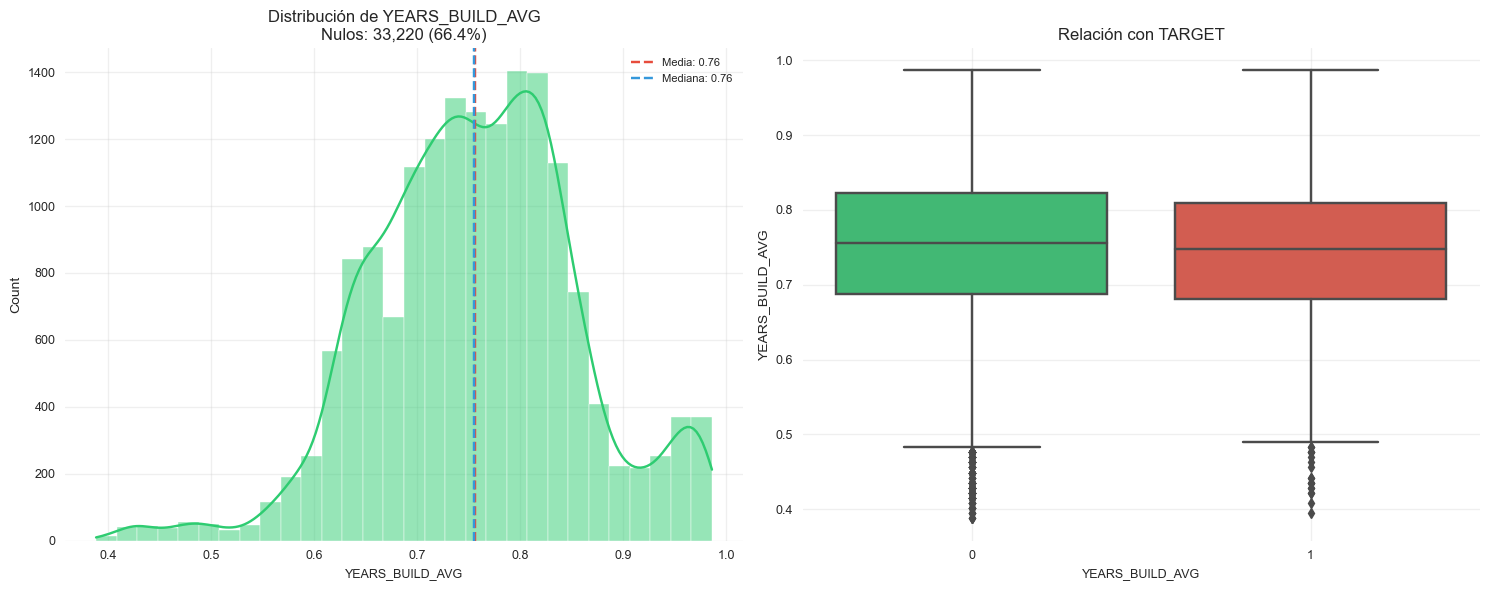

Gráfico de 'YEARS_BUILD_AVG' guardado exitosamente en '..\images\02_notebook_images'.


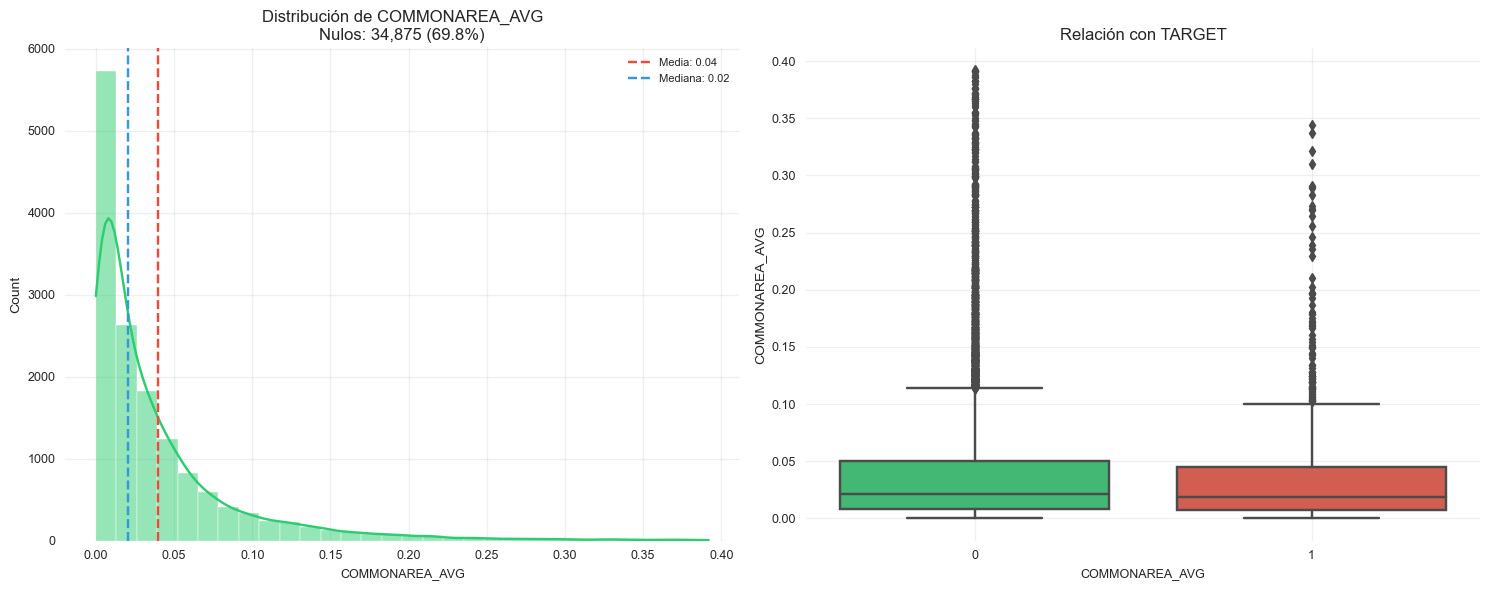

Gráfico de 'COMMONAREA_AVG' guardado exitosamente en '..\images\02_notebook_images'.


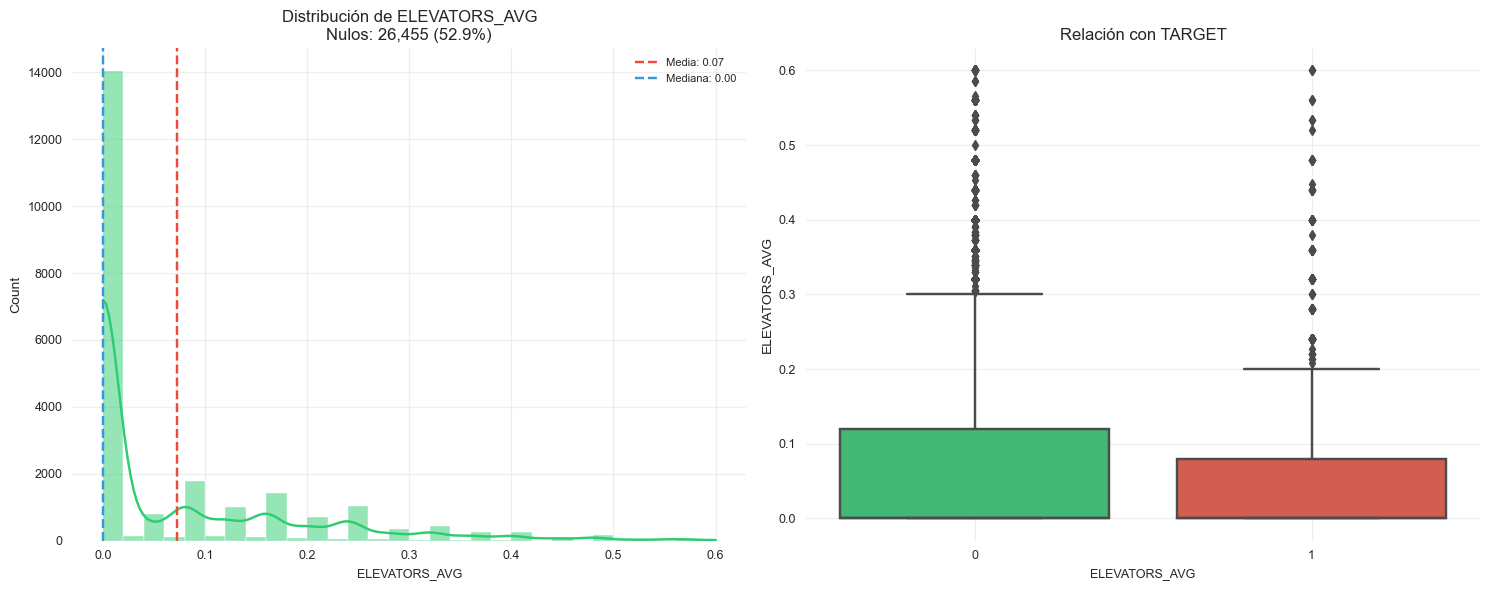

Gráfico de 'ELEVATORS_AVG' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 8 de 21


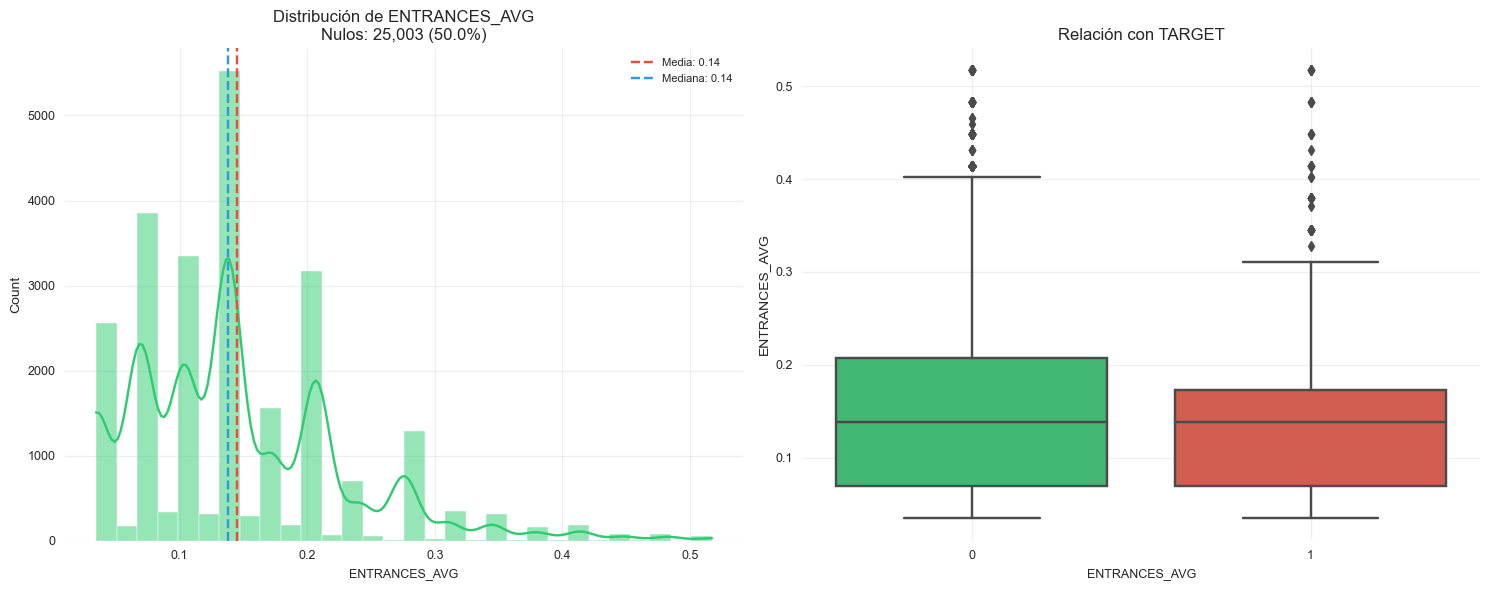

Gráfico de 'ENTRANCES_AVG' guardado exitosamente en '..\images\02_notebook_images'.


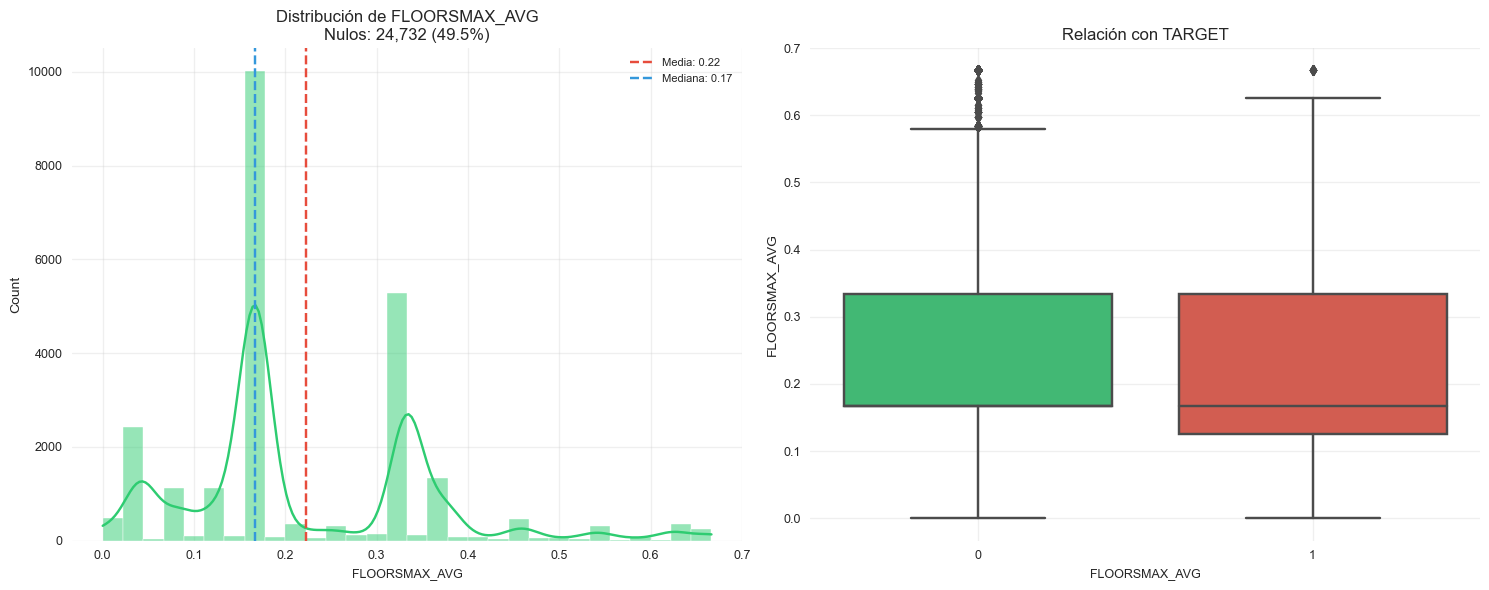

Gráfico de 'FLOORSMAX_AVG' guardado exitosamente en '..\images\02_notebook_images'.


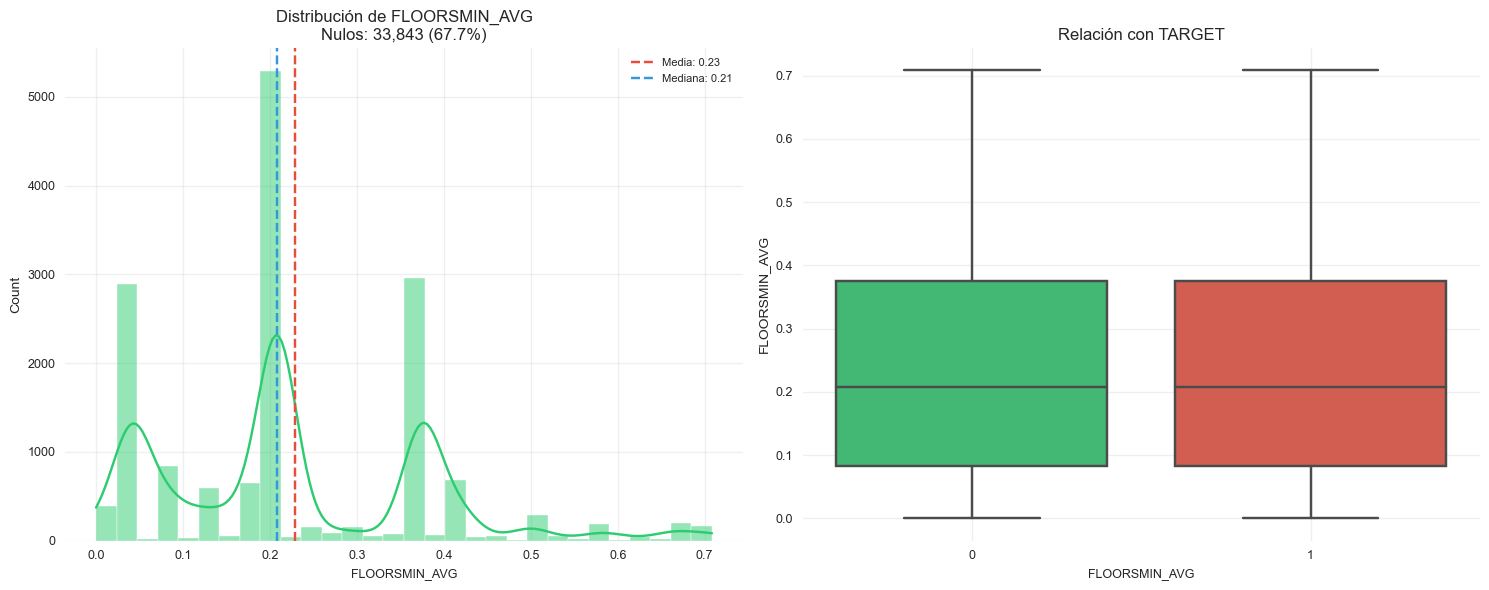

Gráfico de 'FLOORSMIN_AVG' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 9 de 21


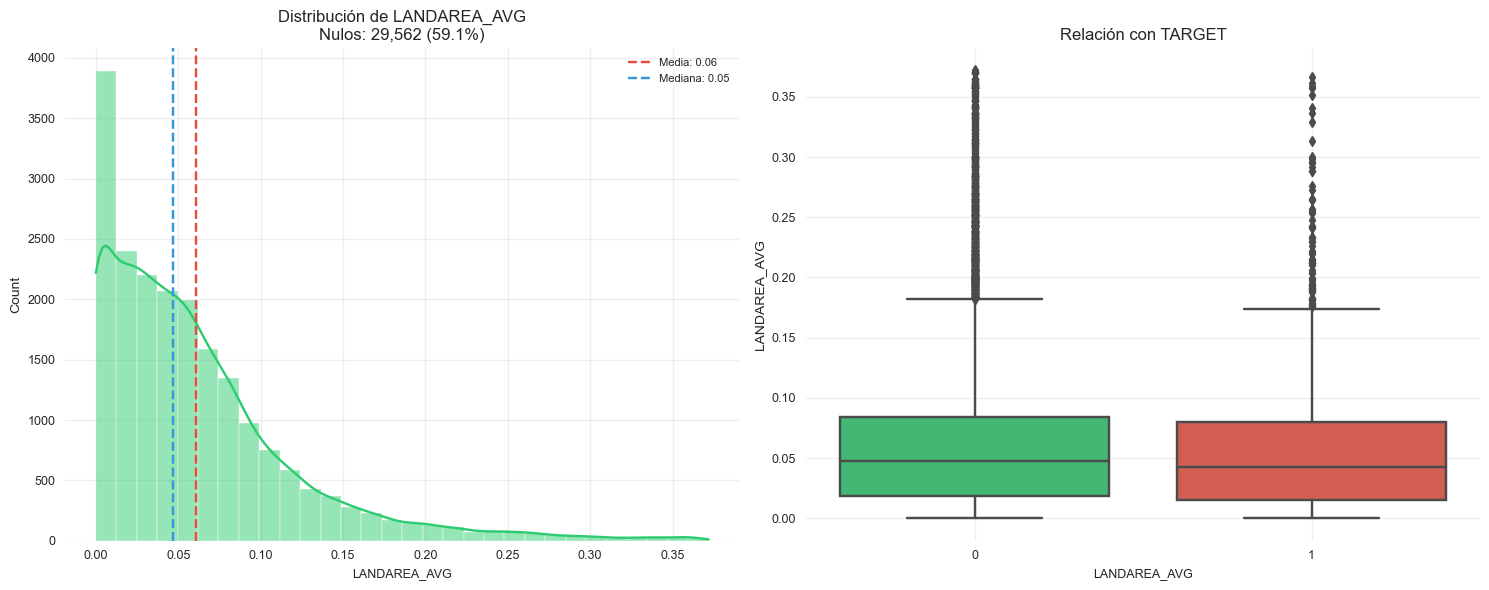

Gráfico de 'LANDAREA_AVG' guardado exitosamente en '..\images\02_notebook_images'.


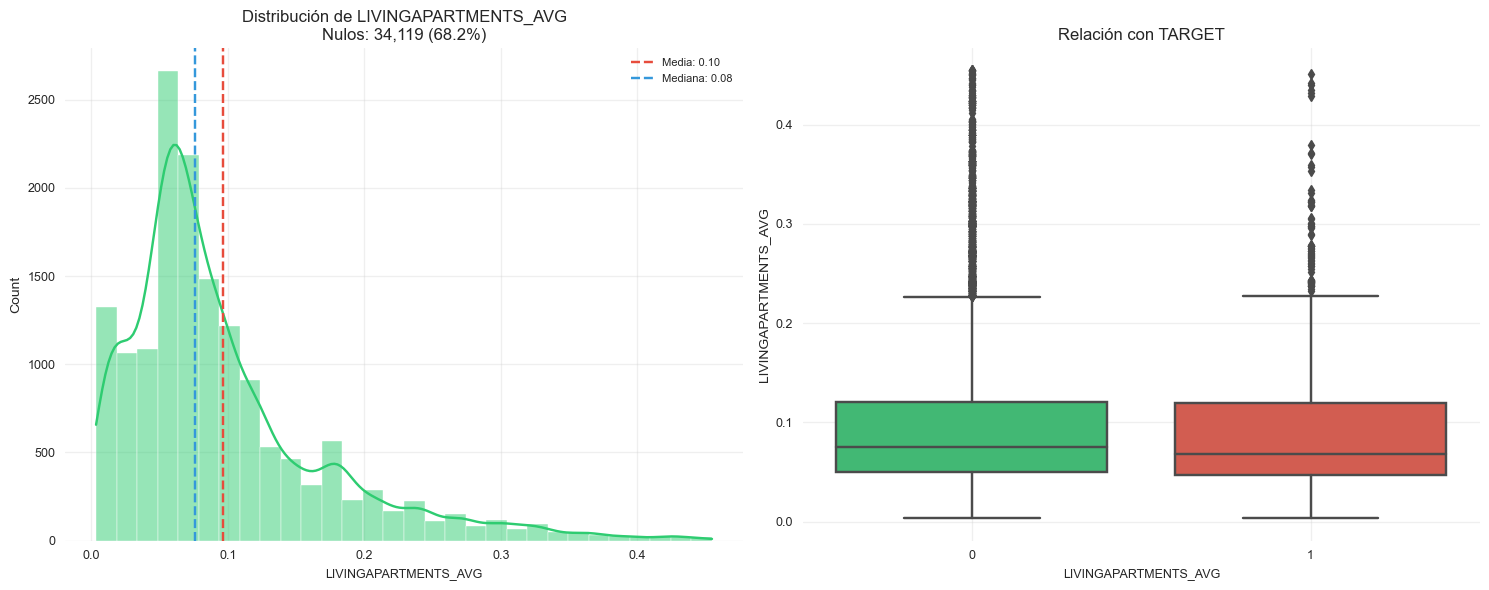

Gráfico de 'LIVINGAPARTMENTS_AVG' guardado exitosamente en '..\images\02_notebook_images'.


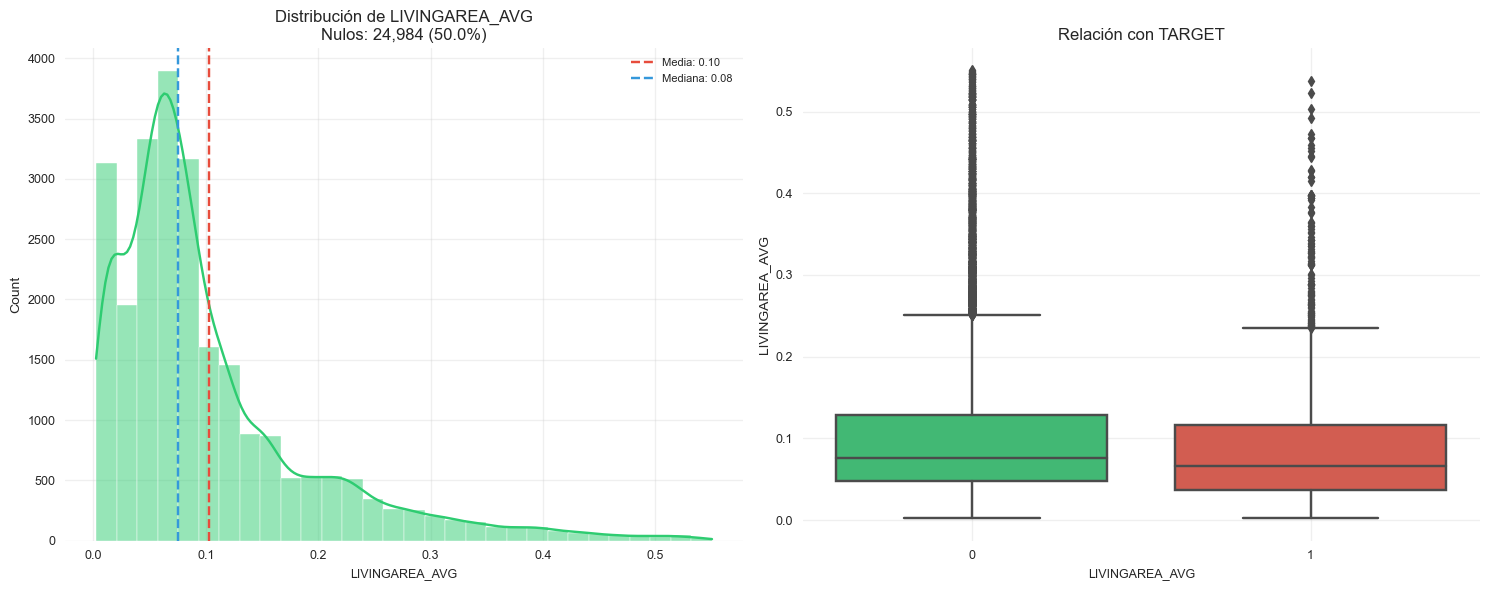

Gráfico de 'LIVINGAREA_AVG' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 10 de 21


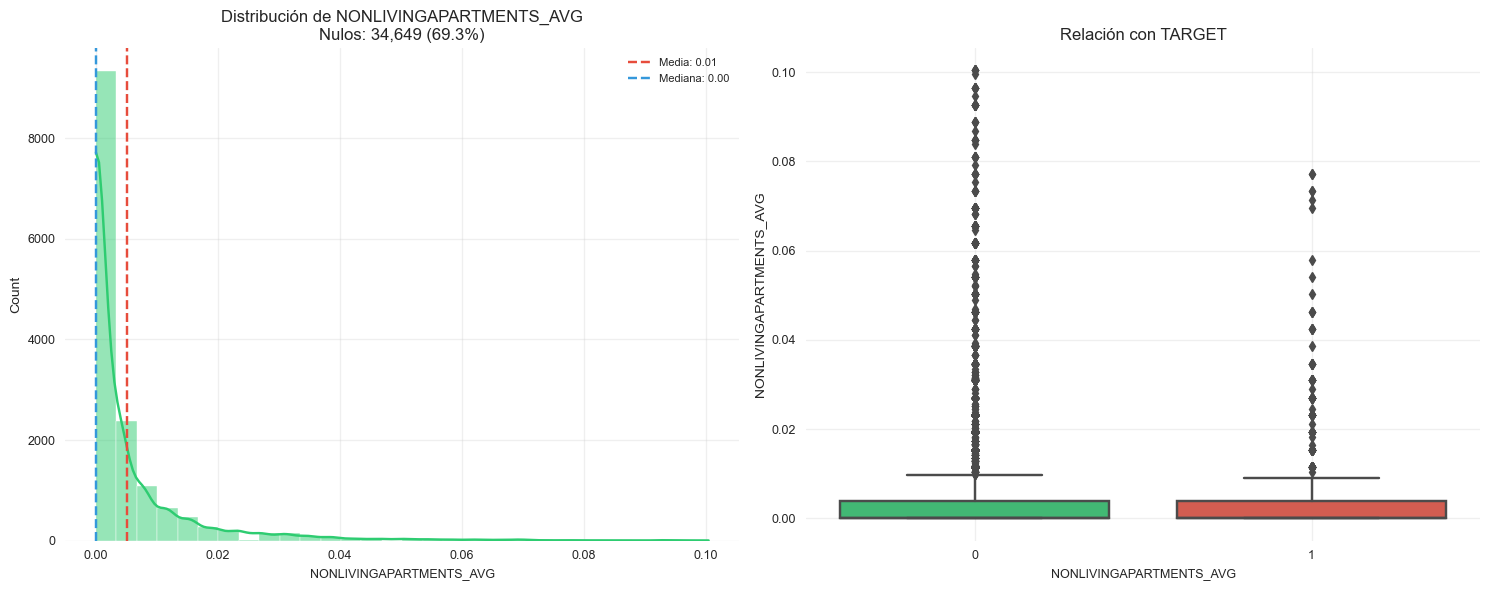

Gráfico de 'NONLIVINGAPARTMENTS_AVG' guardado exitosamente en '..\images\02_notebook_images'.


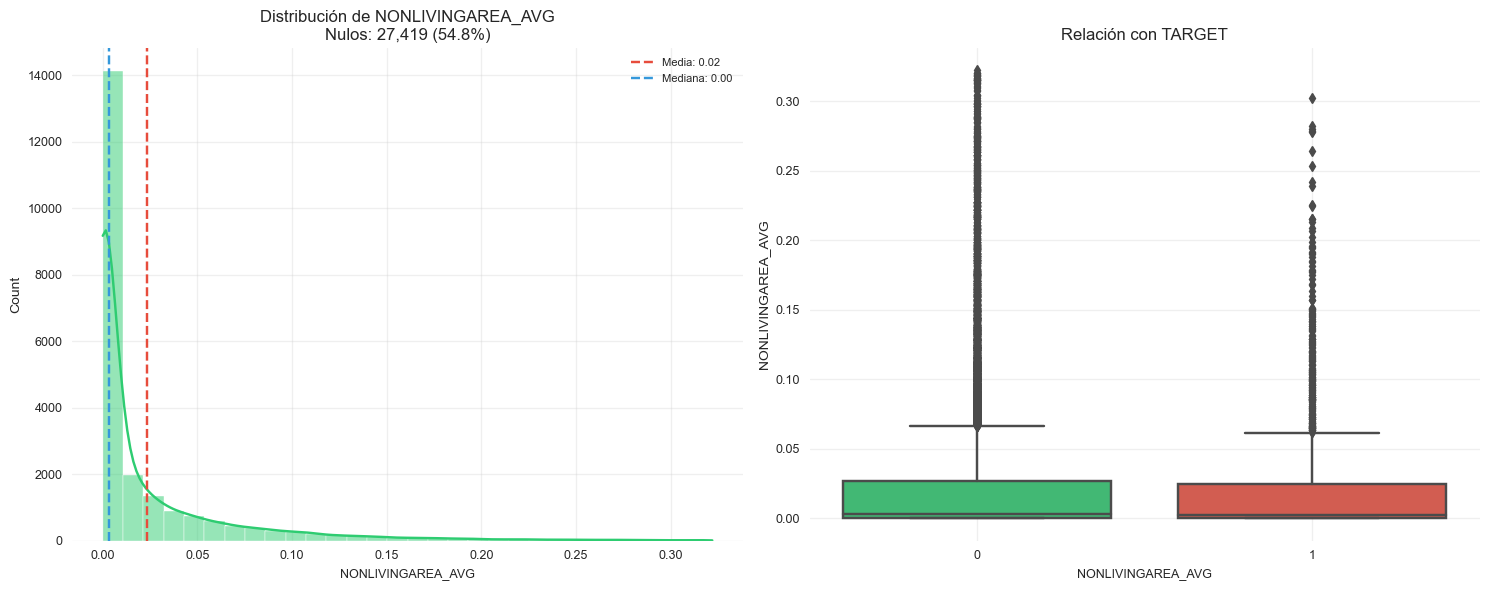

Gráfico de 'NONLIVINGAREA_AVG' guardado exitosamente en '..\images\02_notebook_images'.


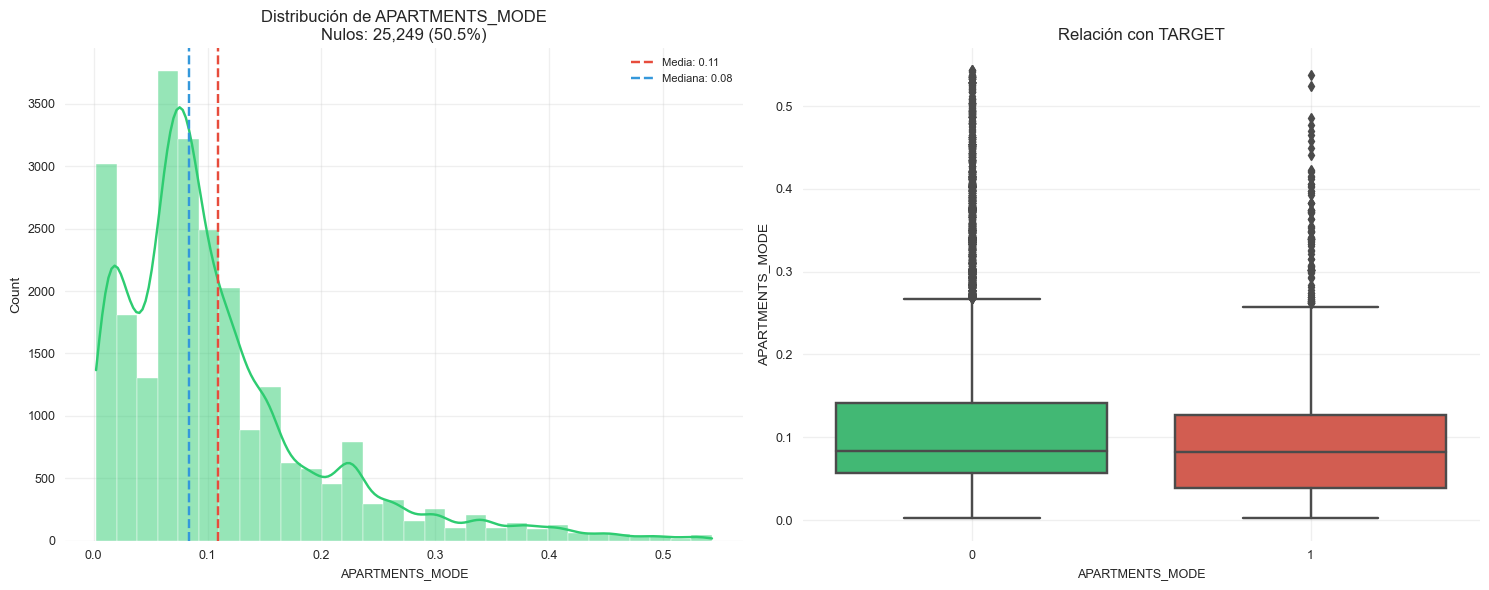

Gráfico de 'APARTMENTS_MODE' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 11 de 21


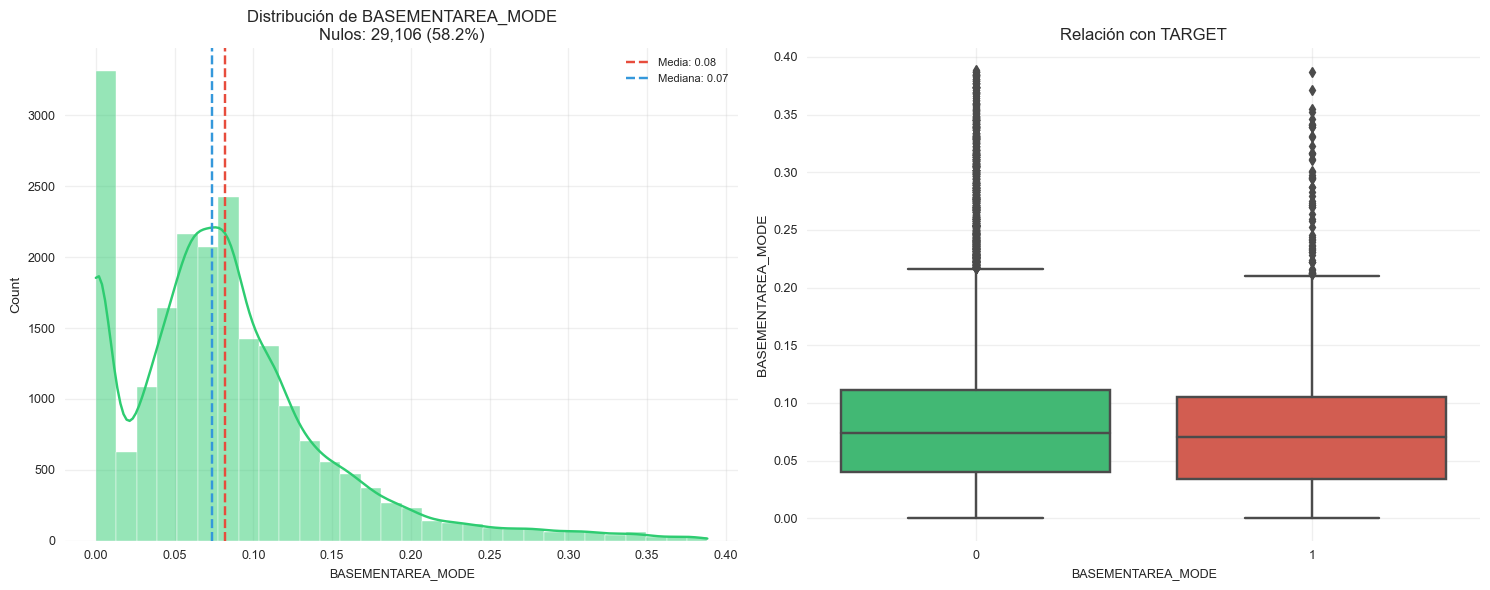

Gráfico de 'BASEMENTAREA_MODE' guardado exitosamente en '..\images\02_notebook_images'.


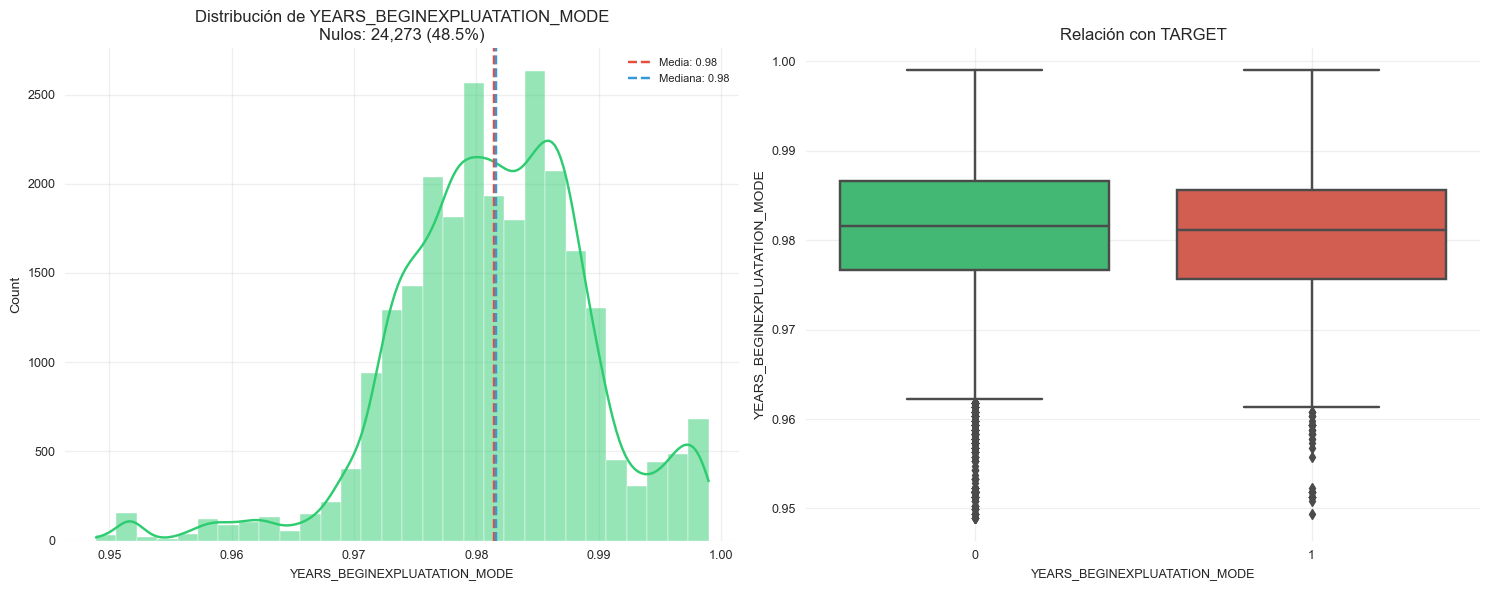

Gráfico de 'YEARS_BEGINEXPLUATATION_MODE' guardado exitosamente en '..\images\02_notebook_images'.


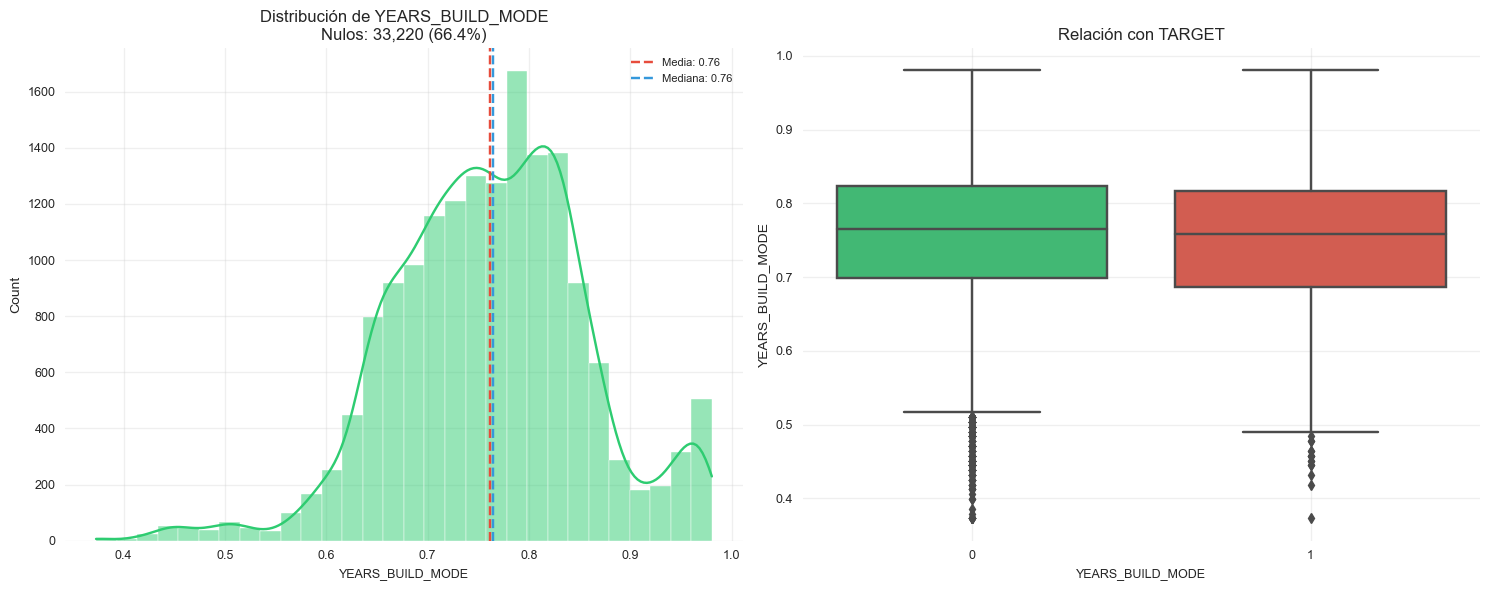

Gráfico de 'YEARS_BUILD_MODE' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 12 de 21


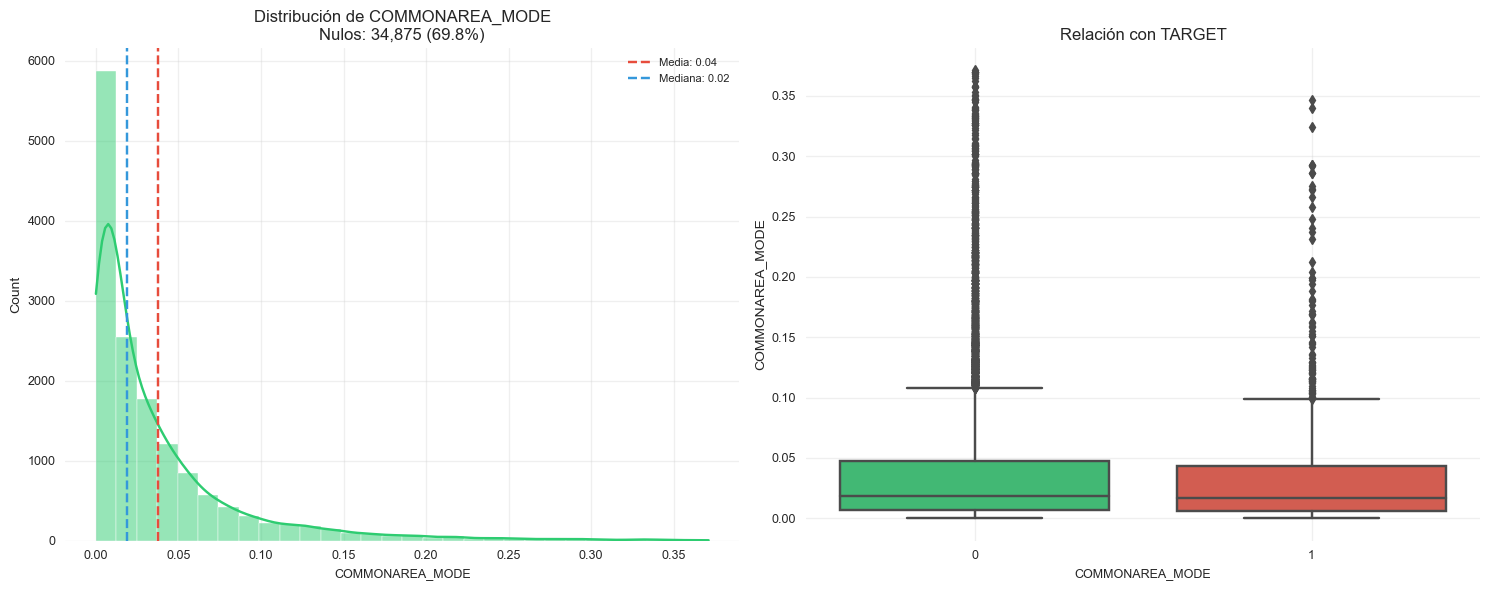

Gráfico de 'COMMONAREA_MODE' guardado exitosamente en '..\images\02_notebook_images'.


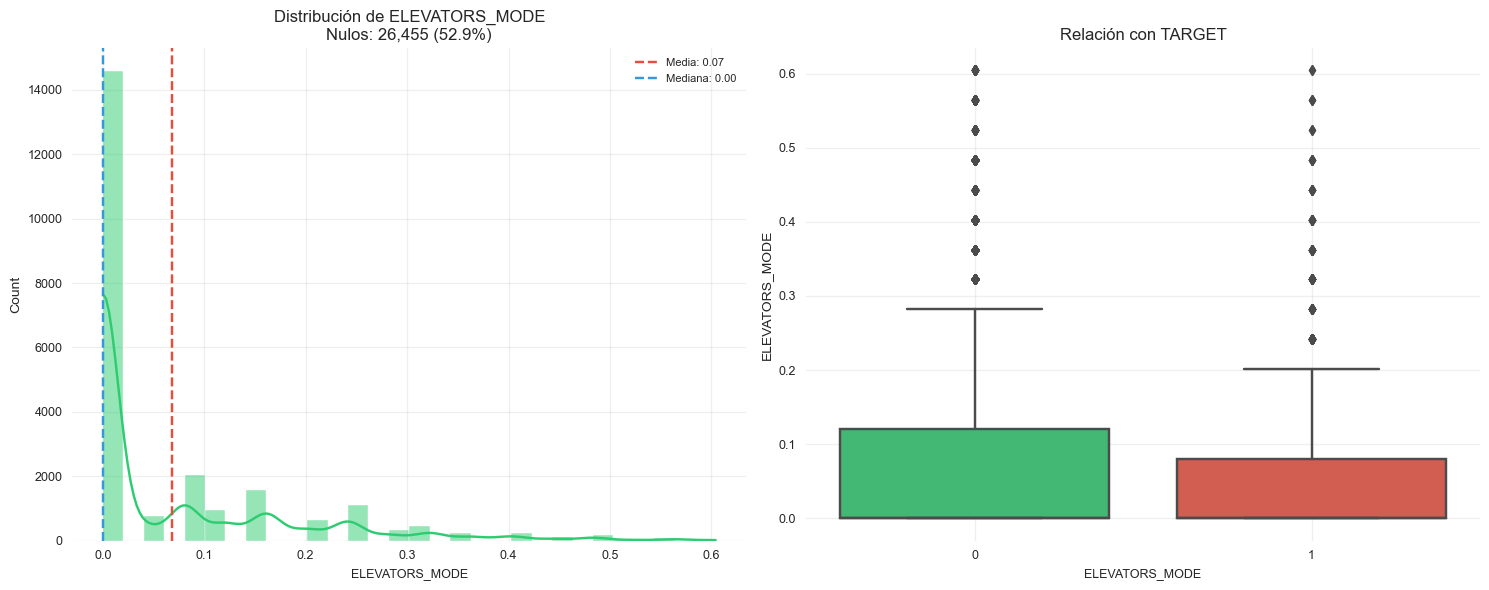

Gráfico de 'ELEVATORS_MODE' guardado exitosamente en '..\images\02_notebook_images'.


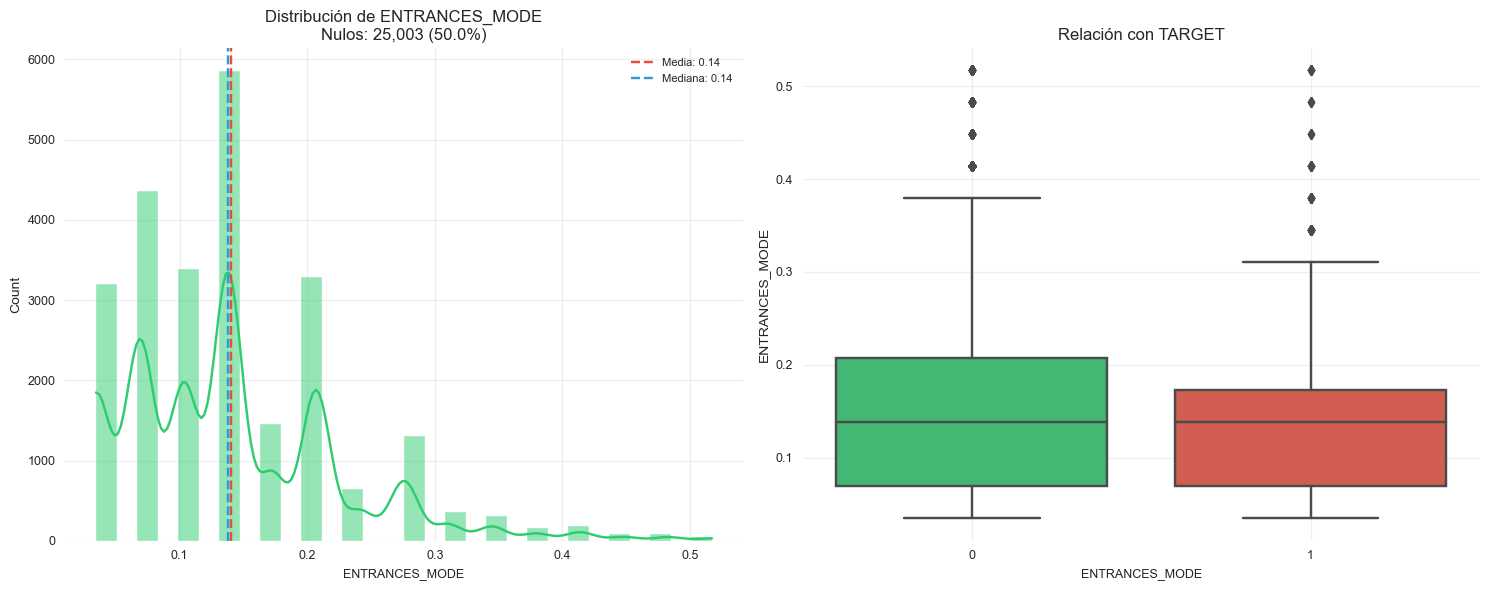

Gráfico de 'ENTRANCES_MODE' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 13 de 21


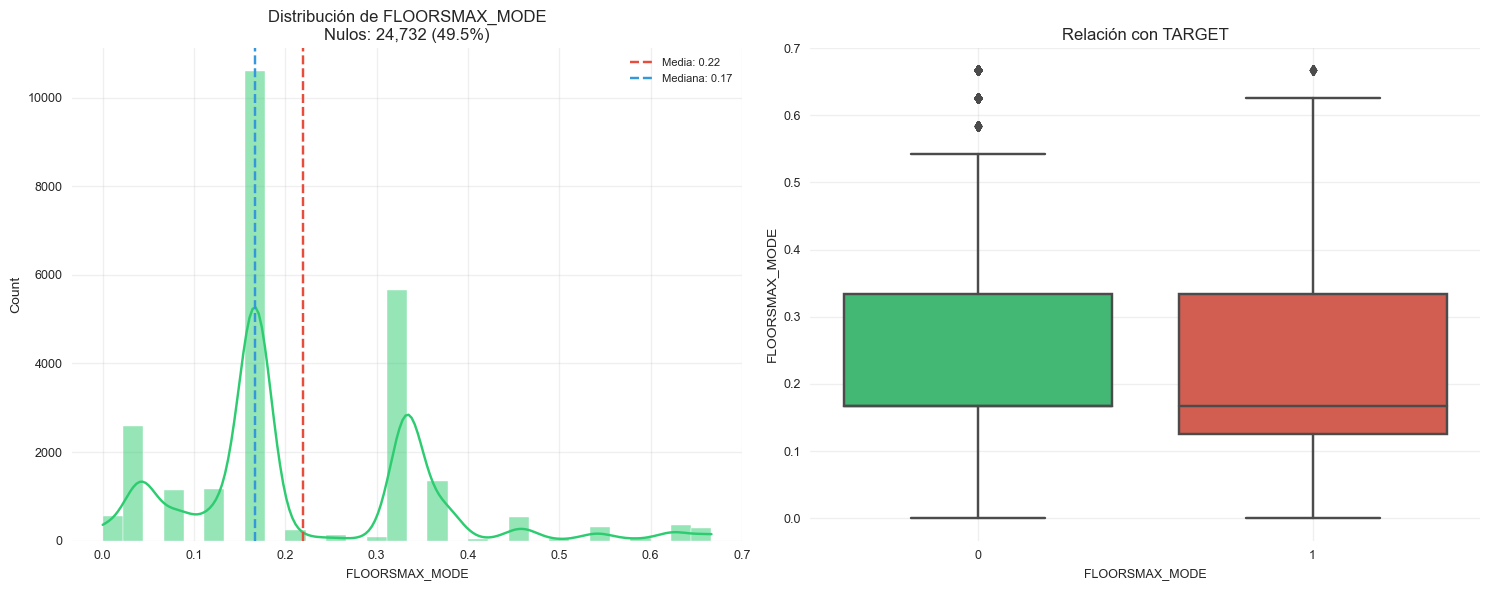

Gráfico de 'FLOORSMAX_MODE' guardado exitosamente en '..\images\02_notebook_images'.


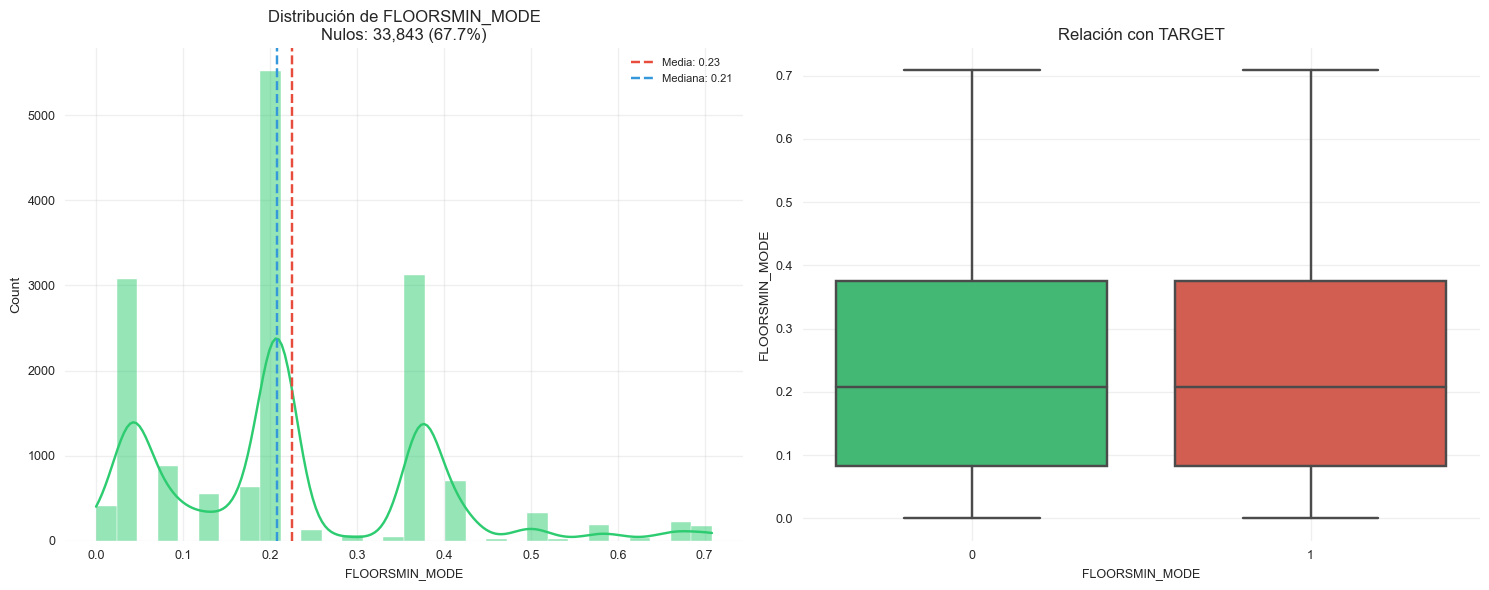

Gráfico de 'FLOORSMIN_MODE' guardado exitosamente en '..\images\02_notebook_images'.


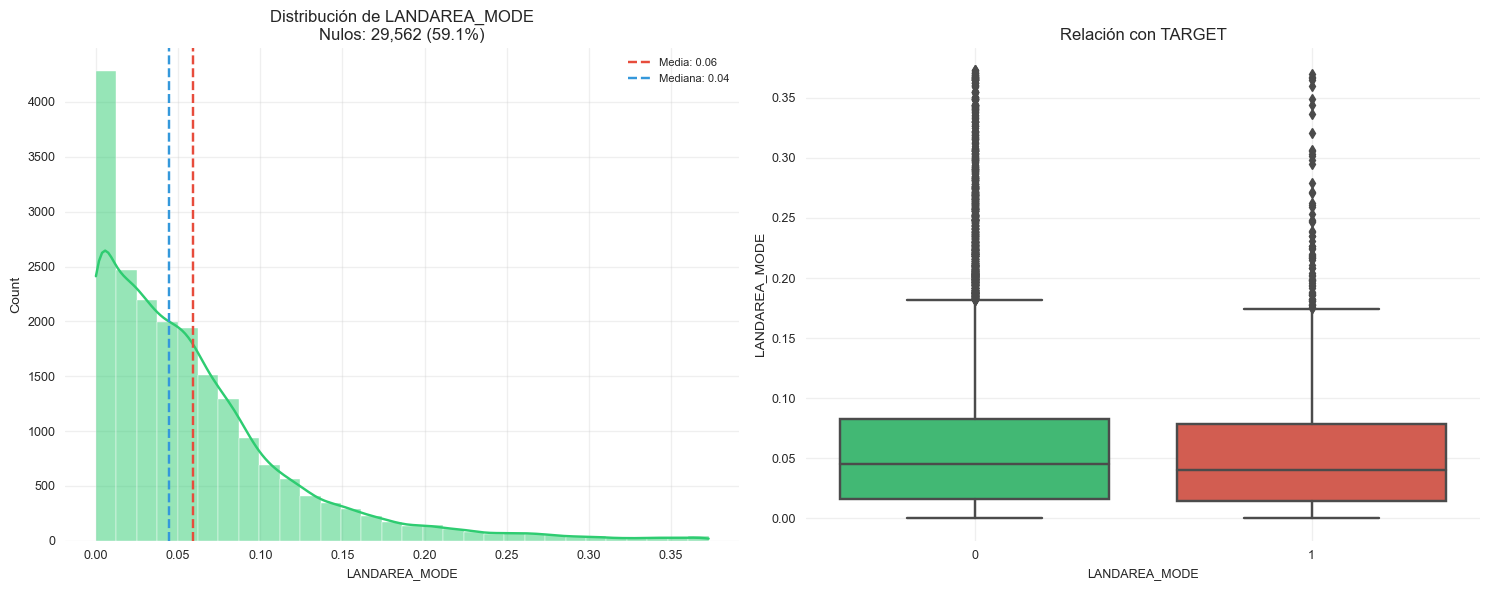

Gráfico de 'LANDAREA_MODE' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 14 de 21


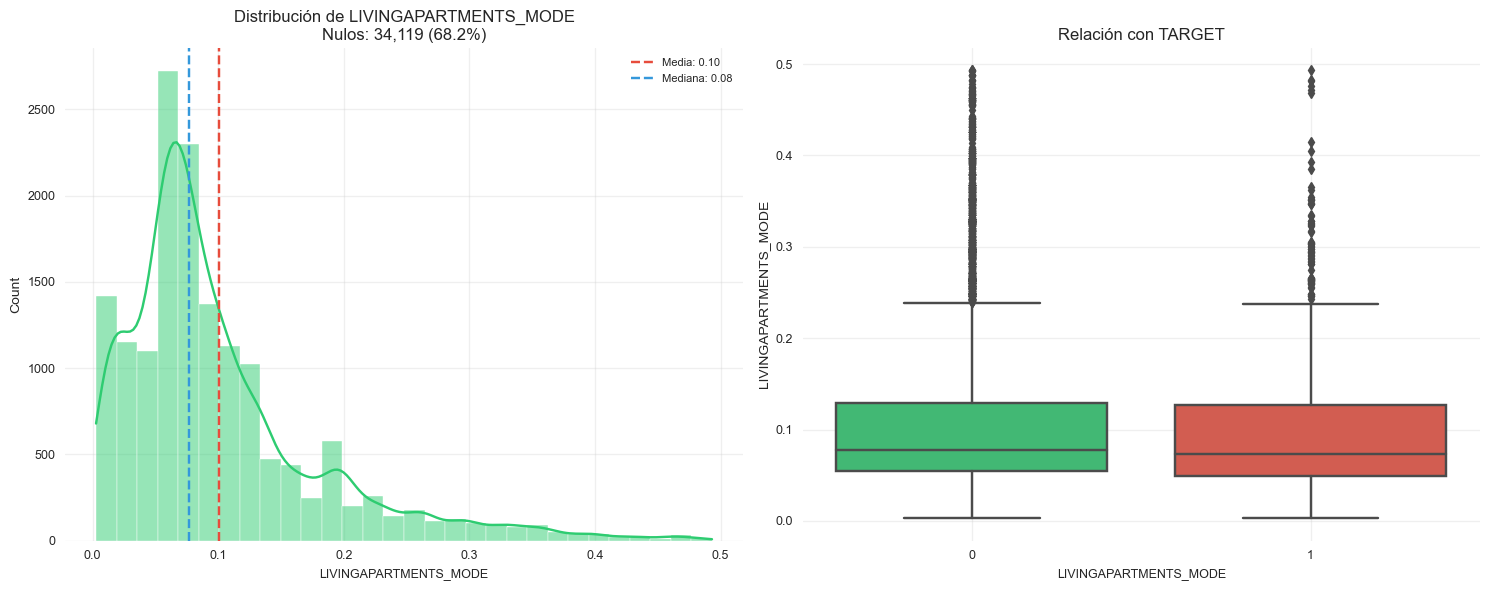

Gráfico de 'LIVINGAPARTMENTS_MODE' guardado exitosamente en '..\images\02_notebook_images'.


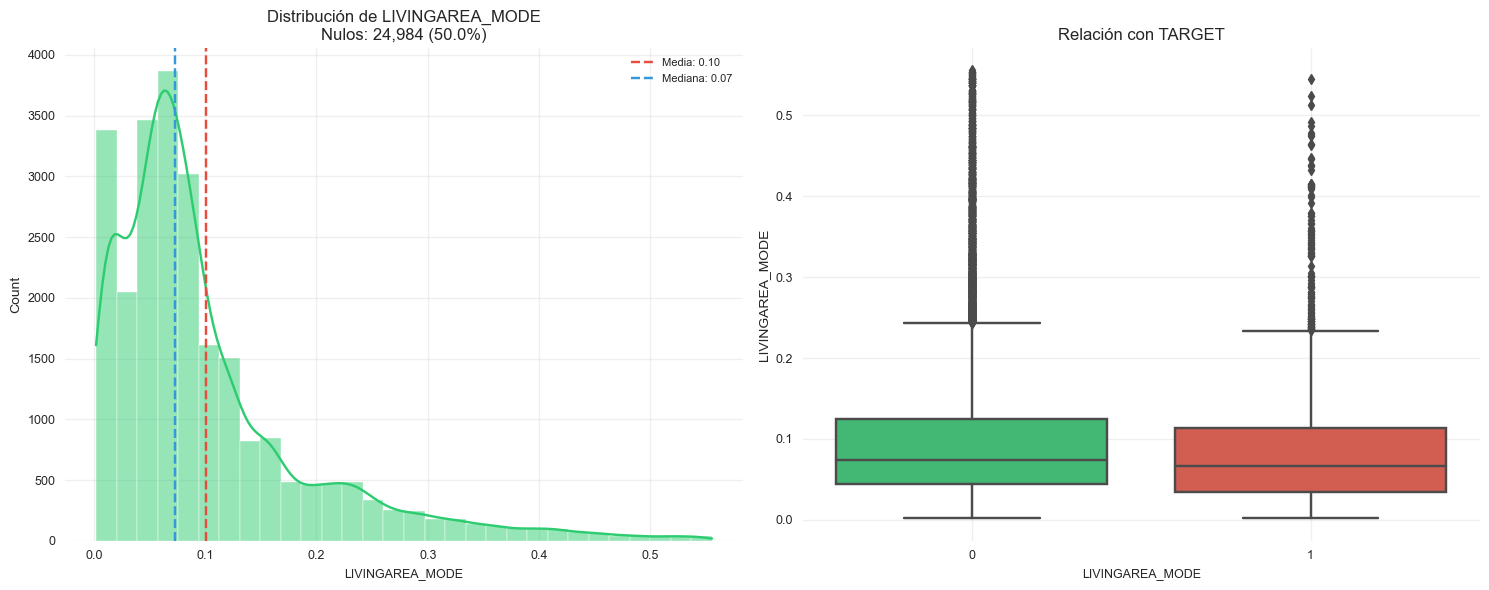

Gráfico de 'LIVINGAREA_MODE' guardado exitosamente en '..\images\02_notebook_images'.


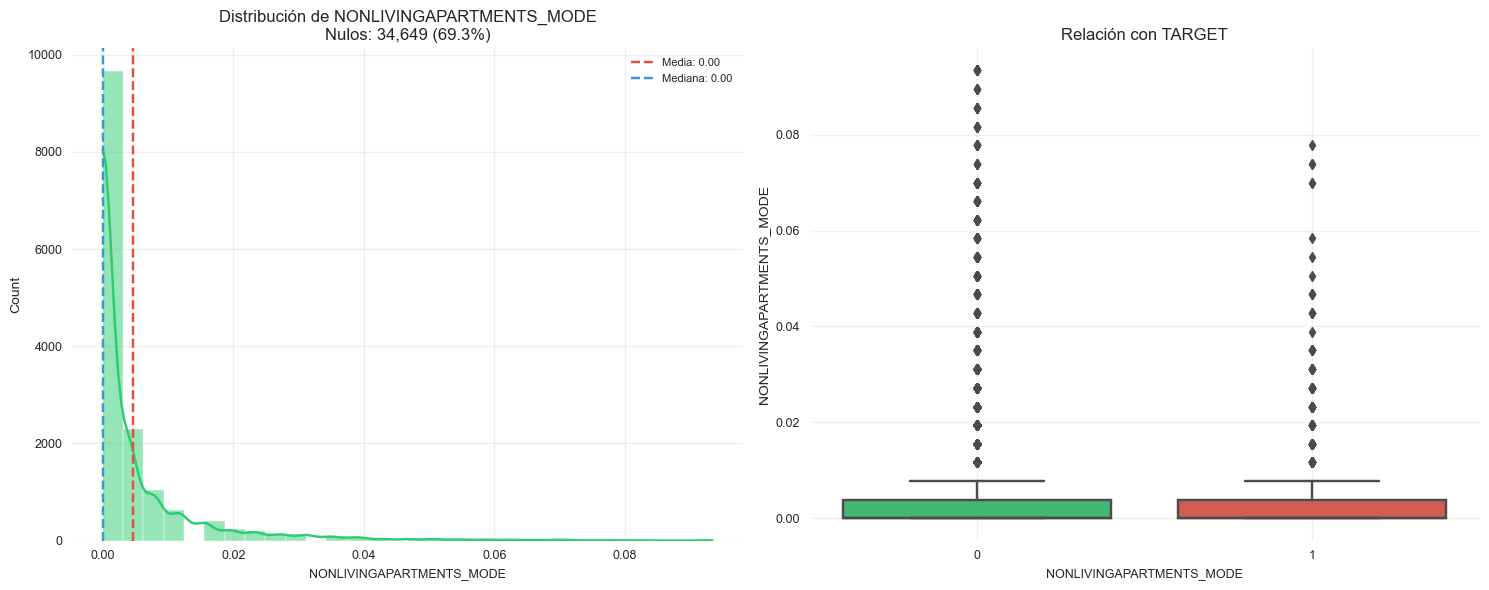

Gráfico de 'NONLIVINGAPARTMENTS_MODE' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 15 de 21


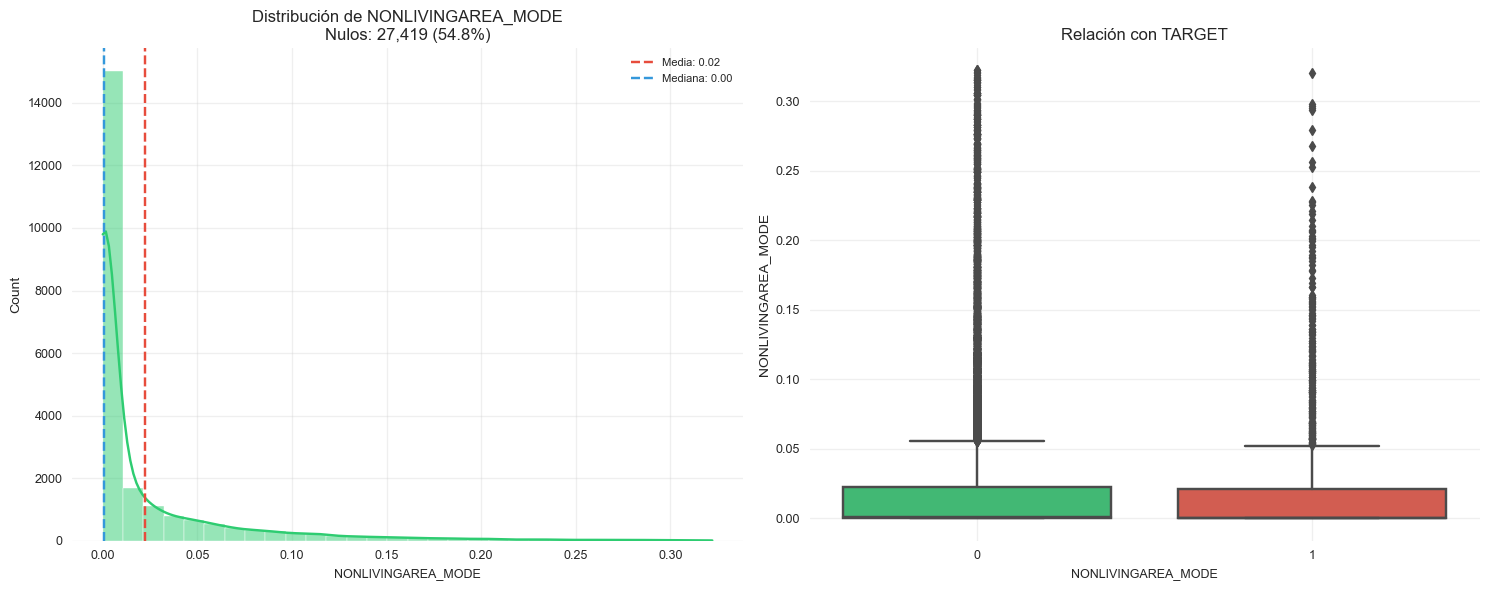

Gráfico de 'NONLIVINGAREA_MODE' guardado exitosamente en '..\images\02_notebook_images'.


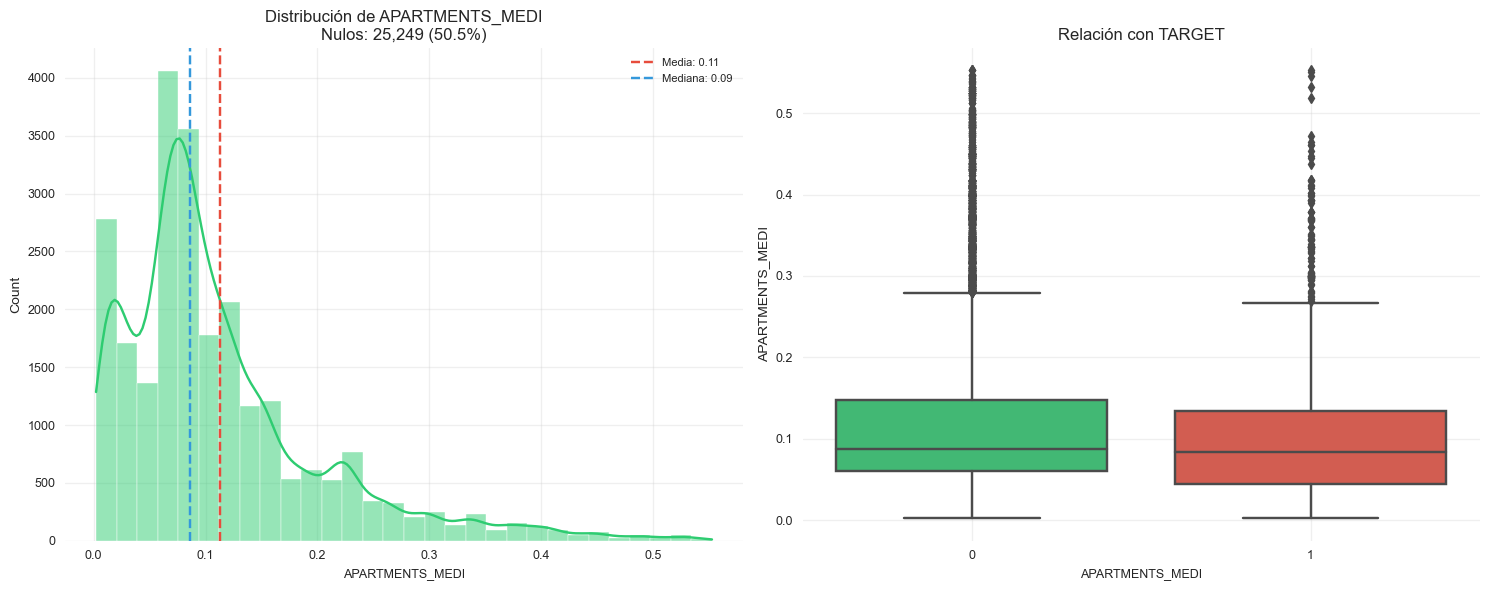

Gráfico de 'APARTMENTS_MEDI' guardado exitosamente en '..\images\02_notebook_images'.


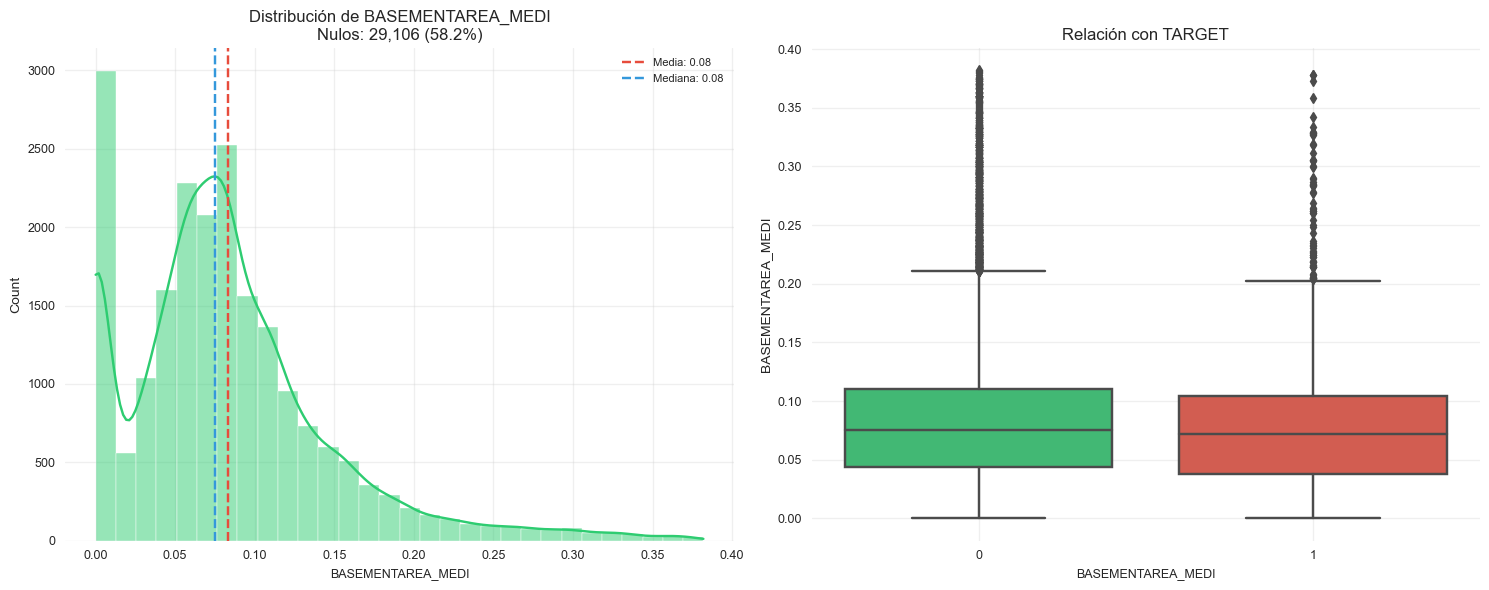

Gráfico de 'BASEMENTAREA_MEDI' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 16 de 21


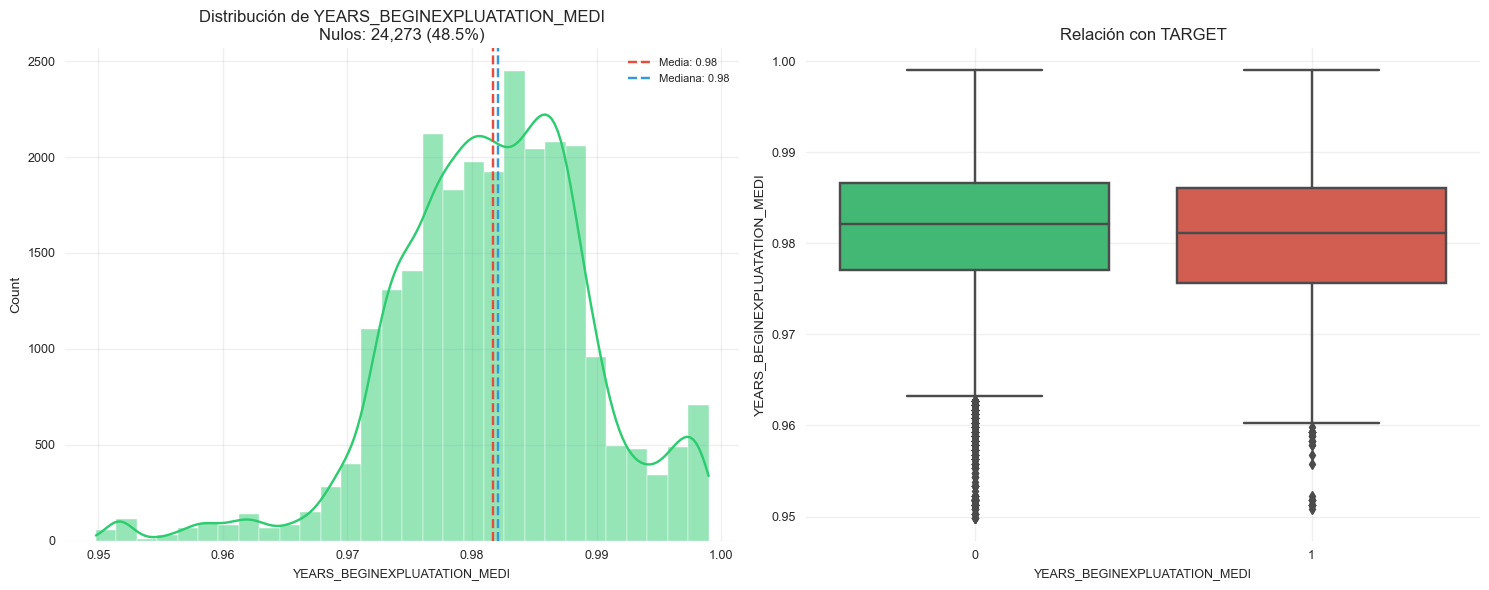

Gráfico de 'YEARS_BEGINEXPLUATATION_MEDI' guardado exitosamente en '..\images\02_notebook_images'.


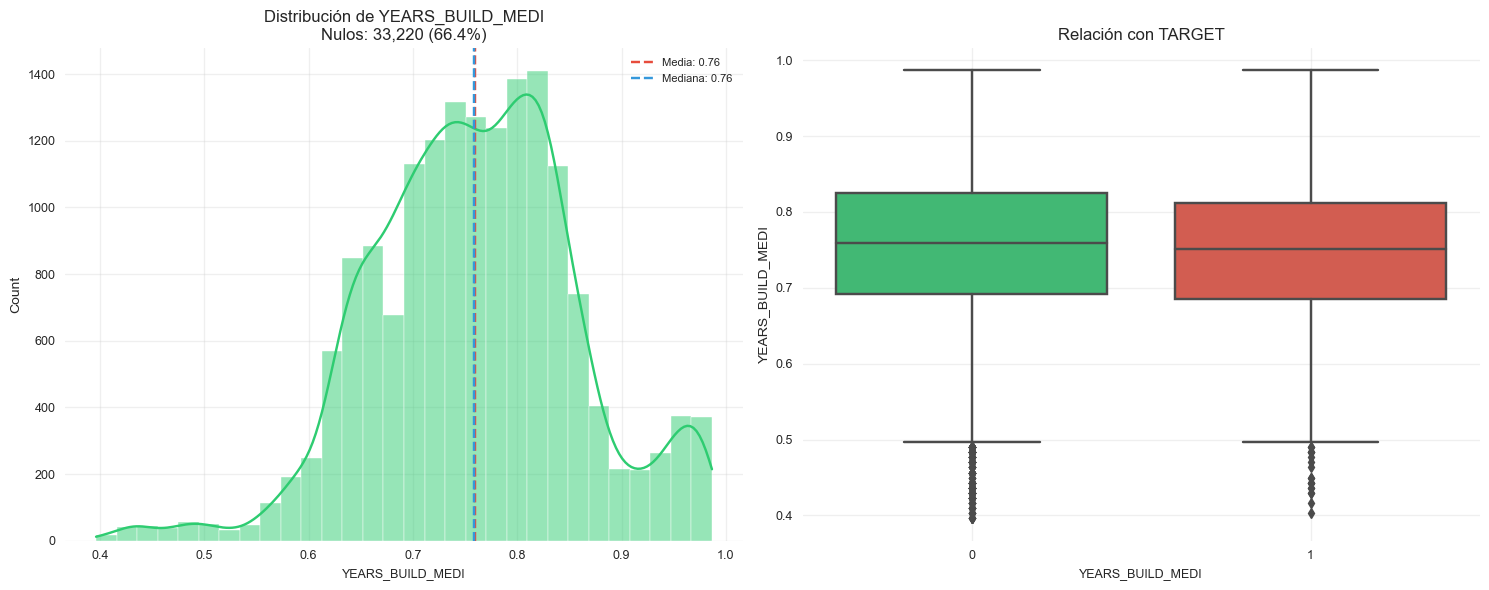

Gráfico de 'YEARS_BUILD_MEDI' guardado exitosamente en '..\images\02_notebook_images'.


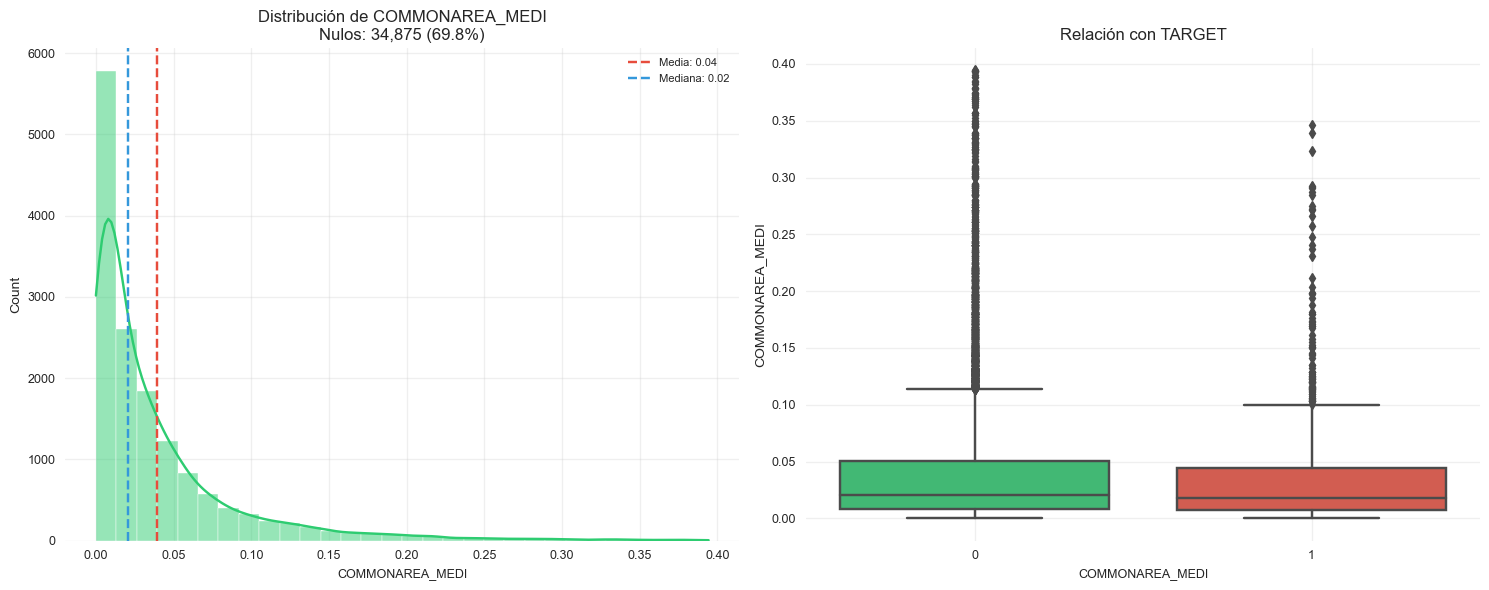

Gráfico de 'COMMONAREA_MEDI' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 17 de 21


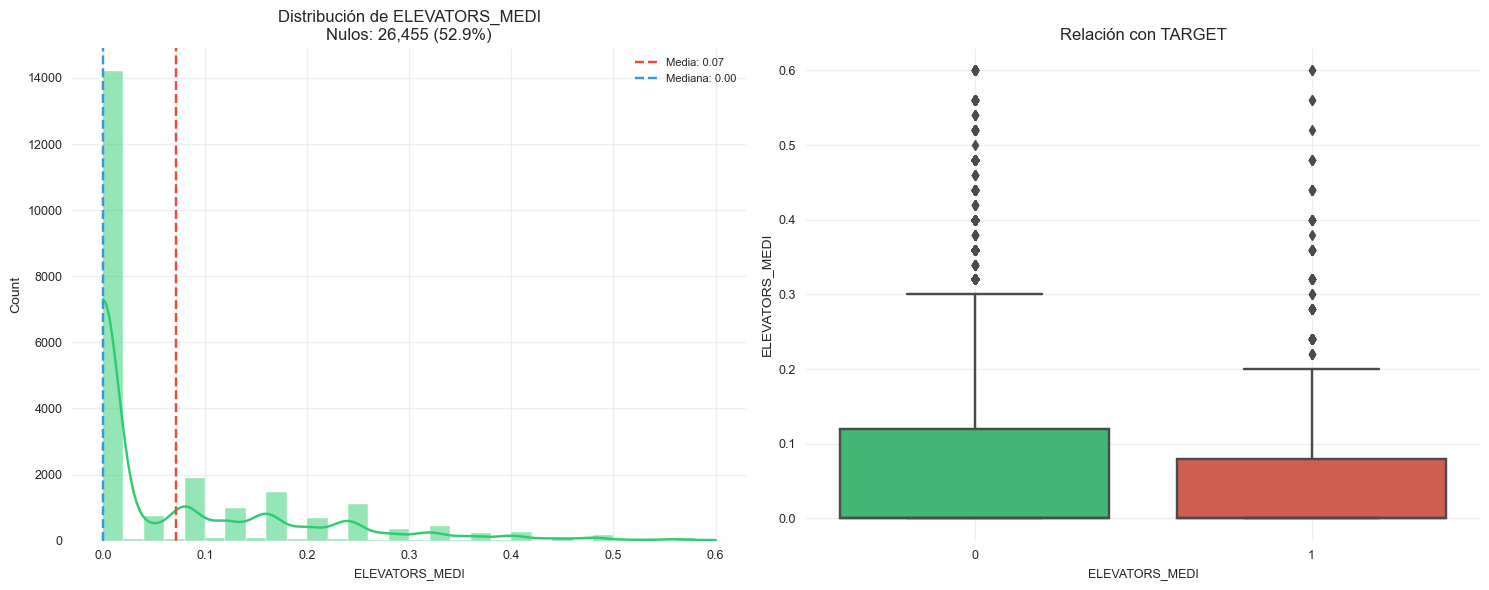

Gráfico de 'ELEVATORS_MEDI' guardado exitosamente en '..\images\02_notebook_images'.


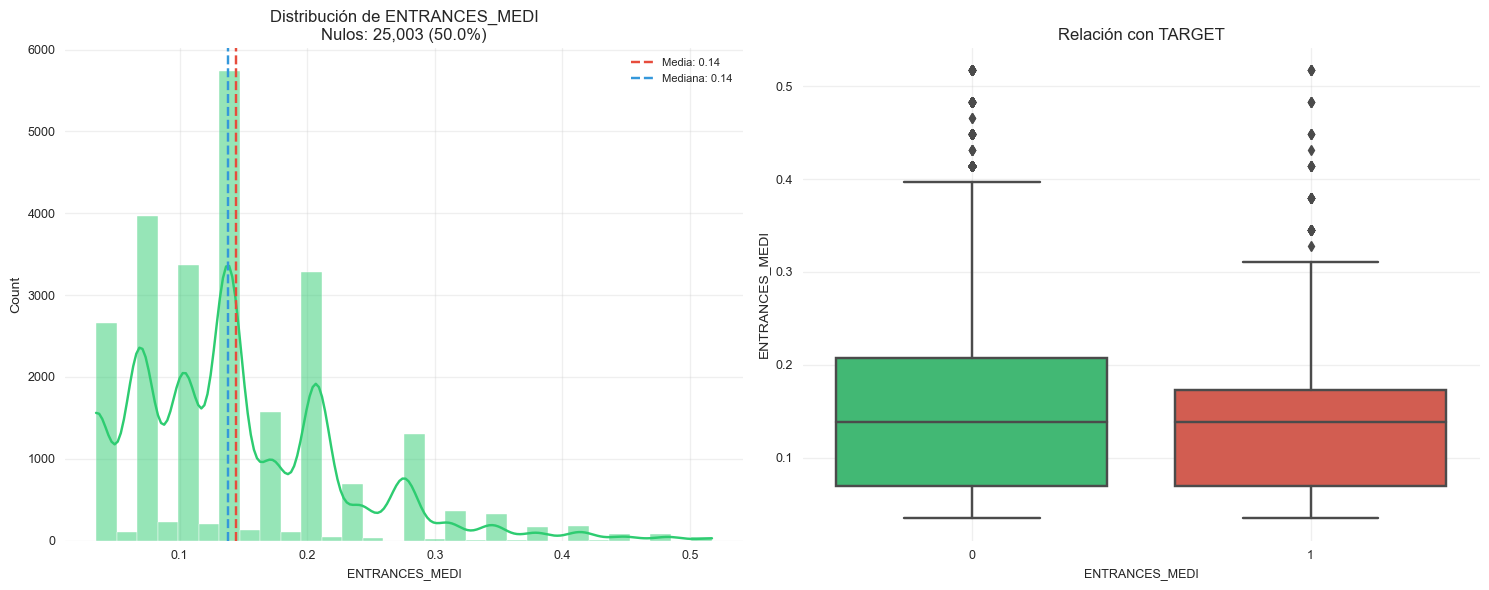

Gráfico de 'ENTRANCES_MEDI' guardado exitosamente en '..\images\02_notebook_images'.


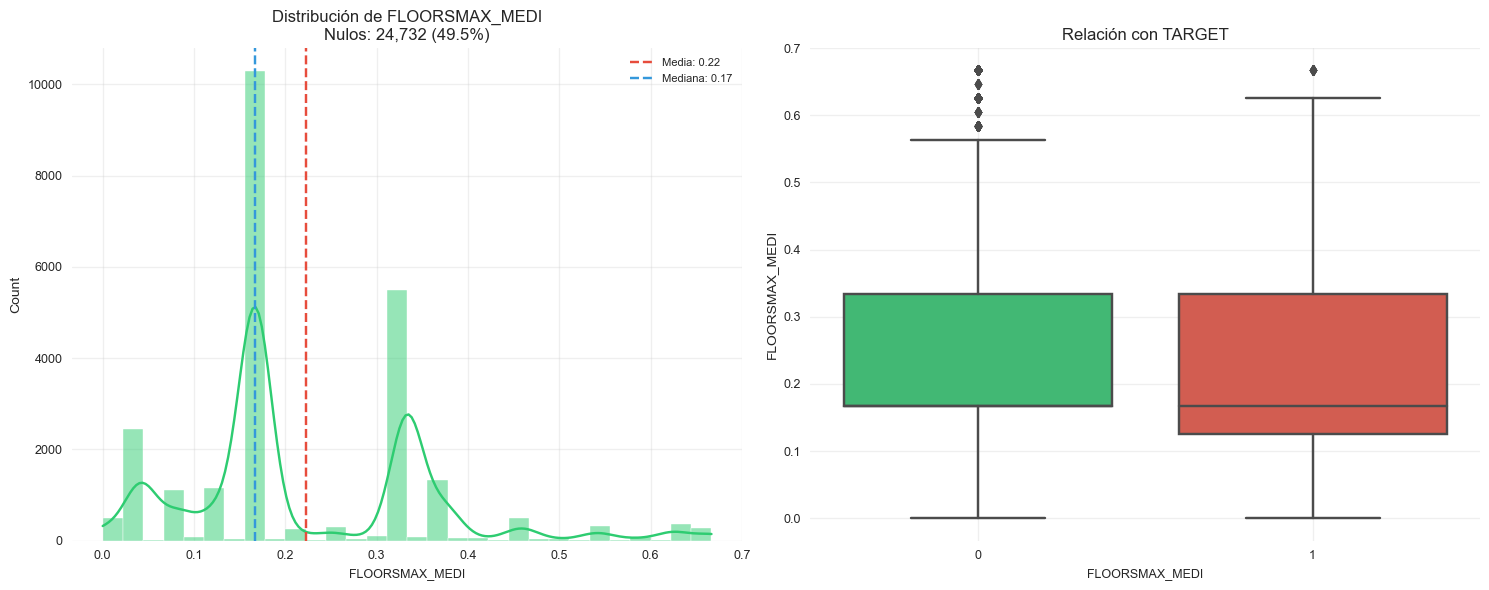

Gráfico de 'FLOORSMAX_MEDI' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 18 de 21


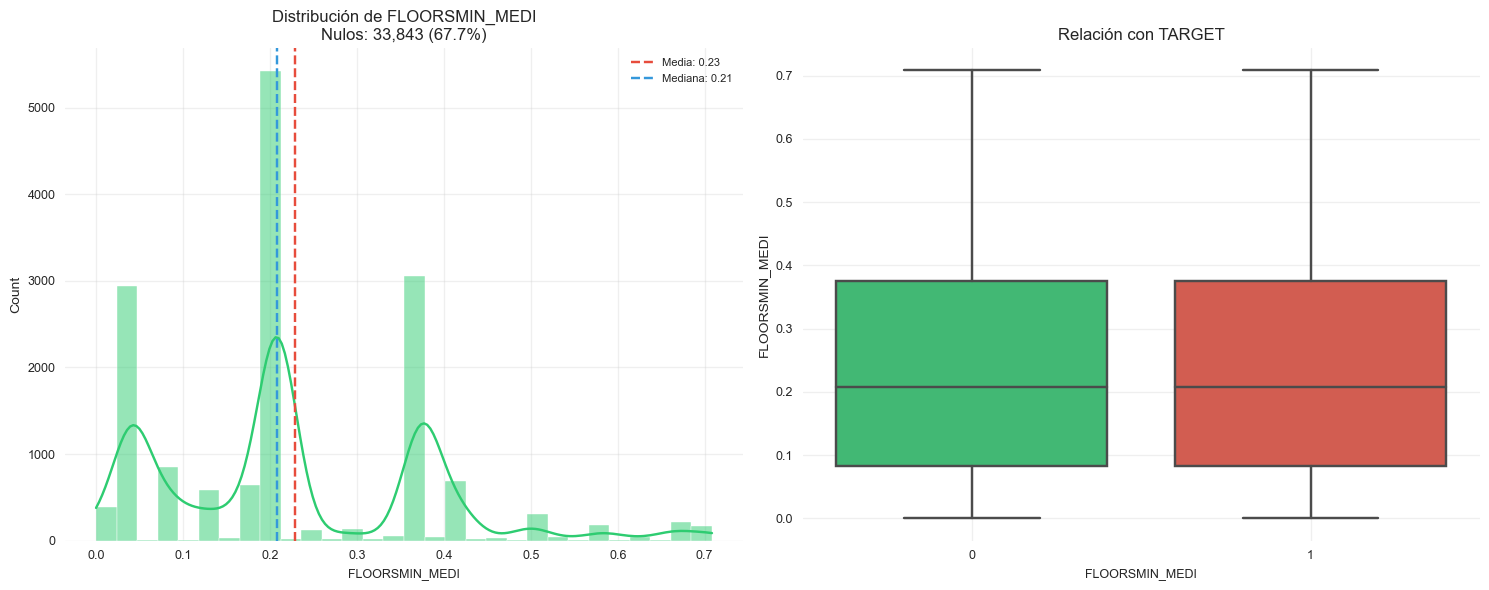

Gráfico de 'FLOORSMIN_MEDI' guardado exitosamente en '..\images\02_notebook_images'.


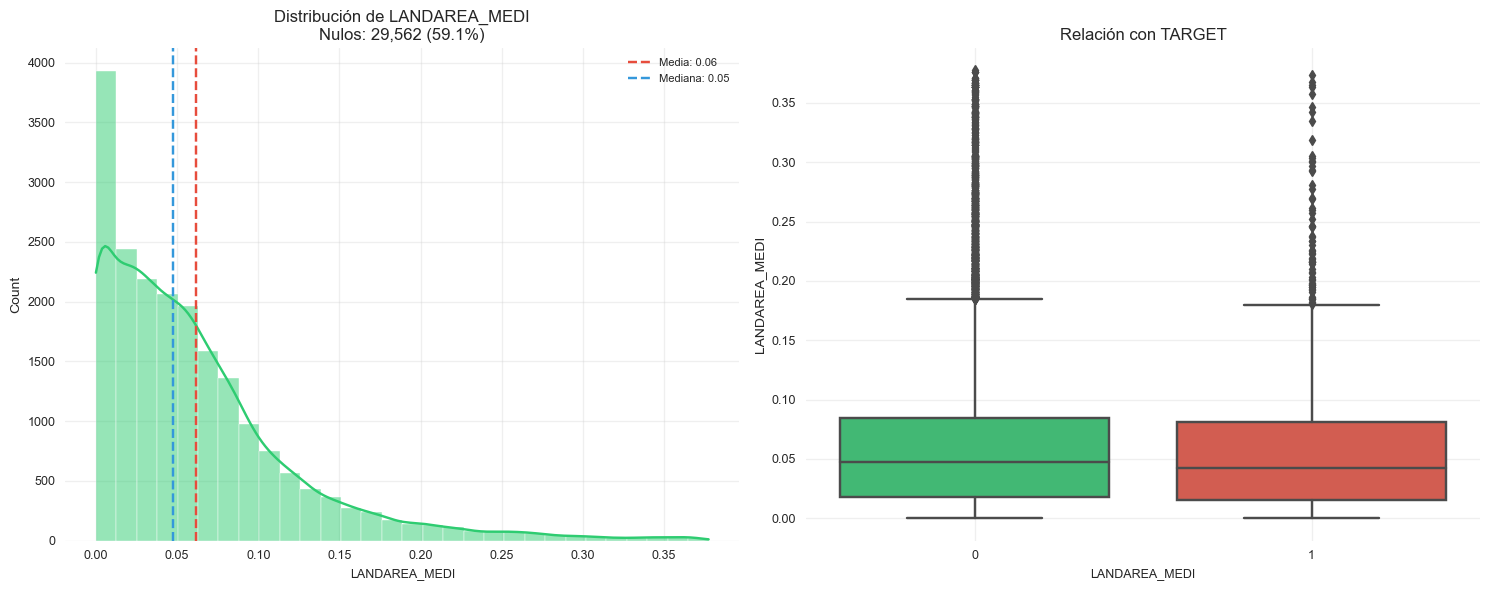

Gráfico de 'LANDAREA_MEDI' guardado exitosamente en '..\images\02_notebook_images'.


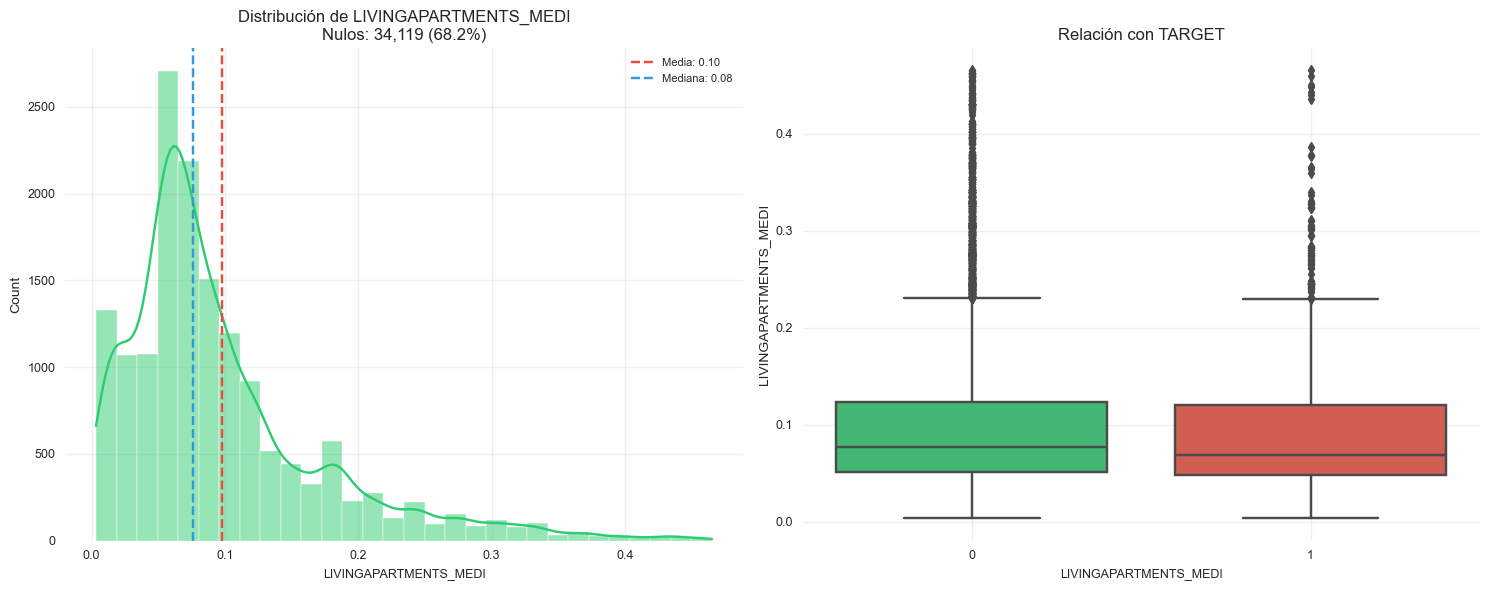

Gráfico de 'LIVINGAPARTMENTS_MEDI' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 19 de 21


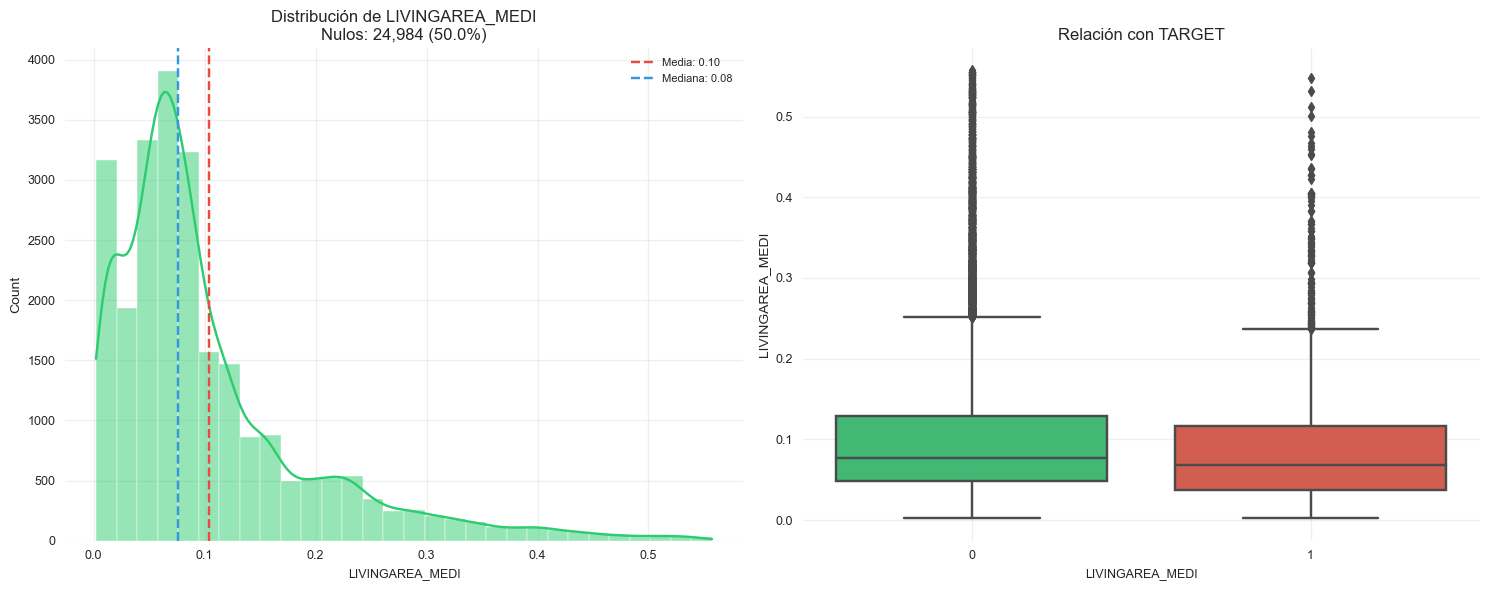

Gráfico de 'LIVINGAREA_MEDI' guardado exitosamente en '..\images\02_notebook_images'.


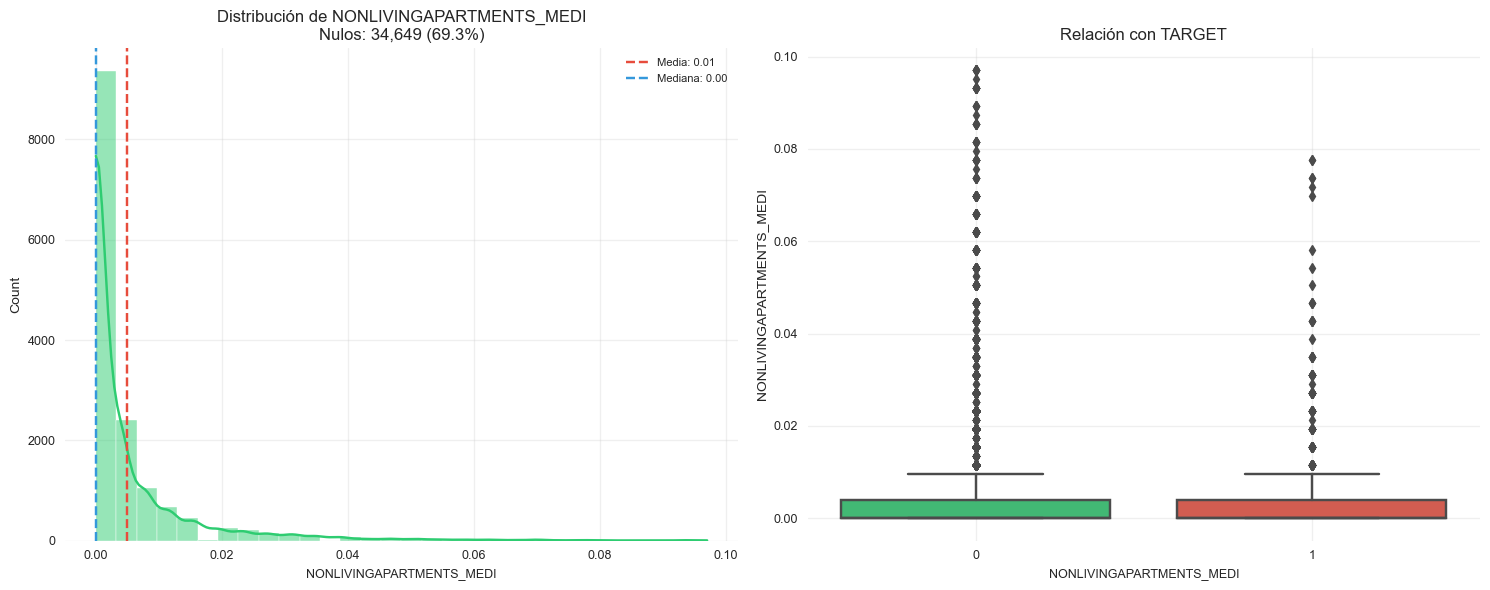

Gráfico de 'NONLIVINGAPARTMENTS_MEDI' guardado exitosamente en '..\images\02_notebook_images'.


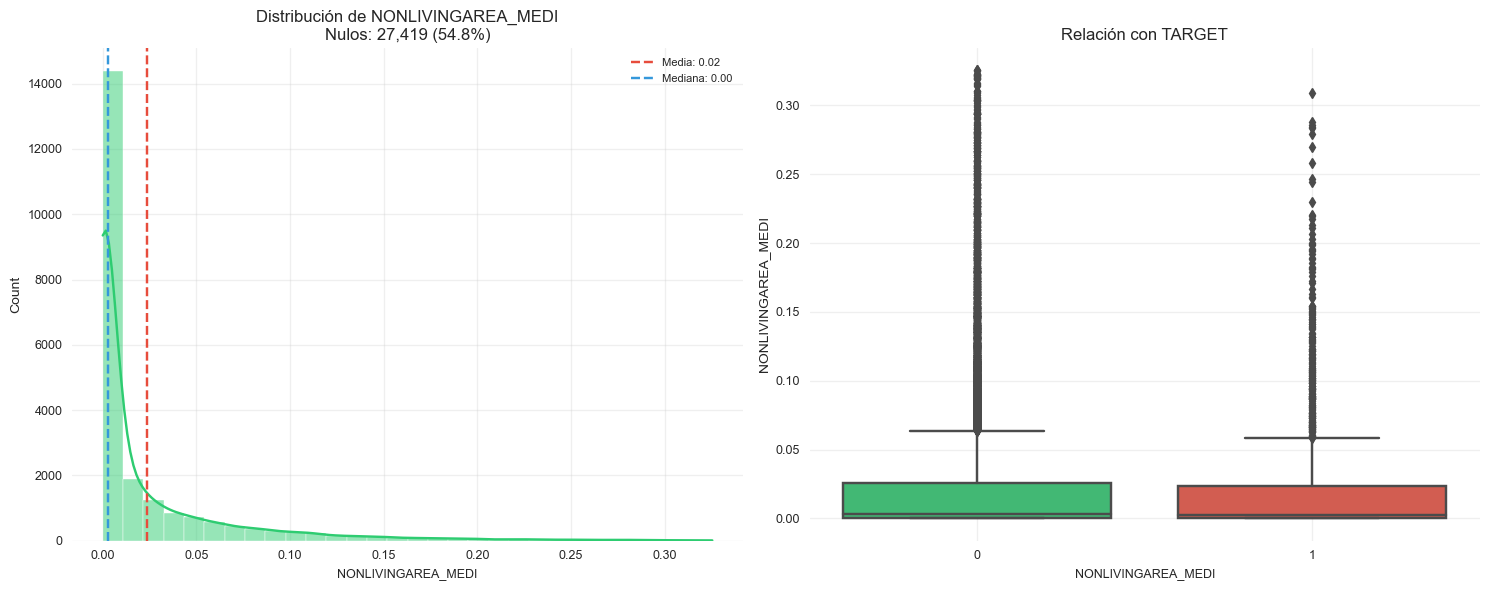

Gráfico de 'NONLIVINGAREA_MEDI' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 20 de 21


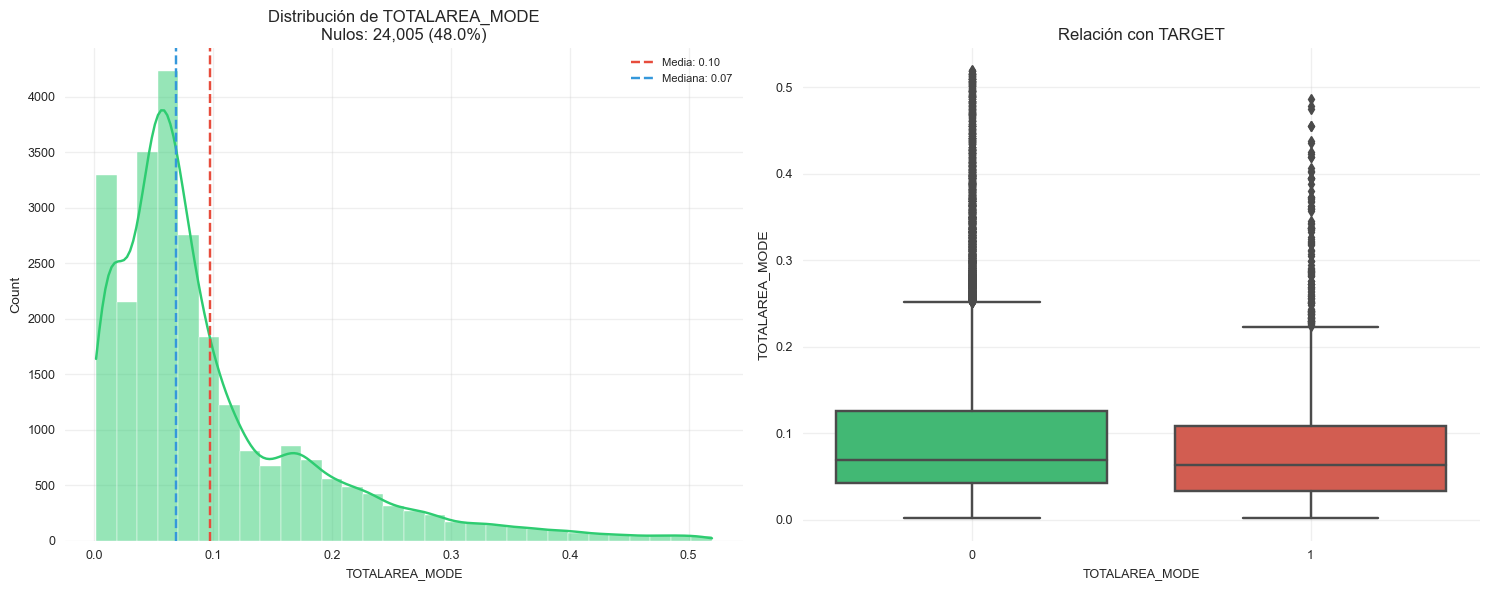

Gráfico de 'TOTALAREA_MODE' guardado exitosamente en '..\images\02_notebook_images'.


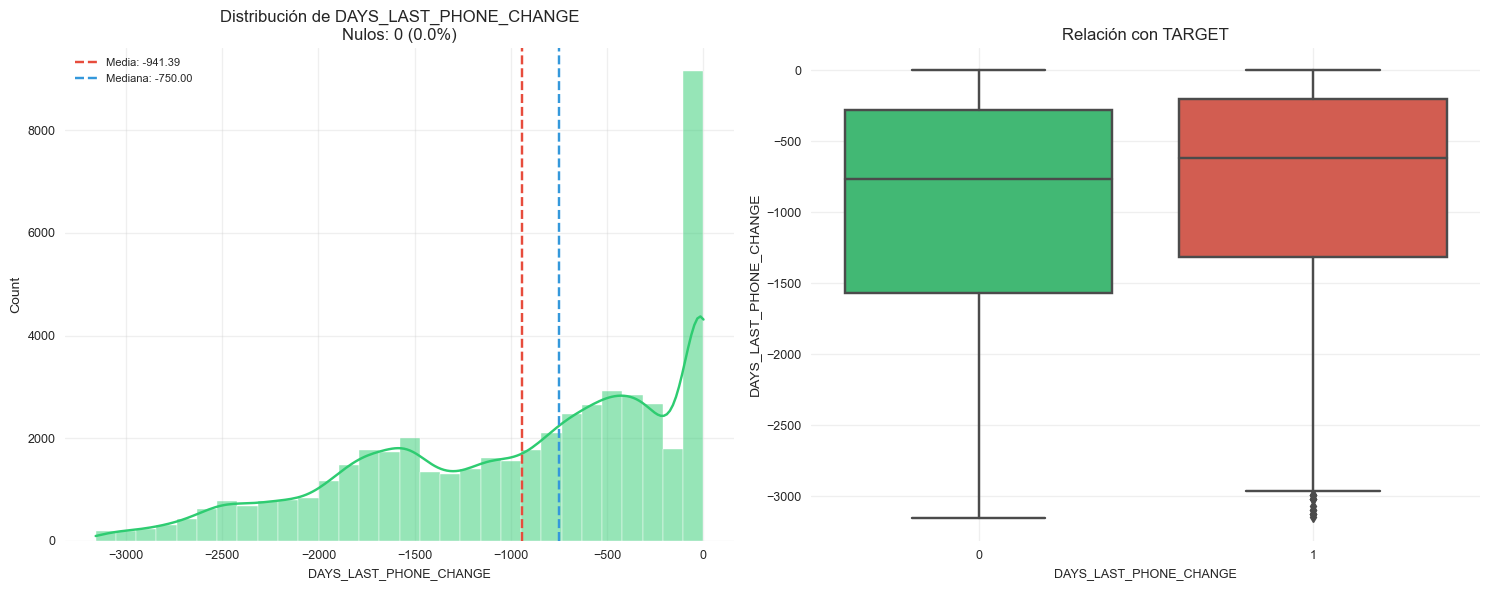

Gráfico de 'DAYS_LAST_PHONE_CHANGE' guardado exitosamente en '..\images\02_notebook_images'.


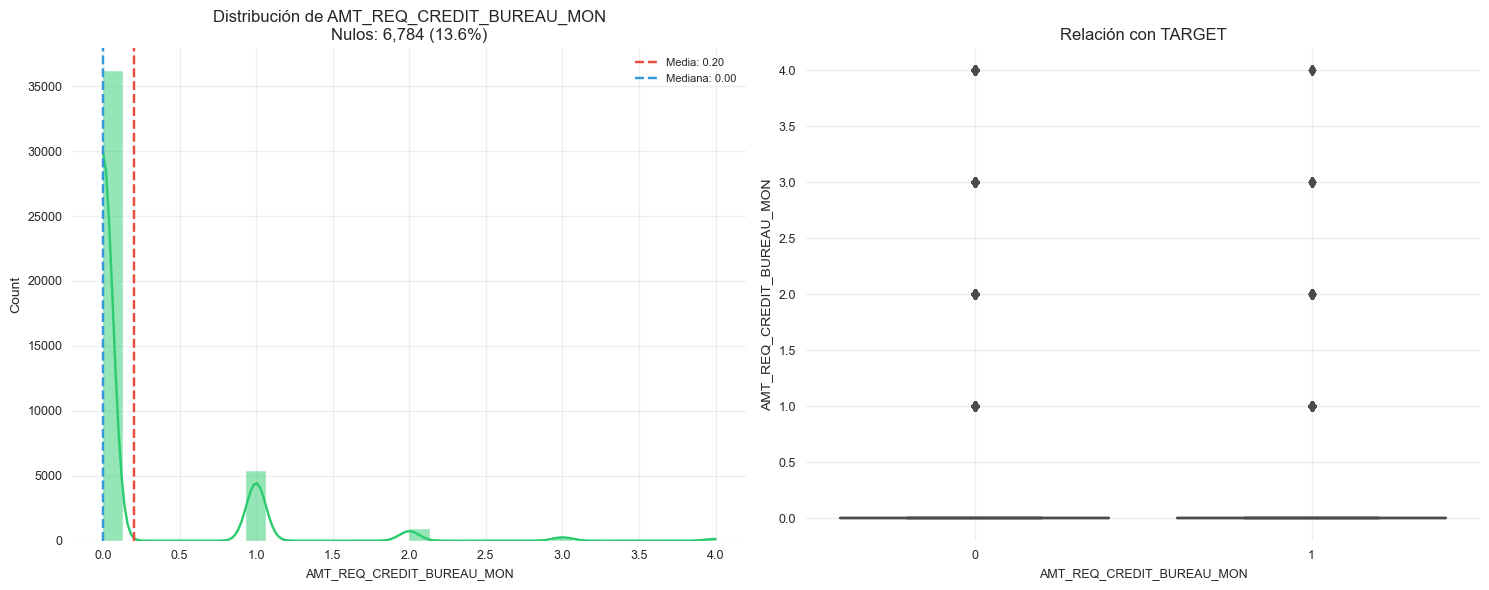

Gráfico de 'AMT_REQ_CREDIT_BUREAU_MON' guardado exitosamente en '..\images\02_notebook_images'.

Procesando lote 21 de 21


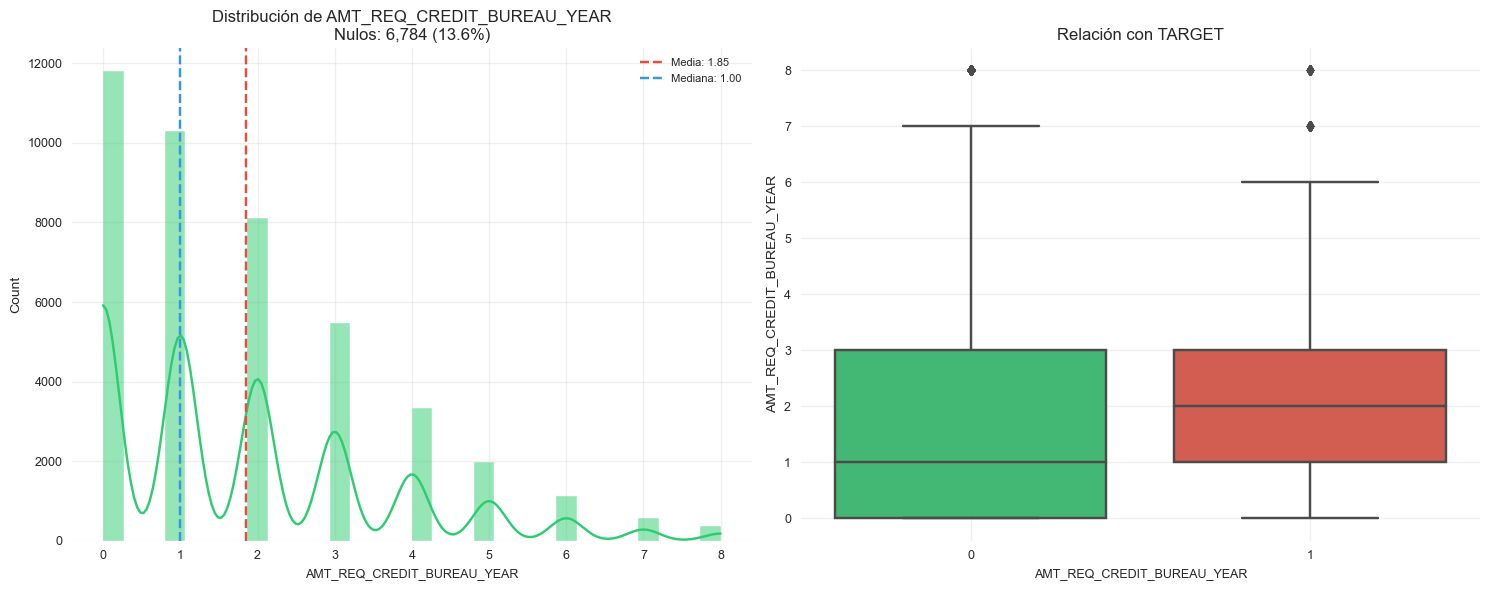

Gráfico de 'AMT_REQ_CREDIT_BUREAU_YEAR' guardado exitosamente en '..\images\02_notebook_images'.

Proceso completado exitosamente.


In [34]:
# llamo la funcion que grafica, guarda las imagenes de mis variables continuas:
#que ha sido hecha con un conjunto de funciones, que adapta la visualizacion de las continuas, usando un bucle para visualizar rapidemente:
eda.plot_all_features(data_train, continuous_vars, target_col='TARGET')

# Conclusión

Para concluir:

Vamos a destacar las tendencias observadas en la distribución de las variables en relación con **TARGET** para identificar aquellas que, a simple vista, parecen tener mayor influencia en la clasificación.
## Factor laboral
- **ORGANIZATION_TYPE** muestra que ciertos tipos de trabajos, como limpieza, electricidad y cultura, están más asociados con la clase 1, lo que sugiere una relación entre el tipo de ámbito laboral y la propensión a retrasos.
- **OCCUPATION_TYPE** refuerza esta tendencia, destacando que los trabajos no calificados, como camareros, conductores, cocineros y personal de seguridad, tienen una mayor proporción en la clase 1.

## Situación socioeconómica
- En **NAME_INCOME_TYPE**, los desempleados y quienes están en permiso por maternidad tienen una mayor probabilidad de retraso (clase 1), reflejando factores socioeconómicos que notamos en la vida real.
- Los propietarios de una **vivienda** y un **coche** tienden a pertenecer más a la clase 0, aunque esta diferencia no es significativa.

## Factores personales
- En cuanto al **género**, los hombres están más representados en la clase 1, mientras que las mujeres predominan en la clase 0.
- La **educación** parece ser crucial: un mayor nivel educativo está asociado con la clase 0, mientras que niveles bajos se relacionan con la clase 1.
- La edad también influye: los clientes **más mayores** tienden a estar en la clase 0, mientras que los **más jóvenes** son más propensos a retrasos (clase 1).

## Préstamo
- Los préstamos **revolving** están mayormente asociados con la clase 0, mientras que los préstamos **cash** predominan en la clase 1. Esto podría deberse a que los préstamos revolving reflejan una mejor gestión financiera.
- Un **crédito** más alto parece estar vinculado a la clase 0, posiblemente debido a filtros más estrictos para aprobar montos elevados.
- Aunque se esperaría que las **annuities** más altas se relacionen con la clase 1, los datos muestran que están más presentes en la clase 0, con algunos outliers en la clase 1.

## Familia
- El número de **ninos** impacta significativamente: a medida que aumenta, también lo hace la proporción de clientes en la clase 1. significando una mayor probabilidad de retraso.
- Sin embargo, no se observan patrones claros relacionados con el **estado civil** segun si el cliente que pidio el prestamo estaba casado o no.

## Factores externos
- Las clasificaciones externas (no tenemos insights sobre como se hizo la clasificacion), como el **rating de región** y **rating de cliente**, indican que regiones y clientes de tipo 3 tienen mayor probabilidad de pertenecer a la clase 1. Sugeriendo que mas alto el rating, mas riesgos surgen

### Conclusion para la variable INCOME 


- El **ingreso** del cliente es una variable que considero imprescindible,

Se observa una tendencia central más alta en la clase 0, que presenta una mediana de ingresos superior. La dispersión es prácticamente igual, dado que el rango intercuartil es bastante similar en ambas clases. Aunque hay una ligera diferencia de valores extremos en la clase 0 (significando que gente con mas ingresos tiene mas probabilidad de ser de clase 0), no es lo suficientemente significativa como para concluir que las personas con retraso tienen una diferencia considerable en los ingresos en comparación con otros casos.


### A continuación, se tratan los valores missing, las correlaciones de las variables continuas y los outliers

In [40]:
continuous_vars

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_M

## OUTLIERS



In [43]:
#identificar los valores extremos para variables continuas 
# basándose en un rango definido por un intervalo de confianza multiplicado 
# por una desviación estándar
eda.get_deviation_of_mean_perc(data_train, continuous_vars, target='TARGET', multiplier=3)

0.0       1.0                      variable  sum_outlier_values  \
0   0.938095  0.061905              AMT_INCOME_TOTAL                 210   
1   0.958988  0.041012                    AMT_CREDIT                2609   
2   0.960951  0.039049                   AMT_ANNUITY                2356   
3   0.959916  0.040084               AMT_GOODS_PRICE                3318   
4   0.959733  0.040267    REGION_POPULATION_RELATIVE                6730   
5   0.958403  0.041597             DAYS_REGISTRATION                 601   
6   0.916479  0.083521                   OWN_CAR_AGE                2670   
7   0.897638  0.102362       HOUR_APPR_PROCESS_START                 508   
8   0.950358  0.049642                APARTMENTS_AVG                2377   
9   0.949077  0.050923              BASEMENTAREA_AVG                1571   
10  0.917431  0.082569   YEARS_BEGINEXPLUATATION_AVG                 545   
11  0.921466  0.078534               YEARS_BUILD_AVG                 955   
12  0.944767  0.055233                COMMONAREA_AVG                1376   
13  0.953775  0.046225                 ELEVATORS_AVG                1947   
14  0.938833  0.061167                 ENTRANCES_AVG                1782   
15  0.957355  0.042645                 FLOORSMAX_AVG                2087   
16  0.970588  0.029412                 FLOORSMIN_AVG                 476   
17  0.935252  0.064748                  LANDAREA_AVG                1668   
18  0.948313  0.051687          LIVINGAPARTMENTS_AVG                1393   
19  0.947904  0.052096                LIVINGAREA_AVG                2553   
20  0.932743  0.067257       NONLIVINGAPARTMENTS_AVG                 565   
21  0.948454  0.051546             NONLIVINGAREA_AVG                1940   
22  0.948505  0.051495               APARTMENTS_MODE                2408   
23  0.944745  0.055255             BASEMENTAREA_MODE                1665   
24  0.915414  0.084586  YEARS_BEGINEXPLUATATION_MODE                 532   
25  0.922441  0.077559              YEARS_BUILD_MODE                 967   
26  0.939839  0.060161               COMMONAREA_MODE                1363   
27  0.949329  0.050671                ELEVATORS_MODE                2684   
28  0.938244  0.061756                ENTRANCES_MODE                1765   
29  0.958768  0.041232                FLOORSMAX_MODE                2110   
30  0.971429  0.028571                FLOORSMIN_MODE                 385   
31  0.935972  0.064028                 LANDAREA_MODE                1718   
32  0.944095  0.055905         LIVINGAPARTMENTS_MODE                1431   
33  0.945673  0.054327               LIVINGAREA_MODE                2669   
34  0.926554  0.073446      NONLIVINGAPARTMENTS_MODE                 531   
35  0.949058  0.050942            NONLIVINGAREA_MODE                1963   
36  0.949979  0.050021               APARTMENTS_MEDI                2419   
37  0.947937  0.052063             BASEMENTAREA_MEDI                1575   
38  0.913386  0.086614  YEARS_BEGINEXPLUATATION_MEDI                 508   
39  0.922280  0.077720              YEARS_BUILD_MEDI                 965   
40  0.943844  0.056156               COMMONAREA_MEDI                1389   
41  0.953981  0.046019                ELEVATORS_MEDI                1934   
42  0.938582  0.061418                ENTRANCES_MEDI                1791   
43  0.957515  0.042485                FLOORSMAX_MEDI                2189   
44  0.970852  0.029148                FLOORSMIN_MEDI                 446   
45  0.938596  0.061404                 LANDAREA_MEDI                1710   
46  0.947820  0.052180         LIVINGAPARTMENTS_MEDI                1399   
47  0.948968  0.051032               LIVINGAREA_MEDI                2567   
48  0.930728  0.069272      NONLIVINGAPARTMENTS_MEDI                 563   
49  0.948692  0.051308            NONLIVINGAREA_MEDI                1949   
50  0.956044  0.043956                TOTALAREA_MODE                2639   
51  0.965974  0.034026        DAYS_LAST_PHONE_CHANGE     

El método de la desviación estándar es un método clásico que he utilizado y que parece adecuado para la distribución de mis datos. 
Me parece confiable, no decidé explorar métodos alternativos para obtener una mayor precisión... Aunque si se podria considerar otros metodos mas preciqo si es adecuado

### Para concluir el analisis de valores extremos continuos:
Una proporción tan baja de valores atípicos globalmente significa que su impacto global en la distribución probablemente sea limitado.  
Además, en variables importantes como el ingreso (income), el número de valores atípicos es extremadamente bajo.  
No es indispensable tratarlos de momento, pero quedo atenta a la eleccion del modelo para ver si se debe ajustar la precision y si puede tener una importancia adaptarlos si el modelo lo pide.

Se podria utilizar métodos como capping, la imputación con la mediana o la media, las transformaciones matemáticas (logaritmo, raíz cuadrada), o removarlos...

## CORRELATION CATEGORICAL AND NUMERICAL SEPARATELY

- MATRIZ Y COEF. DE CORRELACION

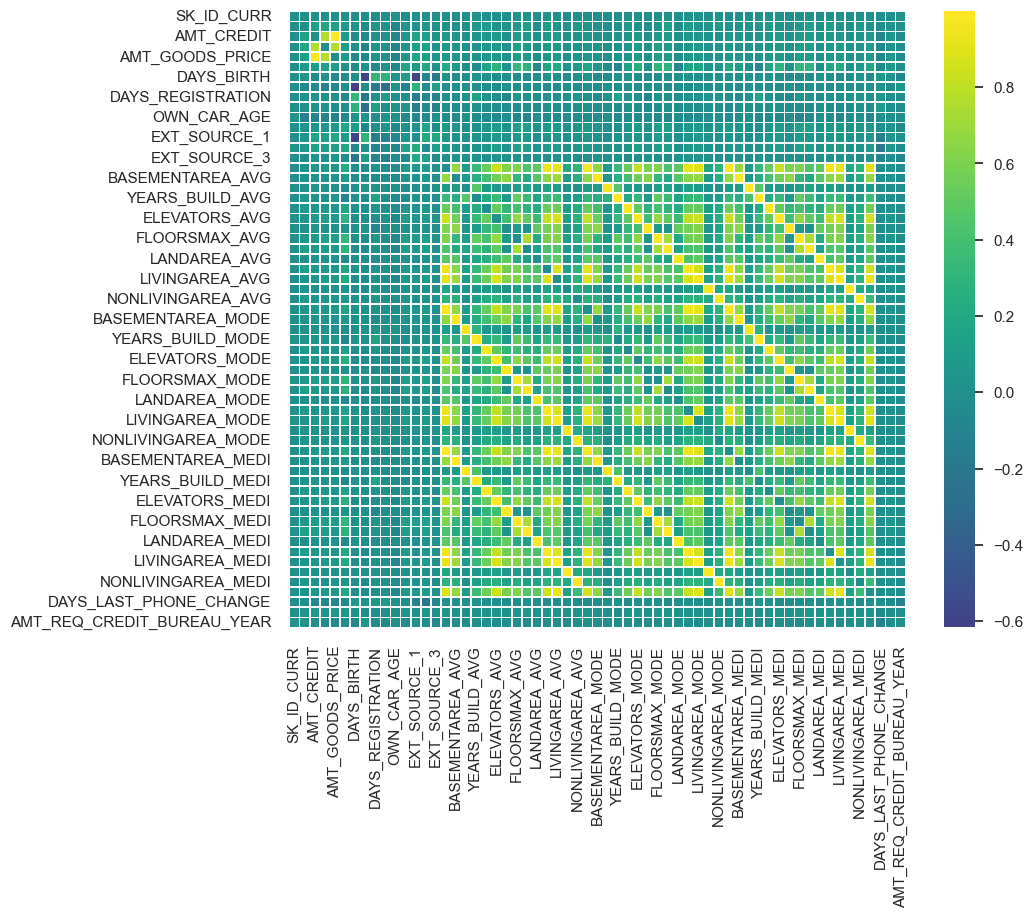

0

In [48]:
#llamo a mi funcion con mis variables numericas continuas :
eda.get_corr_matrix(dataset = data_train[continuous_vars], 
                metodo='pearson', size_figure=[10,8])

In [49]:
corr = data_train[continuous_vars].corr('pearson')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']>0.55]

level_0                       level_1  correlation
2824              YEARS_BUILD_MEDI               YEARS_BUILD_AVG     0.998419
3134                FLOORSMIN_MEDI                 FLOORSMIN_AVG     0.997352
3072                FLOORSMAX_MEDI                 FLOORSMAX_AVG     0.997141
3010                ENTRANCES_MEDI                 ENTRANCES_AVG     0.996948
2948                ELEVATORS_MEDI                 ELEVATORS_AVG     0.996008
2886               COMMONAREA_MEDI                COMMONAREA_AVG     0.995816
3320               LIVINGAREA_MEDI                LIVINGAREA_AVG     0.995450
2638               APARTMENTS_MEDI                APARTMENTS_AVG     0.995270
3258         LIVINGAPARTMENTS_MEDI          LIVINGAPARTMENTS_AVG     0.994466
2700             BASEMENTAREA_MEDI              BASEMENTAREA_AVG     0.994035
2762  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG     0.993125
3444            NONLIVINGAREA_MEDI             NONLIVINGAREA_AVG     0.991649
3196                 LANDAREA_MEDI                  LANDAREA_AVG     0.991599
3382      NONLIVINGAPARTMENTS_MEDI       NONLIVINGAPARTMENTS_AVG     0.990498
1970              YEARS_BUILD_MODE               YEARS_BUILD_AVG     0.989127
2838              YEARS_BUILD_MEDI              YEARS_BUILD_MODE     0.989118
3148                FLOORSMIN_MEDI                FLOORSMIN_MODE     0.988433
3086                FLOORSMAX_MEDI                FLOORSMAX_MODE     0.988204
246                AMT_GOODS_PRICE                    AMT_CREDIT     0.986997
2280                FLOORSMIN_MODE                 FLOORSMIN_AVG     0.986046
2218                FLOORSMAX_MODE                 FLOORSMAX_AVG     0.985710
2962                ELEVATORS_MEDI                ELEVATORS_MODE     0.982707
3210                 LANDAREA_MEDI                 LANDAREA_MODE     0.980788
3024                ENTRANCES_MEDI                ENTRANCES_MODE     0.980273
2900               COMMONAREA_MEDI               COMMONAREA_MODE     0.979032
2094                ELEVATORS_MODE                 ELEVATORS_AVG     0.978604
2156                ENTRANCES_MODE                 ENTRANCES_AVG     0.977388
2652               APARTMENTS_MEDI               APARTMENTS_MODE     0.977085
3396      NONLIVINGAPARTMENTS_MEDI      NONLIVINGAPARTMENTS_MODE     0.977053
2714             BASEMENTAREA_MEDI             BASEMENTAREA_MODE     0.976871
2032               COMMONAREA_MODE                COMMONAREA_AVG     0.976245
3272         LIVINGAPARTMENTS_MEDI         LIVINGAPARTMENTS_MODE     0.975746
3458            NONLIVINGAREA_MEDI            NONLIVINGAREA_MODE     0.975426
3334               LIVINGAREA_MEDI               LIVINGAREA_MODE     0.974965
1784               APARTMENTS_MODE                APARTMENTS_AVG     0.973294
2342                 LANDAREA_MODE                  LANDAREA_AVG     0.973156
2466               LIVINGAREA_MODE                LIVINGAREA_AVG     0.972183
1846             BASEMENTAREA_MODE              BASEMENTAREA_AVG     0.972080
2404         LIVINGAPARTMENTS_MODE          LIVINGAPARTMENTS_AVG     0.970693
1908  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG     0.970327
2528      NONLIVINGAPARTMENTS_MODE       NONLIVINGAPARTMENTS_AVG     0.967621
2590            NONLIVINGAREA_MODE             NONLIVINGAREA_AVG     0.967063
2776  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE     0.960662
1540          LIVINGAPARTMENTS_AVG                APARTMENTS_AVG     0.944185
3248         LIVINGAPARTMENTS_MEDI                APARTMENTS_AVG     0.942998
3276         LIVINGAPARTMENTS_MEDI               APARTMENTS_MEDI     0.942776
2408         LIVINGAPARTMENTS_MODE               APARTMENTS_MODE     0.939285
2648               APARTMENTS_MEDI          LIVINGAPARTMENTS_AVG     0.936461
2662               APARTMENTS_MEDI         LIVINGAPARTMENTS_MODE     0.933201
2394         LIVINGAPARTMENTS_MODE                APARTMENTS_AVG     0.931936
3503                TOTALAREA_MODE               

## Conclusion :

Si dos variables están fuertemente correlacionadas, esto puede indicar multicolinealidad, donde las variables predicen esencialmente la misma información.

Aqui vemos en orden las variables mas correladas entre si, se nota que en la mayoria de los casos son variables de 'tipo de vivienda' que aportan detalles sobre el hogar, lo que tiene sentido porque son variables relacionadas entre si y muy detalladas, que mas o menos describen con detalle la vivienda.

- Otras variables relacionadas son AMT_ANNUITY y AMT_CREDIT, y AMT_ANNUITY y AMT_GOODS_PRICE que van relacionando por proporcionalidad, porque AMT_ANNUITY es proporcional a AMT_CREDIT, ya que una cuota mensual más alta está típicamente asociada a un monto de crédito más alto.

Se podria, segun del modelo, considerar removar algunas, o juntarles en una nueva variable para reducir el numero de variables y la multicolinealidad. 
Se puede tambien considerar usar el PCA...

## MISSING VALUES


In [54]:
eda.get_percent_null_values_target(data_train, continuous_vars, target='TARGET')

Category_0                      variable  sum_null_values  \
0     1.000000                   AMT_ANNUITY               11   
1     0.919431               AMT_GOODS_PRICE              211   
2     0.914944                   OWN_CAR_AGE           162329   
3     0.914595                  EXT_SOURCE_1           138528   
4     0.914729                  EXT_SOURCE_2              516   
5     0.907155                  EXT_SOURCE_3            48974   
6     0.908756                APARTMENTS_AVG           124764   
7     0.911016              BASEMENTAREA_AVG           143880   
8     0.908192   YEARS_BEGINEXPLUATATION_AVG           119935   
9     0.913332               YEARS_BUILD_AVG           163544   
10    0.914398                COMMONAREA_AVG           171830   
11    0.909222                 ELEVATORS_AVG           131001   
12    0.908444                 ENTRANCES_AVG           123739   
13    0.908375                 FLOORSMAX_AVG           122325   
14    0.913850                 FLOORSMIN_AVG           166871   
15    0.911949                  LANDAREA_AVG           146029   
16    0.913899          LIVINGAPARTMENTS_AVG           168151   
17    0.908792                LIVINGAREA_AVG           123356   
18    0.914308       NONLIVINGAPARTMENTS_AVG           170798   
19    0.909864             NONLIVINGAREA_AVG           135617   
20    0.908756               APARTMENTS_MODE           124764   
21    0.911016             BASEMENTAREA_MODE           143880   
22    0.908192  YEARS_BEGINEXPLUATATION_MODE           119935   
23    0.913332              YEARS_BUILD_MODE           163544   
24    0.914398               COMMONAREA_MODE           171830   
25    0.909222                ELEVATORS_MODE           131001   
26    0.908444                ENTRANCES_MODE           123739   
27    0.908375                FLOORSMAX_MODE           122325   
28    0.913850                FLOORSMIN_MODE           166871   
29    0.911949                 LANDAREA_MODE           146029   
30    0.913899         LIVINGAPARTMENTS_MODE           168151   
31    0.908792               LIVINGAREA_MODE           123356   
32    0.914308      NONLIVINGAPARTMENTS_MODE           170798   
33    0.909864            NONLIVINGAREA_MODE           135617   
34    0.908756               APARTMENTS_MEDI           124764   
35    0.911016             BASEMENTAREA_MEDI           143880   
36    0.908192  YEARS_BEGINEXPLUATATION_MEDI           119935   
37    0.913332              YEARS_BUILD_MEDI           163544   
38    0.914398               COMMONAREA_MEDI           171830   
39    0.909222                ELEVATORS_MEDI           131001   
40    0.908444                ENTRANCES_MEDI           123739   
41    0.908375                FLOORSMAX_MEDI           122325   
42    0.913850                FLOORSMIN_MEDI           166871   
43    0.911949                 LANDAREA_MEDI           146029   
44    0.913899         LIVINGAPARTMENTS_MEDI           168151   
45    0.908792               LIVINGAREA_MEDI           123356   
46    0.914308      NONLIVINGAPARTMENTS_MEDI           170798   
47    0.909864            NONLIVINGAREA_MEDI           135617   
48    0.907951                TOTALAREA_MODE           118643   
49    0.896709     AMT_REQ_CREDIT_BUREAU_MON            33391   
50    0.896709    AMT_REQ_CREDIT_BUREAU_YEAR            33391   

    porcentaje_sum_null_values  Category_1  
0                     0.000045         NaN  
1                     0.000858    0.080569  
2                     0.659853    0.085056  
3                     0.563104    0.085405  
4                     0.002097    0.085271  
5                     0.199075    0.092845  
6                     0.507154    0.091244  
7                     0.584859    0.088984  
8                     0.487525    0.091808  
9                     0.664791    0.086668  
10                    0.698473    0.085602  
11                    0.532507    0.090778  
12                    0.502988    0.09

Si una variable tiene muchos valores faltantes resultando en clase 1, puede significar que el cliente no entregó un documento necesario, lo que podría ser senal de mayor riesgo. También podría ser que esa información es obligatoria al solicitar el préstamo. En cualquier caso, pueden dar pistas sobre riesgo del cliente.


# QUE ESTRATREGIA DECIDI SEGUIR ?
### En algunos campos se debe elegir particularmente

Decidimos agrupar variables de vivienda, y variables mas especificas para imputar de dos maneras diferentes:
Utilizamos dos métodos para tratar los valores faltantes según las características de los datos. 

- La imputación con la media la aplico a las variables relacionadas con la vivienda y la descripción de los hogares, ya que estas variables son relativamente homogéneas y independientes de otros factores, lo que hace que este método sea simple y efectivo.


- Por otro lado, usé el SimpleImputer con la strategy de mediana, para las columnas continuas que quedaban como las de AMT_ANNUITY, OWN_CAR_AGE y EXT_SOURCE_1...

Ya que es una técnica robusta con valores atípicos, que son mas o menos comunes en estas variables. La mediana garantiza una imputación mas rápida y razonable, evitando distorsiones debidas a valores extremos.

Además, permite un flujo consistente y escalable entre conjuntos de entrenamiento y prueba, asegurando que las mismas imputaciones se apliquen de forma uniforme. Si se necesita mayor precisión o se identifican relaciones complejas entre variables, podría implementarse un KNearestNeighbors para predecir mejor valores missing con sus dependencias asociadas a sus 'vecinos'.


In [57]:
# copio los datos originales
data_train_input = data_train.copy()
data_test_input = data_test.copy()

#alisto mis columnas continuas relacionadas con la vivienda cuales nulos cambiaré con la media:
housing_continues_columns = [
    'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 
    'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 
    'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 
    'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 
    'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 
    'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 
    'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 
    'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 
    'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 
    'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 
    'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE'
]

#IMPUTANDO CON LA MEDIA EN LOS DOS CONJUNTOS DE MI DATA:
data_train_input[housing_continues_columns] = data_train[housing_continues_columns].fillna(data_train[housing_continues_columns].mean())
data_test_input[housing_continues_columns] = data_test[housing_continues_columns].fillna(data_test[housing_continues_columns].mean())

#Otras columnas que pondré con una imputacion con mediana:
remaining_continues_columns = [
    'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 
    'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]

#escalado de los datos (bloques para mas eficiencia)
scaler = StandardScaler()

def scale_and_impute(data, columns, scaler, imputer):
    scaled_data = scaler.fit_transform(data[columns]) 
    return imputer.fit_transform(scaled_data)          

#USO EL METODO DE LA MEDIANA:
simple_imputer = SimpleImputer(strategy="median")

#imputar con escalado para mas facilidad
data_train_imputed = scale_and_impute(data_train_input, remaining_continues_columns, scaler, simple_imputer)
data_test_imputed = scale_and_impute(data_test_input, remaining_continues_columns, scaler, simple_imputer)

#dataframe completos
data_train_imputed_df = pd.DataFrame(data_train_imputed, columns=remaining_continues_columns, index=data_train_input.index)
data_test_imputed_df = pd.DataFrame(data_test_imputed, columns=remaining_continues_columns, index=data_test_input.index)

#asignar nuevos datos al dataframe que he copiado en primer lugar
data_train_input[remaining_continues_columns] = data_train_imputed_df
data_test_input[remaining_continues_columns] = data_test_imputed_df

#COMPROBACION

print("\nValores nulos después de la imputación en train (remaining_continues_columns):")
print(data_train_input[remaining_continues_columns].isnull().sum())

print("\nValores nulos después de la imputación en test (remaining_continues_columns):")
print(data_test_input[remaining_continues_columns].isnull().sum())



Valores nulos después de la imputación en train (remaining_continues_columns):
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
OWN_CAR_AGE                   0
EXT_SOURCE_1                  0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

Valores nulos después de la imputación en test (remaining_continues_columns):
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
OWN_CAR_AGE                   0
EXT_SOURCE_1                  0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64


# Variables categoricas 

In [60]:
print("Cantidad de valores nulos en 'TARGET':", data_train['TARGET'].isnull().sum())

Cantidad de valores nulos en 'TARGET': 0


In [62]:
categorical_vars

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUM

In [64]:
#conteos antes de tratar los datos categoricos :

print("missing de categoricas antes de transformar:")
print(data_train_input[categorical_vars].isnull().sum())


print("\nTipo de cada variable:")
print(data_train_input[categorical_vars].dtypes)


print("\nValores unicos de cada variable:")
print(data_train_input[categorical_vars].nunique())

missing de categoricas antes de transformar:
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         3
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
NAME_TYPE_SUITE                  1003
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
OCCUPATION_TYPE                 76942
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
WEEKDAY_APPR_PROCESS_START          0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
REG_C

In [65]:
#bucle para tener las correlaciones categoricas de cada variable categorica respeto a la variable objetivo:
for var in categorical_vars:
    print('------------------------------------------------------------')
    print(f"Confusion matrix de {var} con respeto a TARGET:")
    confusion_matrix = pd.crosstab(data_train['TARGET'], data_train_input[var])
    print(confusion_matrix)
    #coeficiente de Cramers v:
    cramers_v_value = eda.cramers_v(confusion_matrix.values)
    print(f"Cramér's V de {var}: {cramers_v_value}\n")

------------------------------------------------------------
Confusion matrix de NAME_CONTRACT_TYPE con respeto a TARGET:
NAME_CONTRACT_TYPE  CASH LOANS  REVOLVING LOANS
TARGET                                         
0                       204106            22042
1                        18590             1270
Cramér's V de NAME_CONTRACT_TYPE: 0.0310865205023682

------------------------------------------------------------
Confusion matrix de CODE_GENDER con respeto a TARGET:
CODE_GENDER  FEMALE   MALE
TARGET                    
0            150573  75572
1             11307   8553
Cramér's V de CODE_GENDER: 0.05535981073628126

------------------------------------------------------------
Confusion matrix de FLAG_OWN_CAR con respeto a TARGET:
FLAG_OWN_CAR      NO    YES
TARGET                     
0             148517  77631
1              13807   6053
Cramér's V de FLAG_OWN_CAR: 0.022025230924775974

------------------------------------------------------------
Confusion matrix de FL

C:\Users\ninao\Desktop\ML_practica1EDA\notebooks\../src\eda_utils.py:567: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


FLAG_WORK_PHONE       0      1
TARGET                        
0                181826  44322
1                 15095   4765
Cramér's V de FLAG_WORK_PHONE: 0.02986670896835815

------------------------------------------------------------
Confusion matrix de FLAG_CONT_MOBILE con respeto a TARGET:
FLAG_CONT_MOBILE    0       1
TARGET                       
0                 427  225721
1                  36   19824
Cramér's V de FLAG_CONT_MOBILE: 0.0

------------------------------------------------------------
Confusion matrix de FLAG_PHONE con respeto a TARGET:
FLAG_PHONE       0      1
TARGET                   
0           161863  64285
1            14939   4921
Cramér's V de FLAG_PHONE: 0.021990638240084764

------------------------------------------------------------
Confusion matrix de FLAG_EMAIL con respeto a TARGET:
FLAG_EMAIL       0      1
TARGET                   
0           213165  12983
1            18773   1087
Cramér's V de FLAG_EMAIL: 0.0023645650771151965

--------------

En resumen, aunque algunas variables muestran des diferencias en las matrices de confusión, su capacidad para predecir el incumplimiento de pago parece limitada debido a los bajos valores del coeficiente de Cramer.

Las variables más discriminantes entre las clases de TARGET son FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, y variables regionales como REG_REGION_NOT_LIVE_REGION y REG_CITY_NOT_LIVE_CITY. Estas variables presentan grandes diferencias en sus distribuciones y podrían ser indicadores importantes para la predicción de TARGET.

El valor de Cramér's V mide la fuerza de la asociación entre dos variables categóricas, y varía entre 0 y 1. Algunas de las valores importantes obtenidos son

* ORGANIZATION_TYPE: 0.0715, una asociación bastante moderada (si comparamos con las otras variables) con la variable TARGET, queriendo decir que hay una relacion que parece importante entre el tipo de organizacion (factor laboral) y la TARGET.
* Otras variables (como FLAG_DOCUMENT_2, FLAG_DOCUMENT_10, etc...) tienen valores de Cramér's V cercanos a cero, lo que indica una asociación muy débil o nula, y que a lo mejor estos documentos no son obligatorios y no influyen mucho.

## VALORES NULOS DE CATEGORICAS A TRATAR /

- Decidé coger las variables que a primer vista se pueden rellenar con la moda (el valor mas frecuente); porque a lo mejor son variables que son indispensables para tener un modelo preciso, que han tenido scores mas altos de correlacion con TARGET y que tienen porque ser rellenos.
- Los documentos si son faltantes significa que probablemente no han sido entregados asi que decidi rellenar con categoria de 0s que significa que no ha sido entregado.
- Y agrupar las que tienen sentido estar rellenadas con 'sin valor' o 'desconocido'

In [70]:
#mis de columnas categóricas
categorical_vars = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 
    'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 
    'EMERGENCYSTATE_MODE', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 
    'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 
    'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 
    'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
    'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 
    'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT'
]

#les divido segun la imputacion que decidi seguir:
fill_with_most_frequent = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
    'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'OCCUPATION_TYPE'
]

fill_with_unknown = [
    'NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE', 'FONDKAPREMONT_MODE', 
    'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT'
]

fill_with_zero = [
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
    'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 
    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
]

#imputar 
#moda
imputer = SimpleImputer(strategy='most_frequent')

data_train_input[fill_with_most_frequent] = imputer.fit_transform(data_train_input[fill_with_most_frequent])
data_test_input[fill_with_most_frequent] = imputer.transform(data_test_input[fill_with_most_frequent])

#unknown
for col in fill_with_unknown:
    if col in data_train_input.columns:
        # Verificar si "Desconocido" ya está como categoría antes de añadirla
        if data_train_input[col].dtype.name == "category" and "Desconocido" not in data_train_input[col].cat.categories:
            data_train_input[col] = data_train_input[col].cat.add_categories(["Desconocido"])
        if data_test_input[col].dtype.name == "category" and "Desconocido" not in data_test_input[col].cat.categories:
            data_test_input[col] = data_test_input[col].cat.add_categories(["Desconocido"])

data_train_input[fill_with_unknown] = data_train_input[fill_with_unknown].fillna("Desconocido")
data_test_input[fill_with_unknown] = data_test_input[fill_with_unknown].fillna("Desconocido")

#0s
data_train_input[fill_with_zero] = data_train_input[fill_with_zero].fillna(0)
data_test_input[fill_with_zero] = data_test_input[fill_with_zero].fillna(0)

# Verificación
print("Valores faltantes después de la imputación en data_train_input:")
print(data_train_input[categorical_vars].isnull().sum())

print("\nValores faltantes después de la imputación en data_test_input:")
print(data_test_input[categorical_vars].isnull().sum())


Valores faltantes después de la imputación en data_train_input:
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
FONDKAPREMONT_MODE            0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
EMERGENCYSTATE_MODE           0
ORGANIZATION_TYPE             0
FLAG_DOCUMENT_2               0
FLAG_DOCUMENT_3               0
FLAG_DOCUMENT_4               0
FLAG_DOCUMENT_5               0
FLAG_DOCUMENT_6               0
FLAG_DOCUMENT_7               0
FLAG_DOCUMENT_8               0
FLAG_DOCUMENT_9               0
FLAG_DOCUMENT_10              0
FLAG_DOCUMENT_11              0
FLAG_DOCUMENT_12              0
FLAG_DOCUMENT_13              0
FLAG_DOCUMENT_14              0
FLAG_DOCUMENT_15              0
FLAG_DOC

# Guardado de la tabla

In [73]:
# Rutas
train_output_path = "../data/processed_data/processed_data_input/data_train_preprocessing_missing_outlier.csv"
test_output_path = "../data/processed_data/processed_data_input/data_test_preprocessing_missing_outlier.csv"

# Creo las carpetas (si no existen todavia)
os.makedirs(os.path.dirname(train_output_path), exist_ok=True)
os.makedirs(os.path.dirname(test_output_path), exist_ok=True)

# Guardo los data frames como .CSV
data_train_input.to_csv(train_output_path, index=False)
data_test_input.to_csv(test_output_path, index=False)

print(f"Archivo de entrenamiento guardado en: {train_output_path}")
print(f"Archivo de prueba guardado en: {test_output_path}")


Archivo de entrenamiento guardado en: ../data/processed_data/processed_data_input/data_train_preprocessing_missing_outlier.csv
Archivo de prueba guardado en: ../data/processed_data/processed_data_input/data_test_preprocessing_missing_outlier.csv


In [74]:
print(data_train_input.shape, data_test_input.shape)

(246008, 118) (61503, 118)
